In [1]:
from tf.app import use
import re
import os
import matplotlib.pyplot as plt
import numpy as np

In [4]:
BHS = use("etcbc/bhsa", version=2021, hoist=globals())

**Locating corpus resources ...**

Name,# of nodes,# slots / node,% coverage
book,39,10938.21,100
chapter,929,459.19,100
lex,9230,46.22,100
verse,23213,18.38,100
half_verse,45179,9.44,100
sentence,63717,6.70,100
sentence_atom,64514,6.61,100
clause,88131,4.84,100
clause_atom,90704,4.70,100
phrase,253203,1.68,100


In [2]:
SP = use("DT-UCPH/sp", version="3.4.1", hoist=globals())

**Locating corpus resources ...**

Name,# of nodes,# slots / node,% coverage
book,5,79878.40,100
chapter,187,2135.79,100
verse,5841,68.38,100
word,114891,3.48,100
sign,399392,1.00,100


## May 27 experiment - Creating dataset

In [6]:
i=0
file_input=[]

for verse in F.otype.s('verse'):
    text = "".join([F.g_cons.v(word) if not F.trailer.v(word) else F.g_cons.v(word)+" " for word in L.d(verse,'word')]).replace("_", " ")
    bo, ch, ve = T.sectionFromNode(verse)
    final = "\t".join([bo, str(ch), str(ve), text.strip()])

    if bo == 'Genesis' and str(ch) == '7' and str(ve) == '16':
        if i<10:
            print(final)
        i=i+1

    if bo == 'Genesis':
        file_input.append(final)

        #with open('../data/input', 'w', encoding='utf-8') as file:
        #    for line in file_input:
        #        file.write(line + '\n')
    
    #if i<3:
    #    print(final)
    #i=i+1

Genesis	7	16	WHB>JM ZKR WNQBH MKL BFR B>W K>CR YWH >TW >LHJM WJSGR JHWH B<DW


In [12]:
i=0
file_input=[]

for verse in F.otype.s('verse'):
    verse_text = ""
    cl_atoms = L.d(verse,'clause_atom')
    for clause_atom in cl_atoms:
        #clause_atom_text = "".join([F.g_cons.v(word) if not F.trailer.v(word) else F.g_cons.v(word) + " " for word in L.d(clause_atom, 'word')]).replace("_", " ").strip() + "| "
        clause_atom_text = "".join([F.g_cons.v(word) + (" " if F.trailer.v(word) else "") for word in L.d(clause_atom, 'word')]).replace("_", " ").strip()
        clause_atom_text += "|" if clause_atom_text == 'W' else "| "
        
        text = []
        for word in L.d(clause_atom, 'word'):
            if not F.trailer.v(word):
                text.append(F.g_cons.v(word))
            else:
                text.append(F.g_cons.v(word) + " ")
        clause_atom_text = "".join(text)
        clause_atom_text = clause_atom_text.replace("_"," ")
        clause_atom_text = clause_atom_text.strip()
        if clause_atom_text == 'W':
            clause_atom_text += "|"
        else:
            clause_atom_text += "| "
        
        verse_text = verse_text + clause_atom_text
    verse_text = verse_text.strip()
    bo, ch, ve = T.sectionFromNode(verse)
    final = "\t".join([bo, str(ch), str(ve), verse_text.strip()])

    if bo == 'Genesis' and str(ch) == '7' and str(ve) == '16':
        if i<10:
            print(final)
        i=i+1
    
    if bo == 'Genesis':
        file_input.append(final)

        with open('../data/output', 'w', encoding='utf-8') as file:
            for line in file_input:
                file.write(line + '\n')

Genesis	7	16	W|HB>JM| ZKR WNQBH MKL BFR B>W| K>CR YWH >TW >LHJM| WJSGR JHWH B<DW|


## Analyzing the input and output files

In [17]:
def count_words_in_line(file_path, line_number):
    """
    Counts the number of words in the specified line of a text file.

    Args:
        file_path (str): Path to the text file.
        line_number (int): Number of the line to count the words in.

    Returns:
        int: Number of words in the specified line.
    """

    with open(file_path, 'r') as f:
        lines = f.readlines()
    try:
        # Access the specified line
        line = lines[line_number - 1]
        # Remove leading and trailing whitespace from the line
        line = line.strip()
        # Split the line into words using whitespace as delimiters
        words = line.split()
        # Return the number of words
        return len(words)
    except IndexError:
        print(f"Error: Line {line_number} does not exist in the file.")
        return 0

In [26]:
#My files
inputfile = "../data/input"
outputfile = "../data/output"

In [27]:
for i in range(1,1533):
    word_count_input = count_words_in_line(inputfile, i)
    word_count_output = count_words_in_line(outputfile, i)

    if word_count_input != word_count_output:
        print(f"Line {i} of file {inputfile} contains {word_count_input} words.")
        print(f"Line {i} of file {outputfile} contains {word_count_output} words.\n")

    i=i+1

In [73]:
#My files
#inputfile = "../data/input"
#outputfile = "../data/output"

# Downloaded files
inputfile = "../data/t-in_con"
outputfile = "../data/t-out"

In [74]:
for i in range(1,1533):
    word_count_input = count_words_in_line(inputfile, i)
    word_count_output = count_words_in_line(outputfile, i)

    if word_count_input != word_count_output:
        print(f"Line {i} of file {inputfile} contains {word_count_input} words.")
        print(f"Line {i} of file {outputfile} contains {word_count_output} words.\n")

    i=i+1

Line 102 of file ../data/t-in_con contains 19 words.
Line 102 of file ../data/t-out contains 17 words.

Line 246 of file ../data/t-in_con contains 16 words.
Line 246 of file ../data/t-out contains 15 words.

Line 307 of file ../data/t-in_con contains 23 words.
Line 307 of file ../data/t-out contains 21 words.

Line 322 of file ../data/t-in_con contains 21 words.
Line 322 of file ../data/t-out contains 19 words.

Line 342 of file ../data/t-in_con contains 23 words.
Line 342 of file ../data/t-out contains 22 words.

Line 343 of file ../data/t-in_con contains 13 words.
Line 343 of file ../data/t-out contains 12 words.

Line 344 of file ../data/t-in_con contains 21 words.
Line 344 of file ../data/t-out contains 19 words.

Line 354 of file ../data/t-in_con contains 23 words.
Line 354 of file ../data/t-out contains 22 words.

Line 355 of file ../data/t-in_con contains 14 words.
Line 355 of file ../data/t-out contains 13 words.

Line 396 of file ../data/t-in_con contains 15 words.
Line 396 of

## Conversion

In [63]:
!python main.py -mo=train -i=input -o=output -ep=2 -l=5 -lr=0.0001

Encoding issue with Genesis 4 22 : mismatch in number of words
['WYLH', 'GM', 'HW>', 'JLDH', '>T', 'TWBL_QJN', 'LVC', 'KL', 'XRC', 'NXCT', 'WBRZL', 'W>XWT', 'TWBL_QJN', 'N<MH']
['WYLH', 'GM', 'HW>', 'JLDH', '>T', 'TWBL_', '_QJN|', 'LVC', 'KL', 'XRC', 'NXCT', 'WBRZL|', 'W>XWT', 'TWBL_', '_QJN', 'N<MH|']
Encoding issue with Genesis 7 16 : mismatch in number of words
['WHB>JM', 'ZKR', 'WNQBH', 'MKL', 'BFR', 'B>W', 'K>CR', 'YWH', '>TW', '>LHJM', 'WJSGR', 'JHWH', 'B<DW']
['W|', 'HB>JM|', 'ZKR', 'WNQBH', 'MKL', 'BFR', 'B>W|', 'K>CR', 'YWH', '>TW', '>LHJM|', 'WJSGR', 'JHWH', 'B<DW|']
Encoding issue with Genesis 10 11 : mismatch in number of words
['MN', 'H>RY', 'HHW>', 'JY>', '>CWR', 'WJBN', '>T', 'NJNWH', 'W>T', 'RXBT_<JR', 'W>T', 'KLX']
['MN', 'H>RY', 'HHW>', 'JY>', '>CWR|', 'WJBN', '>T', 'NJNWH', 'W>T', 'RXBT_', '_<JR', 'W>T', 'KLX|']
Encoding issue with Genesis 12 8 : mismatch in number of words
['WJ<TQ', 'MCM', 'HHRH', 'MQDM', 'LBJT_>L', 'WJV', '>HLH', 'BJT_>L', 'MJM', 'WH<J', 'MQDM', 'W

C:\Users\TF\anaconda3\lib\site-packages\torch\nn\modules\transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\TF\anaconda3\lib\site-packages\torch\nn\functional.py:5137: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


In [92]:
!python main.py -mo=train -i=input -o=output -ep=2 -l=5 -lr=0.0001

Encoding issue with Genesis 4 22 : mismatch in number of words
['WYLH', 'GM', 'HW>', 'JLDH', '>T', 'TWBL_QJN', 'LVC', 'KL', 'XRC', 'NXCT', 'WBRZL', 'W>XWT', 'TWBL_QJN', 'N<MH']
['WYLH', 'GM', 'HW>', 'JLDH', '>T', 'TWBL', 'QJN|', 'LVC', 'KL', 'XRC', 'NXCT', 'WBRZL|', 'W>XWT', 'TWBL', 'QJN', 'N<MH|']
Encoding issue with Genesis 7 16 : mismatch in number of words
['WHB>JM', 'ZKR', 'WNQBH', 'MKL', 'BFR', 'B>W', 'K>CR', 'YWH', '>TW', '>LHJM', 'WJSGR', 'JHWH', 'B<DW']
['W|', 'HB>JM|', 'ZKR', 'WNQBH', 'MKL', 'BFR', 'B>W|', 'K>CR', 'YWH', '>TW', '>LHJM|', 'WJSGR', 'JHWH', 'B<DW|']
Encoding issue with Genesis 10 11 : mismatch in number of words
['MN', 'H>RY', 'HHW>', 'JY>', '>CWR', 'WJBN', '>T', 'NJNWH', 'W>T', 'RXBT_<JR', 'W>T', 'KLX']
['MN', 'H>RY', 'HHW>', 'JY>', '>CWR|', 'WJBN', '>T', 'NJNWH', 'W>T', 'RXBT', '<JR', 'W>T', 'KLX|']
Encoding issue with Genesis 12 8 : mismatch in number of words
['WJ<TQ', 'MCM', 'HHRH', 'MQDM', 'LBJT_>L', 'WJV', '>HLH', 'BJT_>L', 'MJM', 'WH<J', 'MQDM', 'WJBN', 

C:\Users\TF\anaconda3\lib\site-packages\torch\nn\modules\transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\TF\anaconda3\lib\site-packages\torch\nn\functional.py:5137: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


In [96]:
!python main.py -mo=train -i=input -o=output -ep=2 -l=5 -lr=0.0001

Encoding issue with Genesis 7 16 : mismatch in number of words
['WHB>JM', 'ZKR', 'WNQBH', 'MKL', 'BFR', 'B>W', 'K>CR', 'YWH', '>TW', '>LHJM', 'WJSGR', 'JHWH', 'B<DW']
['W|', 'HB>JM|', 'ZKR', 'WNQBH', 'MKL', 'BFR', 'B>W|', 'K>CR', 'YWH', '>TW', '>LHJM|', 'WJSGR', 'JHWH', 'B<DW|']
Encoding issue with Genesis 30 42 : mismatch in number of words
['WBH<VJP', 'HY>N', 'L>', 'JFJM', 'WHJH', 'H<VPJM', 'LLBN', 'WHQCRJM', 'LJ<QB']
['W|', 'BH<VJP', 'HY>N|', 'L>', 'JFJM|', 'WHJH', 'H<VPJM', 'LLBN|', 'WHQCRJM', 'LJ<QB|']
Encoding issue with Genesis 31 1 : mismatch in number of words
['WJCM<', '>T', 'DBRJ', 'BNJ', 'LBN', 'L>MR', 'LQX', 'J<QB', '>T', 'KL', '>CR', 'L>BJNW', 'WM>CR', 'L>BJNW', '<FH', '>T', 'KL', 'HKBD', 'HZH']
['WJCM<', '>T', 'DBRJ', 'BNJ', 'LBN|', 'L>MR|', 'LQX', 'J<QB', '>T', 'KL|', '>CR', 'L>BJNW|', 'W|', 'M>CR', 'L>BJNW|', '<FH', '>T', 'KL', 'HKBD', 'HZH|']
Encoding issue with Genesis 34 11 : mismatch in number of words
['WJ>MR', 'CKM', '>L', '>BJH', 'W>L', '>XJH', '>MY>', 'XN', 'B<

C:\Users\TF\anaconda3\lib\site-packages\torch\nn\modules\transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\TF\anaconda3\lib\site-packages\torch\nn\functional.py:5137: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


### Issue with Genesis 7:16

In [9]:
results = BHS.search("""
book book=Genesis
    chapter chapter=7
        verse verse=16
            word gloss*
""")
BHS.show(results, end=4, multiFeatures=False, queryFeatures=True, condensed=True)

  1.86s 19 results


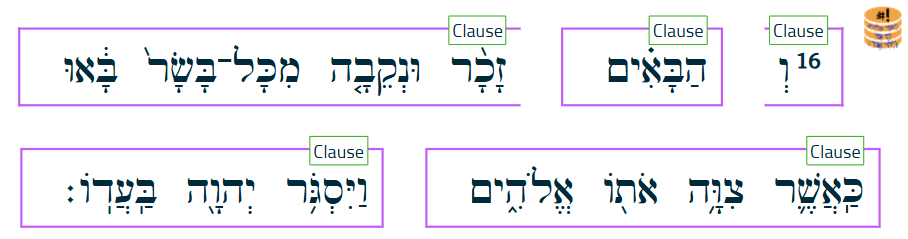v>

In [10]:
!python main.py -mo=train -i=t-in_con_gen -o=t-out_gen -ep=2 -l=5 -lr=0.0001

Epoch	Training loss	Training accuracy	Validation loss	Validation accuracy
1	2.674521408027958	0.18657433742792426	1.9744891184082358	0.270469557109789
2	1.9106350106201857	0.287045453255999	1.4439443472628941	0.36556974929609903


C:\Users\TF\anaconda3\lib\site-packages\torch\nn\modules\transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\TF\anaconda3\lib\site-packages\torch\nn\functional.py:5137: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


In [28]:
!python main.py -mo=train -i=input -o=output -ep=2 -l=5 -lr=0.0001

Epoch	Training loss	Training accuracy	Validation loss	Validation accuracy
1	2.551925776426385	0.21538072594529964	1.903663653058992	0.3121312037288469
2	1.7166070829440907	0.35051022894432304	1.0004161313960427	0.5123036169831023


C:\Users\TF\anaconda3\lib\site-packages\torch\nn\modules\transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\TF\anaconda3\lib\site-packages\torch\nn\functional.py:5137: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


## May 29 experiment

In [24]:
i=0
file_input=[]

for verse in F.otype.s('verse'):
    text = "".join([F.g_cons.v(word) if not F.trailer.v(word) else F.g_cons.v(word)+" " for word in L.d(verse,'word')]).replace("_", " ")
    bo, ch, ve = T.sectionFromNode(verse)
    final = "\t".join([bo, str(ch), str(ve), text.strip()])

    if bo in ['Genesis', 'Exodus']:
        file_input.append(final)

        with open('../data/input_gn_ex', 'w', encoding='utf-8') as file:
            for line in file_input:
                file.write(line + '\n')

In [76]:
i=0
file_input=[]

for verse in F.otype.s('verse'):
    verse_text = ""
    cl_atoms = L.d(verse,'clause_atom')
    for clause_atom in cl_atoms:
        #clause_atom_text = "".join([F.g_cons.v(word) + (" " if F.trailer.v(word) else "") for word in L.d(clause_atom, 'word')]).replace("_", " ").strip()
        #clause_atom_text += "|" if clause_atom_text == 'W' else "| "

        text = []
        for word in L.d(clause_atom, 'word'):
            #if not F.trailer.v(word):
            #    text.append(F.g_cons.v(word))
            #else:
            #    text.append(F.g_cons.v(word) + " ")
            
            #Replacing the words in the output file as 'X' 
            if not F.trailer.v(word):
                text.append('X')
            else:
                text.append('X' + " ")
        clause_atom_text = "".join(text)
        clause_atom_text = clause_atom_text.replace("_"," ")
        clause_atom_text = clause_atom_text.strip()

        if F.g_cons.v(word) in ['W','H'] and F.trailer.v(word) == "":
            clause_atom_text += "|"
        else:
            clause_atom_text += "| "
            
        #Replacing the words in the output file as 'X' 
        #if clause_atom_text in ['W','H']:
        #    clause_atom_text += "|"
        #else:
        #    clause_atom_text += "| "
        
        verse_text = verse_text + clause_atom_text
    verse_text = verse_text.strip()
    bo, ch, ve = T.sectionFromNode(verse)
    final = "\t".join([bo, str(ch), str(ve), verse_text.strip()])

    if bo == 'Exodus' and str(ch) == '2' and str(ve) == '14':
        if i<10:
            print(final)
        i=i+1
    
    if bo in ['Genesis', 'Exodus']:
        file_input.append(final)

        with open('../data/outputX_gn_ex', 'w', encoding='utf-8') as file:
            for line in file_input:
                file.write(line + '\n')
#Genesis	7	16	W|HB>JM| ZKR WNQBH MKL BFR B>W| K>CR YWH >TW >LHJM| WJSGR JHWH B<DW|
#Genesis	7	16	X|X| X X X X X| X X X X| X X X|

#Exodus	2	14	WJ>MR| MJ FMK L>JC FR WCPV <LJNW| H|LHRGNJ| >TH >MR| K>CR HRGT >T HMYRJ| WJJR> MCH| WJ>MR| >KN NWD< HDBR|
#Exodus	2	14	X| X X X X X X| X|X| X X| X X X X| X X| X| X X X|

Exodus	2	14	XX| X X XX X XX X| X|XX| X X| XX X X XX| XX X| XX| X X XX|


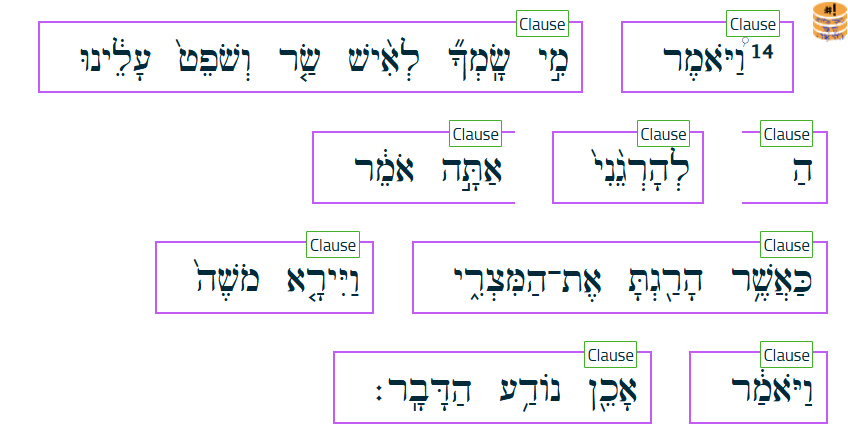

In [73]:
def count_words_in_line(file_path, line_number):
    """
    Counts the number of words in the specified line of a text file.

    Args:
        file_path (str): Path to the text file.
        line_number (int): Number of the line to count the words in.

    Returns:
        int: Number of words in the specified line.
    """

    with open(file_path, 'r') as f:
        lines = f.readlines()
    try:
        # Access the specified line
        line = lines[line_number - 1]
        # Remove leading and trailing whitespace from the line
        line = line.strip()
        # Split the line into words using whitespace as delimiters
        words = line.split()
        # Return the number of words
        return len(words)
    except IndexError:
        print(f"Error: Line {line_number} does not exist in the file.")
        return 0

In [78]:
#My files
inputfile = "../data/input_gn_ex"
outputfile = "../data/outputX_gn_ex"

In [66]:
for i in range(1,2746):
    word_count_input = count_words_in_line(inputfile, i)
    word_count_output = count_words_in_line(outputfile, i)

    if word_count_input != word_count_output:
        print(f"Line {i} of file {inputfile} contains {word_count_input} words.")
        print(f"Line {i} of file {outputfile} contains {word_count_output} words.\n")

    i=i+1

Line 102 of file ../data/input_gn_ex contains 19 words.
Line 102 of file ../data/outputX_gn_ex contains 17 words.

Line 246 of file ../data/input_gn_ex contains 16 words.
Line 246 of file ../data/outputX_gn_ex contains 15 words.

Line 307 of file ../data/input_gn_ex contains 23 words.
Line 307 of file ../data/outputX_gn_ex contains 21 words.

Line 322 of file ../data/input_gn_ex contains 21 words.
Line 322 of file ../data/outputX_gn_ex contains 19 words.

Line 342 of file ../data/input_gn_ex contains 23 words.
Line 342 of file ../data/outputX_gn_ex contains 22 words.

Line 343 of file ../data/input_gn_ex contains 13 words.
Line 343 of file ../data/outputX_gn_ex contains 12 words.

Line 344 of file ../data/input_gn_ex contains 21 words.
Line 344 of file ../data/outputX_gn_ex contains 19 words.

Line 354 of file ../data/input_gn_ex contains 23 words.
Line 354 of file ../data/outputX_gn_ex contains 22 words.

Line 355 of file ../data/input_gn_ex contains 14 words.
Line 355 of file ../data

In [111]:
#My files
inputfile = "../data/input_gn_ex"
outputfile = "../data/outputX_gn_ex"

In [112]:
for i in range(1,2746):
    word_count_input = count_words_in_line(inputfile, i)
    word_count_output = count_words_in_line(outputfile, i)

    if word_count_input != word_count_output:
        print(f"Line {i} of file {inputfile} contains {word_count_input} words.")
        print(f"Line {i} of file {outputfile} contains {word_count_output} words.\n")

    i=i+1

In [87]:
!python main.py -mo=train -i=input_gn_ex -o=outputX_gn_ex -ep=5 -l=5 -lr=0.0001 -et=True

Encoding issue with Genesis 4 22 : mismatch in number of words
['WYLH', 'GM', 'HW>', 'JLDH', '>T', 'TWBL', 'QJN', 'LVC', 'KL', 'XRC', 'NXCT', 'WBRZL', 'W>XWT', 'TWBL', 'QJN', 'N<MH']
['XX', 'X', 'X', 'X', 'X', 'X|', 'X', 'X', 'X', 'X', 'XX|', 'XX', 'X', 'X|']
Encoding issue with Genesis 10 11 : mismatch in number of words
['MN', 'H>RY', 'HHW>', 'JY>', '>CWR', 'WJBN', '>T', 'NJNWH', 'W>T', 'RXBT', '<JR', 'W>T', 'KLX']
['X', 'XX', 'XX', 'X', 'X|', 'XX', 'X', 'X', 'XX', 'X', 'XX', 'X|']
Encoding issue with Genesis 12 8 : mismatch in number of words
['WJ<TQ', 'MCM', 'HHRH', 'MQDM', 'LBJT', '>L', 'WJV', '>HLH', 'BJT', '>L', 'MJM', 'WH<J', 'MQDM', 'WJBN', 'CM', 'MZBX', 'LJHWH', 'WJQR>', 'BCM', 'JHWH']
['XX', 'XX', 'XX', 'XX', 'XX|', 'XX', 'X|', 'X', 'XX|', 'XXX', 'XX|', 'XX', 'X', 'X', 'XX|', 'XX', 'XX', 'X|']
Encoding issue with Genesis 13 3 : mismatch in number of words
['WJLK', 'LMS<JW', 'MNGB', 'W<D', 'BJT', '>L', '<D', 'HMQWM', '>CR', 'HJH', 'CM', '>HLH', 'BTXLH', 'BJN', 'BJT', '>L', 'W

C:\Users\TF\anaconda3\lib\site-packages\torch\nn\modules\transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\TF\anaconda3\lib\site-packages\torch\nn\functional.py:5137: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
C:\Users\TF\anaconda3\lib\site-packages\torch\nn\modules\transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Time of execution = 1:42 min

In [4]:
import re

In [117]:
i=0
file_input=[]

#pattern = r"\b\w+\b(?!\|)"
pattern = r"[^\s|]+"

for verse in F.otype.s('verse'):
    verse_text = ""
    cl_atoms = L.d(verse,'clause_atom')
    for clause_atom in cl_atoms:
        #clause_atom_text = "".join([F.g_cons.v(word) + (" " if F.trailer.v(word) else "") for word in L.d(clause_atom, 'word')]).replace("_", " ").strip()
        #clause_atom_text += "|" if clause_atom_text == 'W' else "| "

        text = []
        for word in L.d(clause_atom, 'word'):
            if not F.trailer.v(word):
                text.append(F.g_cons.v(word))
            else:
                text.append(F.g_cons.v(word) + " ")
            
        clause_atom_text = "".join(text)
        clause_atom_text = clause_atom_text.replace("_"," ")
        clause_atom_text = clause_atom_text.strip()

        if F.g_cons.v(word) in ['W','H'] and F.trailer.v(word) == "":
            clause_atom_text += "|"
        else:
            clause_atom_text += "| "
            
        #Replacing the words in the output file as 'X' 
        #if clause_atom_text in ['W','H']:
        #    clause_atom_text += "|"
        #else:
        #    clause_atom_text += "| "

        clause_atom_text = re.sub(pattern, "X", clause_atom_text)
        
        verse_text = verse_text + clause_atom_text
    verse_text = verse_text.strip()
    bo, ch, ve = T.sectionFromNode(verse)
    final = "\t".join([bo, str(ch), str(ve), verse_text.strip()])

    if bo == 'Genesis' and str(ch) == '7' and str(ve) == '16':
        if i<10:
            print(final)
        i=i+1
    
    if bo in ['Genesis', 'Exodus']:
        file_input.append(final)

        with open('../data/outputX_gn_ex', 'w', encoding='utf-8') as file:
            for line in file_input:
                file.write(line + '\n')
#Genesis	7	16	W|HB>JM| ZKR WNQBH MKL BFR B>W| K>CR YWH >TW >LHJM| WJSGR JHWH B<DW|

Genesis	7	16	X|X| X X X X X| X X X X| X X X|


Using `X` in the output file:

In [113]:
!python main.py -mo=train -i=input_gn_ex -o=outputX_gn_ex -ep=5 -l=5 -lr=0.0001 -et=True

Epoch	Training loss	Training accuracy	Validation loss	Validation accuracy
1	0.37189910988691427	0.7127129246459925	0.24276035094171539	0.7473049553829629
2	0.26848287405993637	0.7374532565733511	0.24649999402743533	0.7460089827935222
3	0.2603955924931206	0.7391866673753517	0.2422036655863425	0.7460711983426973
4	0.248880191824791	0.7454473768332351	0.22786765661006583	0.7544354791511748
5	0.23645655752858702	0.7522132755736055	0.21450487356212802	0.7614115646258502


C:\Users\TF\anaconda3\lib\site-packages\torch\nn\modules\transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\TF\anaconda3\lib\site-packages\torch\nn\functional.py:5137: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
C:\Users\TF\anaconda3\lib\site-packages\torch\nn\modules\transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Time of execution = 1:54 min

Without using X (normal data) in the output file:

In [118]:
inputfile = "../data/input_gn_ex"
outputfile = "../data/output_gn_ex"

for i in range(1,2746):
    word_count_input = count_words_in_line(inputfile, i)
    word_count_output = count_words_in_line(outputfile, i)

    if word_count_input != word_count_output:
        print(f"Line {i} of file {inputfile} contains {word_count_input} words.")
        print(f"Line {i} of file {outputfile} contains {word_count_output} words.\n")

    i=i+1

In [119]:
!python main.py -mo=train -i=input_gn_ex -o=output_gn_ex -ep=5 -l=5 -lr=0.0001 -et=True

Epoch	Training loss	Training accuracy	Validation loss	Validation accuracy
1	2.2646189906181546	0.2591211536389993	1.272338580726681	0.4433230009912155
2	0.9869978959022474	0.5073426863673394	0.2967145587828823	0.6792796361989211
3	0.4318043134506568	0.6446777469422995	0.12966548383684087	0.7240831374353784
4	0.24925432271427578	0.6934593662657786	0.10540888015937089	0.730444925547418
5	0.17734103004542737	0.7126995119314367	0.09244841154580725	0.7342893085533984


C:\Users\TF\anaconda3\lib\site-packages\torch\nn\modules\transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\TF\anaconda3\lib\site-packages\torch\nn\functional.py:5137: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
C:\Users\TF\anaconda3\lib\site-packages\torch\nn\modules\transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Time of execution = 3:19 min

## May 30 Experiment

In [9]:
i=0
file_input=[]

#pattern = r"\b\w+\b(?!\|)"
pattern = r"[^\s|]+"

for verse in F.otype.s('verse'):
    verse_text = ""
    cl_atoms = L.d(verse,'clause_atom')
    for clause_atom in cl_atoms:
        #clause_atom_text = "".join([F.g_cons.v(word) + (" " if F.trailer.v(word) else "") for word in L.d(clause_atom, 'word')]).replace("_", " ").strip()
        #clause_atom_text += "|" if clause_atom_text == 'W' else "| "

        text = []
        for word in L.d(clause_atom, 'word'):
            if not F.trailer.v(word):
                text.append(F.g_cons.v(word))
            else:
                text.append(F.g_cons.v(word) + " ")
            
        clause_atom_text = "".join(text)
        clause_atom_text = clause_atom_text.replace("_"," ")
        clause_atom_text = clause_atom_text.strip()

        if F.g_cons.v(word) in ['W','H'] and F.trailer.v(word) == "":
            clause_atom_text += "|"
        else:
            clause_atom_text += "| "
            
        #Replacing the words in the output file as 'X' 
        #if clause_atom_text in ['W','H']:
        #    clause_atom_text += "|"
        #else:
        #    clause_atom_text += "| "

        clause_atom_text = re.sub(pattern, "X", clause_atom_text)
        clause_atom_text = clause_atom_text.replace("X|", "Y")
        
        verse_text = verse_text + clause_atom_text
    verse_text = verse_text.strip()
    bo, ch, ve = T.sectionFromNode(verse)
    final = "\t".join([bo, str(ch), str(ve), verse_text.strip()])

    if bo == 'Genesis' and str(ch) == '7' and str(ve) == '16':
        if i<10:
            print(final)
        i=i+1
    
    if bo in ['Genesis']:
        file_input.append(final)

        with open('../data/outputY_gn', 'w', encoding='utf-8') as file:
            for line in file_input:
                file.write(line + '\n')
#Genesis	7	16	X|X| X X X X X| X X X X| X X X|

Genesis	7	16	YY X X X X Y X X X Y X X Y


In [14]:
inputfile = "../data/input"
outputfile = "../data/outputY_gn"

for i in range(1,1533):
    word_count_input = count_words_in_line(inputfile, i)
    word_count_output = count_words_in_line(outputfile, i)

    if word_count_input != word_count_output:
        print(f"Line {i} of file {inputfile} contains {word_count_input} words.")
        print(f"Line {i} of file {outputfile} contains {word_count_output} words.\n")

    i=i+1

In [15]:
!python main.py -mo=train -i=input -o=outputY_gn -ep=5 -l=10 -lr=0.0001 -et=True

Epoch	Training loss	Training accuracy	Validation loss	Validation accuracy
1	0.5153336013080664	0.8075533584397399	0.32481688421000454	0.8413628791360295
2	0.3203495325763342	0.8536725814546006	0.29684175003100843	0.848013556985294
3	0.31126676872561504	0.8546123892755497	0.29402581683414825	0.8487278837316178
4	0.30731710820800856	0.854687731265949	0.2978720054249553	0.8477053653492647
5	0.30449504051303994	0.8550141527653417	0.30645824334419824	0.8477053653492647


C:\Users\TF\anaconda3\lib\site-packages\torch\nn\modules\transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\TF\anaconda3\lib\site-packages\torch\nn\functional.py:5137: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
C:\Users\TF\anaconda3\lib\site-packages\torch\nn\modules\transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Time of execution = 1:35 min

In [3]:
file = "../evaluation_results_transformer/input_outputY_gn_ONE_DATASET/results_10seq_len_0.0001lr_512embsize_8nhead_transformer_0.1dropout_128_batchsize_5epochs_3beamsize.txt"

n = 5848

n = int(float(n)/2)

TP = 0
FP = 0
FN = 0
TN = 0

length = 10

with open(file, 'r') as f:
    lines = f.readlines()

    for i in range(0, n):
        predicted = lines[2*i].strip()
        predicted = predicted[10:].replace(" ","")
        
        truevalue = lines[2*i+1].strip()
        truevalue = truevalue[10:].replace(" ","")

        for j in range(0,length):
            if predicted[j] == truevalue[j] and truevalue[j] == 'X':
                TN = TN+1
            if predicted[j] == truevalue[j] and truevalue[j] == 'Y':
                TP = TP+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'Y':
                FN = FN+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'X':
                FP = FP+1
         
        if i < 10:
            print(i, predicted)   
    
print(f"TP = {TP} --- FP = {FP}\nFN = {FN} --- TN = {TN}")

precision = TP/(TP+FP)
recall = TP/(TP+FN)
fscore = (2 * precision * recall) / (precision + recall)

print(f"Precision = {precision}\nRecall = {recall}\nFscore = {fscore}")

0 XXXXXXXXXX
1 XXXXXXXXXX
2 XXXXXXXXXX
3 XXXXXXXXXX
4 XXXXXXXXXX
5 XXXXXXXXXX
6 XXXXXXXXXX
7 XXXXXXXXXX
8 XXXXXXXXXX
9 XXXXXXXXXX
TP = 0 --- FP = 0
FN = 9141 --- TN = 20099


ZeroDivisionError: division by zero

Our model only predicts `X` and not `Y`. Maybe there is not data enough that it can show some good result.

In [4]:
file = "../evaluation_results_transformer/input_gn_ex_outputX_gn_ex_ONE_DATASET/results_5seq_len_0.0001lr_512embsize_8nhead_transformer_0.1dropout_128_batchsize_5epochs_3beamsize.txt"

n = 11004

n = int(float(n)/2)

TP = 0
FP = 0
FN = 0
TN = 0

length=5

with open(file, 'r') as f:
    lines = f.readlines()

    for i in range(0, n):
        predicted = lines[2*i].strip()
        predicted = predicted[10:].replace("X|","Y").replace(" ","")
        
        truevalue = lines[2*i+1].strip()
        truevalue = truevalue[10:].replace("X|","Y").replace(" ","")

        for j in range(0,length):
            if predicted[j] == truevalue[j] and truevalue[j] == 'X':
                TN = TN+1
            if predicted[j] == truevalue[j] and truevalue[j] == 'Y':
                TP = TP+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'Y':
                FN = FN+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'X':
                FP = FP+1
         
        if i < 10:
            print(i, predicted)   
    
print(f"TP = {TP} --- FP = {FP}\nFN = {FN} --- TN = {TN}")

precision = TP/(TP+FP)
recall = TP/(TP+FN)
fscore = (2 * precision * recall) / (precision + recall)

print(f"Precision = {precision}\nRecall = {recall}\nFscore = {fscore}")

0 XXYXX
1 XYXXX
2 YXXYX
3 XXYXX
4 XXYXX
5 XYXXX
6 YXXYX
7 XXYXX
8 XYXXX
9 YXYXX
TP = 3430 --- FP = 2591
FN = 4324 --- TN = 17165
Precision = 0.5696728118252782
Recall = 0.44235233427908177
Fscore = 0.49800362976406537


In [6]:
import matplotlib.pyplot as plt
import numpy as np

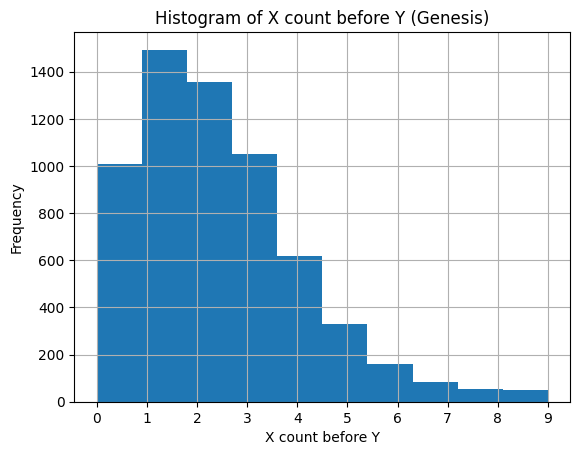

In [75]:
file = "../data/outputY_gn"

cont_x = 0
cont=0

list_cont = []

with open(file, 'r') as f:
    for line in f:
        for char in line:
            if char == 'X':
                cont_x += 1
            elif char == 'Y':
                cont = cont_x
                cont_x = 0
                cont = str(cont)
                for amount in cont:
                      list_cont.append(int(amount))
        cont_x = 0

plt.hist(list_cont, bins=10)

plt.xticks(ticks=np.arange(0, 10), labels=np.arange(0, 10))
plt.xlabel("X count before Y")
plt.ylabel("Frequency")
plt.title("Histogram of X count before Y (Genesis)")
plt.grid(True)

plt.show()

In [71]:
i=0
file_input=[]

#pattern = r"\b\w+\b(?!\|)"
pattern = r"[^\s|]+"

for verse in F.otype.s('verse'):
    verse_text = ""
    cl_atoms = L.d(verse,'clause_atom')
    for clause_atom in cl_atoms:
        #clause_atom_text = "".join([F.g_cons.v(word) + (" " if F.trailer.v(word) else "") for word in L.d(clause_atom, 'word')]).replace("_", " ").strip()
        #clause_atom_text += "|" if clause_atom_text == 'W' else "| "

        text = []
        for word in L.d(clause_atom, 'word'):
            if not F.trailer.v(word):
                text.append(F.g_cons.v(word))
            else:
                text.append(F.g_cons.v(word) + " ")
            
        clause_atom_text = "".join(text)
        clause_atom_text = clause_atom_text.replace("_"," ")
        clause_atom_text = clause_atom_text.strip()

        if F.g_cons.v(word) in ['W','H'] and F.trailer.v(word) == "":
            clause_atom_text += "|"
        else:
            clause_atom_text += "| "
            
        #Replacing the words in the output file as 'X' 
        #if clause_atom_text in ['W','H']:
        #    clause_atom_text += "|"
        #else:
        #    clause_atom_text += "| "

        clause_atom_text = re.sub(pattern, "X", clause_atom_text)
        clause_atom_text = clause_atom_text.replace("X|", "Y")
        
        verse_text = verse_text + clause_atom_text
    verse_text = verse_text.strip()
    bo, ch, ve = T.sectionFromNode(verse)
    final = "\t".join([bo, str(ch), str(ve), verse_text.strip()])

    if bo == 'Genesis' and str(ch) == '7' and str(ve) == '16':
        if i<10:
            print(final)
        i=i+1
    
    if bo in ['Genesis', 'Exodus']:
        file_input.append(final)

        with open('../data/outputY_gn_ex', 'w', encoding='utf-8') as file:
            for line in file_input:
                file.write(line + '\n')

Genesis	7	16	YY X X X X Y X X X Y X X Y


In [79]:
inputfile = "../data/input_gn_ex"
outputfile = "../data/outputY_gn_ex"

for i in range(1,2746):
    word_count_input = count_words_in_line(inputfile, i)
    word_count_output = count_words_in_line(outputfile, i)

    if word_count_input != word_count_output:
        print(f"Line {i} of file {inputfile} contains {word_count_input} words.")
        print(f"Line {i} of file {outputfile} contains {word_count_output} words.\n")

    i=i+1

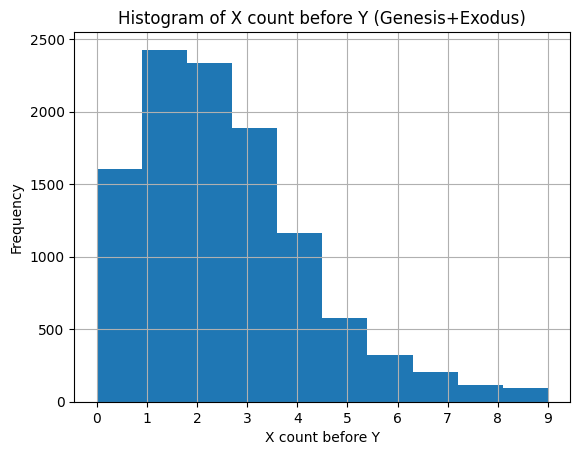

In [76]:
file = "../data/outputY_gn_ex"

cont_x = 0
cont=0

list_cont = []

with open(file, 'r') as f:
    for line in f:
        for char in line:
            if char == 'X':
                cont_x += 1
            elif char == 'Y':
                cont = cont_x
                cont_x = 0
                cont = str(cont)
                for amount in cont:
                      list_cont.append(int(amount))
        cont_x = 0

plt.hist(list_cont, bins=10)

plt.xticks(ticks=np.arange(0, 10), labels=np.arange(0, 10))
plt.xlabel("X count before Y")
plt.ylabel("Frequency")
plt.title("Histogram of X count before Y (Genesis+Exodus)")
plt.grid(True)

plt.show()

In [83]:
!python main.py -mo=train -i=input_gn_ex -o=outputY_gn_ex -ep=5 -l=3 -lr=0.0001 -et=True

Epoch	Training loss	Training accuracy	Validation loss	Validation accuracy
1	0.37862745687895133	0.8370028967852016	0.32249761837370255	0.815505469711249
2	0.2917751487991262	0.8624006102352431	0.29049686281120074	0.8538511438453886
3	0.2685707875321936	0.8750559758893626	0.2725973851189894	0.864370158986492
4	0.24775301683927492	0.8874664378811332	0.2418183997273445	0.8809322274470536
5	0.23354126580442439	0.89390235539518	0.22031183702104232	0.8929682755111391


C:\Users\TF\anaconda3\lib\site-packages\torch\nn\modules\transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\TF\anaconda3\lib\site-packages\torch\nn\functional.py:5137: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
C:\Users\TF\anaconda3\lib\site-packages\torch\nn\modules\transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Time of execution = 49 min

In [86]:
file = "../evaluation_results_transformer/input_gn_ex_outputY_gn_ex_ONE_DATASET/results_3seq_len_0.0001lr_512embsize_8nhead_transformer_0.1dropout_128_batchsize_5epochs_3beamsize.txt"

n = 10656

n = int(float(n)/2)

TP = 0
FP = 0
FN = 0
TN = 0

length=3

with open(file, 'r') as f:
    lines = f.readlines()

    for i in range(0, n):
        predicted = lines[2*i].strip()
        predicted = predicted[10:].replace("X|","Y").replace(" ","")
        
        truevalue = lines[2*i+1].strip()
        truevalue = truevalue[10:].replace("X|","Y").replace(" ","")

        for j in range(0,length):
            if predicted[j] == truevalue[j] and truevalue[j] == 'X':
                TN = TN+1
            if predicted[j] == truevalue[j] and truevalue[j] == 'Y':
                TP = TP+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'Y':
                FN = FN+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'X':
                FP = FP+1
    
print(f"TP = {TP} --- FP = {FP}\nFN = {FN} --- TN = {TN}")

precision = TP/(TP+FP)
recall = TP/(TP+FN)
fscore = (2 * precision * recall) / (precision + recall)

print(f"Precision = {precision}\nRecall = {recall}\nFscore = {fscore}")

TP = 2548 --- FP = 1488
FN = 1905 --- TN = 10043
Precision = 0.6313181367690783
Recall = 0.5721985178531327
Fscore = 0.6003062787136293


In [1]:
!python main.py -mo=train -i=input_gn_ex -o=outputY_gn_ex -ep=5 -l=6 -lr=0.0001 -et=True

Epoch	Training loss	Training accuracy	Validation loss	Validation accuracy
1	0.41656100634012133	0.8288947593665265	0.3134634879423279	0.8350575850117847
2	0.30592087225484405	0.8591993930001609	0.30949718068590526	0.8479567831025707
3	0.30170171701129356	0.8582844303634515	0.30091402035480946	0.857384623866803
4	0.29320300891300116	0.8601035874348368	0.3124091366940013	0.8342453231640692
5	0.28568762437482575	0.8638624415909072	0.2945650100866215	0.8579513735307981


C:\Users\TF\anaconda3\lib\site-packages\torch\nn\modules\transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\TF\anaconda3\lib\site-packages\torch\nn\functional.py:5137: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
C:\Users\TF\anaconda3\lib\site-packages\torch\nn\modules\transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Time of execution = 1:37 min

#### June 2 experiment - Google Colab

Time of execution ~ 1:30 min

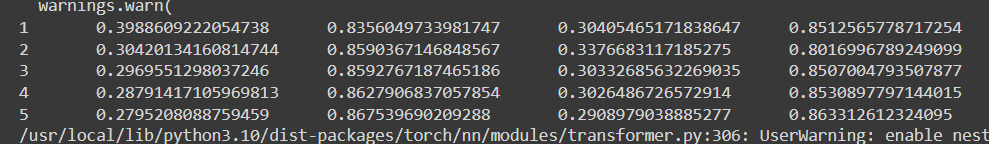

#### June 6 experiment - AUSS's Mac

Time of execution ~ 1 h

<div>
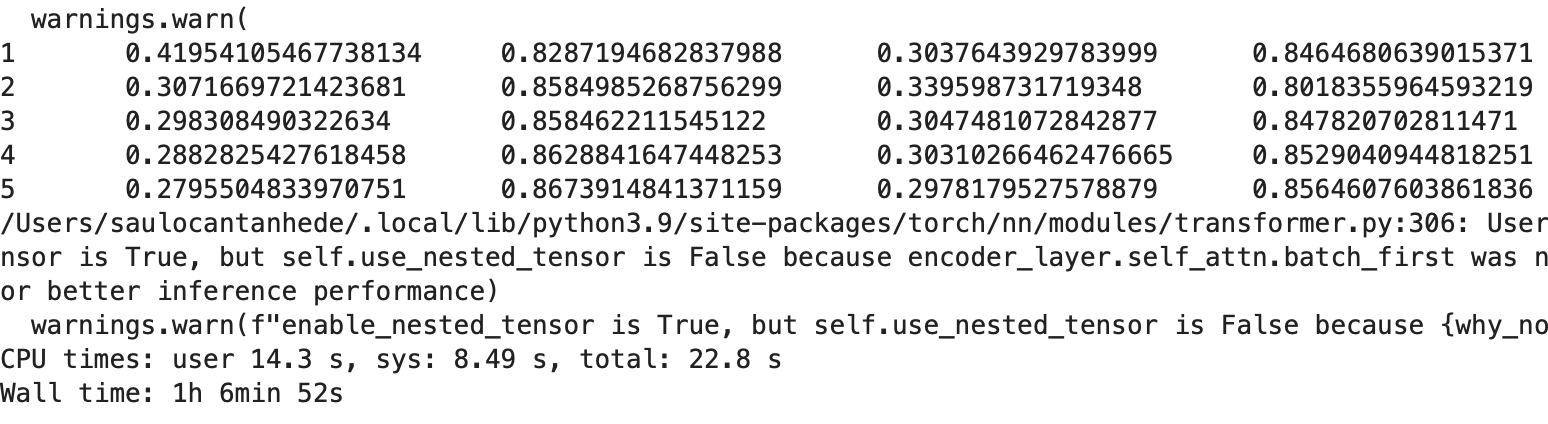
</div>

#### June 10 experiment - MacBook Pro

Using CPU

In [2]:
%%time
!python main.py -mo=train -i=input_gn_ex -o=outputY_gn_ex -ep=5 -l=6 -lr=0.0001 -et=True

/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
Epoch	Training loss	Training accuracy	Validation loss	Validation accuracy
/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/functional.py:5109: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
1	0.42392899463780903	0.8265554690656143	0.3109124817433702	0.8351870022220149
2	0.3076746069178338	0.8584416961573096	0.3304920445314368	0.8096142197798993
3	0.3003414973220805	0.8580822773951452	0.30659215926491196	0.8504362975096295
4	0.2894879699673314	0.86306170546922	0.2995239287595046	0.8530528064712408
5	0.

Using GPU

In [1]:
%%time
!python main.py -mo=train -i=input_gn_ex -o=outputY_gn_ex -ep=5 -l=6 -lr=0.0001 -et=True

/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
Epoch	Training loss	Training accuracy	Validation loss	Validation accuracy
/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/functional.py:5109: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
1	nan	0.7710405349204814	nan	0.0
2	nan	0.0	nan	0.0
3	nan	0.0	nan	0.0
4	nan	0.0	nan	0.0
5	nan	0.0	nan	0.0
/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first

In [2]:
file = "../evaluation_results_transformer/input_gn_ex_outputY_gn_ex_ONE_DATASET/results_6seq_len_0.0001lr_512embsize_8nhead_transformer_0.1dropout_128_batchsize_5epochs_3beamsize.txt"

n = 10344

n = int(float(n)/2)

TP = 0
FP = 0
FN = 0
TN = 0

length=6

with open(file, 'r') as f:
    lines = f.readlines()

    for i in range(0, n):
        predicted = lines[2*i].strip()
        predicted = predicted[10:].replace("X|","Y").replace(" ","")
        
        truevalue = lines[2*i+1].strip()
        truevalue = truevalue[10:].replace("X|","Y").replace(" ","")

        for j in range(0,length):
            if predicted[j] == truevalue[j] and truevalue[j] == 'X':
                TN = TN+1
            if predicted[j] == truevalue[j] and truevalue[j] == 'Y':
                TP = TP+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'Y':
                FN = FN+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'X':
                FP = FP+1
    
print(f"TP = {TP} --- FP = {FP}\nFN = {FN} --- TN = {TN}")

precision = TP/(TP+FP)
recall = TP/(TP+FN)
fscore = (2 * precision * recall) / (precision + recall)

print(f"Precision = {precision}\nRecall = {recall}\nFscore = {fscore}")

TP = 3655 --- FP = 5212
FN = 5147 --- TN = 17018
Precision = 0.4122025487763618
Recall = 0.4152465348784367
Fscore = 0.41371894278114213


## June 9 experiment

Creating dataset - the entire Masoretic Text

In [5]:
file_input=[]
bo_old=None

for verse in F.otype.s('verse'):
    text = "".join([F.g_cons.v(word) if not F.trailer.v(word) else F.g_cons.v(word)+" " for word in L.d(verse,'word')]).replace("_", " ")
    bo, ch, ve = T.sectionFromNode(verse)
    final = "\t".join([bo, str(ch), str(ve), text.strip()])

    if bo != bo_old:
        print(bo)
        bo_old=bo
    
    file_input.append(final)

    with open('../data/input_MT', 'w', encoding='utf-8') as file:
        for line in file_input:
            file.write(line + '\n')

Genesis
Exodus
Leviticus
Numbers
Deuteronomy
Joshua
Judges
1_Samuel
2_Samuel
1_Kings
2_Kings
Isaiah
Jeremiah
Ezekiel
Hosea
Joel
Amos
Obadiah
Jonah
Micah
Nahum
Habakkuk
Zephaniah
Haggai
Zechariah
Malachi
Psalms
Job
Proverbs
Ruth
Song_of_songs
Ecclesiastes
Lamentations
Esther
Daniel
Ezra
Nehemiah
1_Chronicles
2_Chronicles


In [70]:
file_input=[]
bo_old=None
i=0

pattern = r"[^\s|]+"

for verse in F.otype.s('verse'):
    verse_text = ""
    cl_atoms = L.d(verse,'clause_atom')
    for clause_atom in cl_atoms:
        #clause_atom_text = "".join([F.g_cons.v(word) + (" " if F.trailer.v(word) else "") for word in L.d(clause_atom, 'word')]).replace("_", " ").strip()
        #clause_atom_text += "|" if clause_atom_text == 'W' else "| "

        text = []
        for word in L.d(clause_atom, 'word'):
            if not F.trailer.v(word):
                text.append(F.g_cons.v(word))
            else:
                text.append(F.g_cons.v(word) + " ")
            
        clause_atom_text = "".join(text)
        clause_atom_text = clause_atom_text.replace("_"," ")
        clause_atom_text = clause_atom_text.strip()

        if F.g_cons.v(word) in ['W','H'] and F.trailer.v(word) == "":
            clause_atom_text += "|"
        elif F.g_cons.v(word) == '' and F.trailer.v(word) == "":
            clause_atom_text += "|"
        else:
            clause_atom_text += "| "

        clause_atom_text = re.sub(pattern, "X", clause_atom_text)
        clause_atom_text = clause_atom_text.replace("X|", "Y")
        
        verse_text = verse_text + clause_atom_text
    verse_text = verse_text.strip()
    bo, ch, ve = T.sectionFromNode(verse)
    final = "\t".join([bo, str(ch), str(ve), verse_text.strip()])

    if bo != bo_old:
        print(bo)
        bo_old=bo

    #if bo == 'Ezekiel' and str(ch) == '9' and str(ve) == '11':
    #    if i<10:
    #        print(final)
    #    i=i+1

    file_input.append(final)

    with open('../data/outputY_MT', 'w', encoding='utf-8') as file:
        for line in file_input:
            file.write(line + '\n')
#Ezekiel	9	11	WHNH| H>JC LBC HBDJM| >CR HQST BMTNJW| MCJB DBR| L>MR| <FJTJ K| >CR YWJTNJ|
#Ezekiel	9	11	X| X X X| X X X| X X| X| X X|X X|
#Ezekiel	9	11	Y X X Y X X Y X Y Y X Y X Y
#Ezekiel	9	11	Y X X Y X X Y X Y Y X YX Y

Genesis
Exodus
Leviticus
Numbers
Deuteronomy
Joshua
Judges
1_Samuel
2_Samuel
1_Kings
2_Kings
Isaiah
Jeremiah
Ezekiel
Hosea
Joel
Amos
Obadiah
Jonah
Micah
Nahum
Habakkuk
Zephaniah
Haggai
Zechariah
Malachi
Psalms
Job
Proverbs
Ruth
Song_of_songs
Ecclesiastes
Lamentations
Esther
Daniel
Ezra
Nehemiah
1_Chronicles
2_Chronicles


In [71]:
inputfile = "../data/input_MT"
outputfile = "../data/outputY_MT"

def count_words_in_line(file_path, line_number):
    """
    Counts the number of words in the specified line of a text file.

    Args:
        file_path (str): Path to the text file.
        line_number (int): Number of the line to count the words in.

    Returns:
        int: Number of words in the specified line.
    """

    with open(file_path, 'r') as f:
        lines = f.readlines()
    try:
        # Access the specified line
        line = lines[line_number - 1]
        # Remove leading and trailing whitespace from the line
        line = line.strip()
        # Split the line into words using whitespace as delimiters
        words = line.split()
        # Return the number of words
        return len(words)
    except IndexError:
        print(f"Error: Line {line_number} does not exist in the file.")
        return 0

with open(inputfile, 'r') as f:
    n_lines = len(f.readlines())

for i in range(1,n_lines):
    word_count_input = count_words_in_line(inputfile, i)
    word_count_output = count_words_in_line(outputfile, i)

    if word_count_input != word_count_output:
            print(f"Line {i} of file {inputfile} contains {word_count_input} words.")
            print(f"Line {i} of file {outputfile} contains {word_count_output} words.\n")
    
    i=i+1

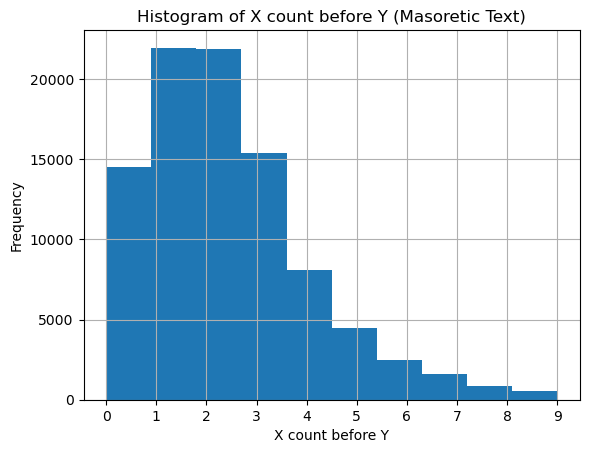

CPU times: user 449 ms, sys: 54.3 ms, total: 503 ms
Wall time: 340 ms


In [29]:
%%time
file = "../data/outputY_MT"

cont_x = 0
cont=0

list_cont = []

with open(file, 'r') as f:
    for line in f:
        for char in line:
            if char == 'X':
                cont_x += 1
            elif char == 'Y':
                cont = cont_x
                cont_x = 0
                cont = str(cont)
                for amount in cont:
                      list_cont.append(int(amount))
        cont_x = 0

plt.hist(list_cont, bins=10)

plt.xticks(ticks=np.arange(0, 10), labels=np.arange(0, 10))
plt.xlabel("X count before Y")
plt.ylabel("Frequency")
plt.title("Histogram of X count before Y (Masoretic Text)")
plt.grid(True)

plt.show()

In [14]:
%%time
!python main.py -mo=train -i=input_MT -o=outputY_MT -ep=5 -l=6 -lr=0.0001 -et=True

/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
Epoch	Training loss	Training accuracy	Validation loss	Validation accuracy
/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/functional.py:5109: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
1	0.31184897030119046	0.8500996069212795	0.2713806457219464	0.8755440739990644
2	0.24373793938347427	0.8861029480746615	0.2148032325441292	0.9046217730253894
3	0.2087895061316964	0.9036419627423604	0.193121677296279	0.9124686543258891
4	0.19258418056642193	0.9105438289138992	0.179909462772968	0.9174061740876107
5	0

In [26]:
file = "../evaluation_results_transformer/input_MT_outputY_MT_ONE_DATASET/results_6seq_len_0.0001lr_512embsize_8nhead_transformer_0.1dropout_128_batchsize_5epochs_3beamsize.txt"

with open(file, 'r') as f:
    line = f.readline()
    n = len(f.readlines())
    n = n-3 #correction in the number of lines since final lines does not contain data values

n = int(float(n)/2)

length=len(line.split())-1

TP = 0
FP = 0
FN = 0
TN = 0

with open(file, 'r') as f:
    lines = f.readlines()

    for i in range(0, n):
        predicted = lines[2*i].strip()
        predicted = predicted[10:].replace("X|","Y").replace(" ","")
        
        truevalue = lines[2*i+1].strip()
        truevalue = truevalue[10:].replace("X|","Y").replace(" ","")

        for j in range(0,length):
            if predicted[j] == truevalue[j] and truevalue[j] == 'X':
                TN = TN+1
            if predicted[j] == truevalue[j] and truevalue[j] == 'Y':
                TP = TP+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'Y':
                FN = FN+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'X':
                FP = FP+1
         
        #if i < 10:
        #    print(i, predicted)   
    
print(f"TP = {TP} --- FP = {FP}\nFN = {FN} --- TN = {TN}")

precision = TP/(TP+FP)
recall = TP/(TP+FN)
fscore = (2 * precision * recall) / (precision + recall)

print(f"Precision = {precision}\nRecall = {recall}\nFscore = {fscore}")

TP = 49661 --- FP = 15566
FN = 25896 --- TN = 165449
Precision = 0.7613564934766278
Recall = 0.6572653758089919
Fscore = 0.7054921013751562


### Issue with Ezekiel 9:11

In [16]:
!sed -n '12995p' < ../data/input_MT
!sed -n '12995p' < ../data/outputY_MT

Ezekiel	9	11	WHNH H>JC LBC HBDJM >CR HQST BMTNJW MCJB DBR L>MR <FJTJ K>CR YWJTNJ
Ezekiel	9	11	Y X X Y X X Y X Y Y X Y X Y


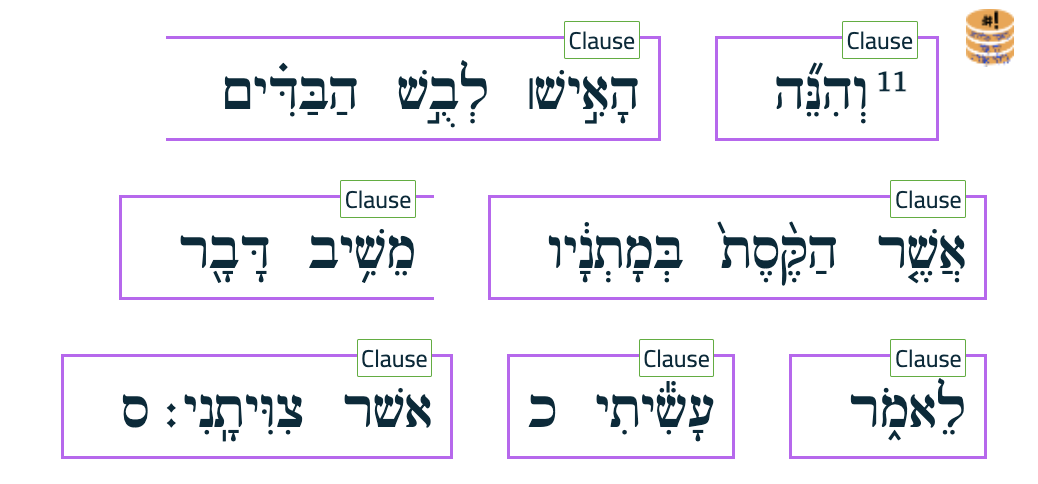

In [8]:
results = BHS.search("""
book book=Ezechiel
    chapter chapter=9
        verse verse=11
            word gloss* g_cons=K trailer*
""")
BHS.show(results, end=4, multiFeatures=False, queryFeatures=True, condensed=True, hiddenTypes={'phrase', 'phrase_atom','subphrase', 'sentence', 'sentence_atom', 'clause_atom'})

  0.30s 1 result


## June 14, 16 and 17 experiment

In [3]:
%%time
!python main.py -mo=train -i=input_MT -o=outputY_MT -ep=5 -l=10 -lr=0.0001 -et=True

/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
Epoch	Training loss	Training accuracy	Validation loss	Validation accuracy
/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/functional.py:5109: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
1	0.321773381142634	0.845757254145696	0.2950361900596988	0.8539570403748633
2	0.29207026216069193	0.8536310500370947	0.27774658633220656	0.8693029418313853
3	0.27167130252668353	0.8703177703556869	0.24248943554275218	0.8939143024753574
4	0.24061024041694362	0.8903777854563666	0.21134243682973142	0.9084199053632573


In [11]:
file = "../evaluation_results_transformer/input_MT_outputY_MT_ONE_DATASET/results_10seq_len_0.0001lr_512embsize_8nhead_transformer_0.1dropout_128_batchsize_5epochs_3beamsize.txt"

with open(file, 'r') as f:
    line = f.readline()
    n = len(f.readlines())
    n = n-3 #correction in the number of lines since final lines does not contain data values

n = int(float(n)/2)

length=len(line.split())-1

TP = 0
FP = 0
FN = 0
TN = 0

with open(file, 'r') as f:
    lines = f.readlines()

    for i in range(0, n):
        predicted = lines[2*i].strip()
        predicted = predicted[10:].replace("X|","Y").replace(" ","")
        
        truevalue = lines[2*i+1].strip()
        truevalue = truevalue[10:].replace("X|","Y").replace(" ","")

        for j in range(0,length):
            if predicted[j] == truevalue[j] and truevalue[j] == 'X':
                TN = TN+1
            if predicted[j] == truevalue[j] and truevalue[j] == 'Y':
                TP = TP+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'Y':
                FN = FN+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'X':
                FP = FP+1 
    
print(f"TP = {TP} --- FP = {FP}\nFN = {FN} --- TN = {TN}")

precision = TP/(TP+FP)
recall = TP/(TP+FN)
fscore = (2 * precision * recall) / (precision + recall)

print(f"Precision = {precision}\nRecall = {recall}\nFscore = {fscore}")

TP = 82939 --- FP = 32071
FN = 43569 --- TN = 273441
Precision = 0.7211459873054517
Recall = 0.6556028077275745
Fscore = 0.6868142333076623


In [1]:
%%time
!python main.py -mo=train -i=input_MT -o=outputY_MT -ep=10 -l=6 -lr=0.0001 -et=True

/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
Epoch	Training loss	Training accuracy	Validation loss	Validation accuracy
/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/functional.py:5109: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
1	0.3170941079117792	0.847133042354598	0.27693167723033063	0.8684237125698252
2	0.2518460692589907	0.8812677476619124	0.21867376616425263	0.9022724721288438
3	0.2108295000561694	0.902806544140072	0.19489063021455286	0.9116455556452266
4	0.19122946711994213	0.9111929961236668	0.17708581295067286	0.9183200417253031
5

In [2]:
file = "../evaluation_results_transformer/input_MT_outputY_MT_ONE_DATASET/results_6seq_len_0.0001lr_512embsize_8nhead_transformer_0.1dropout_128_batchsize_10epochs_3beamsize.txt"

with open(file, 'r') as f:
    line = f.readline()
    n = len(f.readlines())
    n = n-3 #correction in the number of lines since final lines does not contain data values

n = int(float(n)/2)

length=len(line.split())-1

TP = 0
FP = 0
FN = 0
TN = 0

with open(file, 'r') as f:
    lines = f.readlines()

    for i in range(0, n):
        predicted = lines[2*i].strip()
        predicted = predicted[10:].replace("X|","Y").replace(" ","")
        
        truevalue = lines[2*i+1].strip()
        truevalue = truevalue[10:].replace("X|","Y").replace(" ","")

        for j in range(0,length):
            if predicted[j] == truevalue[j] and truevalue[j] == 'X':
                TN = TN+1
            if predicted[j] == truevalue[j] and truevalue[j] == 'Y':
                TP = TP+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'Y':
                FN = FN+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'X':
                FP = FP+1
         
        #if i < 10:
        #    print(i, predicted)   
    
print(f"TP = {TP} --- FP = {FP}\nFN = {FN} --- TN = {TN}")

precision = TP/(TP+FP)
recall = TP/(TP+FN)
fscore = (2 * precision * recall) / (precision + recall)

print(f"Precision = {precision}\nRecall = {recall}\nFscore = {fscore}")

TP = 54334 --- FP = 14810
FN = 21223 --- TN = 166205
Precision = 0.7858093254656948
Recall = 0.7191127228450044
Fscore = 0.7509830616236238


## June 18 experiment

In [1]:
%%time
!python main.py -mo=train -i=input_MT -o=outputY_MT -ep=15 -l=8 -lr=0.0001 -et=True

/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
Epoch	Training loss	Training accuracy	Validation loss	Validation accuracy
/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/functional.py:5109: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
1	0.3163069135870494	0.8472616273420422	0.2859267290924713	0.8528903859126554
2	0.2751098913804695	0.8678449564422839	0.23932928464195385	0.891353104898373
3	0.2364350774384247	0.891917076188421	0.19806386800382333	0.9120685832664868
4	0.2049336624882097	0.9078407121752952	0.1781577479438829	0.9199193344620737
5	0.

In [2]:
file = "../evaluation_results_transformer/input_MT_outputY_MT_ONE_DATASET/results_8seq_len_0.0001lr_512embsize_8nhead_transformer_0.1dropout_128_batchsize_15epochs_3beamsize.txt"

with open(file, 'r') as f:
    line = f.readline()
    n = len(f.readlines())
    n = n-3 #correction in the number of lines since final lines does not contain data values

n = int(float(n)/2)

length=len(line.split())-1

TP = 0
FP = 0
FN = 0
TN = 0

with open(file, 'r') as f:
    lines = f.readlines()

    for i in range(0, n):
        predicted = lines[2*i].strip()
        predicted = predicted[10:].replace("X|","Y").replace(" ","")
        
        truevalue = lines[2*i+1].strip()
        truevalue = truevalue[10:].replace("X|","Y").replace(" ","")

        for j in range(0,length):
            if predicted[j] == truevalue[j] and truevalue[j] == 'X':
                TN = TN+1
            if predicted[j] == truevalue[j] and truevalue[j] == 'Y':
                TP = TP+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'Y':
                FN = FN+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'X':
                FP = FP+1
         
        #if i < 10:
        #    print(i, predicted)   
    
print(f"TP = {TP} --- FP = {FP}\nFN = {FN} --- TN = {TN}")

precision = TP/(TP+FP)
recall = TP/(TP+FN)
fscore = (2 * precision * recall) / (precision + recall)

print(f"Precision = {precision}\nRecall = {recall}\nFscore = {fscore}")

TP = 76781 --- FP = 17592
FN = 24047 --- TN = 223940
Precision = 0.8135907515920867
Recall = 0.761504740746618
Fscore = 0.7866865436140185


## June 20 experiment

In [1]:
%%time
!python main.py -mo=train -i=input_MT -o=outputY_MT -ep=15 -l=10 -lr=0.0001 -et=True

/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
Epoch	Training loss	Training accuracy	Validation loss	Validation accuracy
/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/functional.py:5109: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
1	0.3209064655916582	0.8462219402846345	0.2957739870339535	0.8530364243368336
2	0.29333141193351825	0.8525412898337396	0.27628838052007126	0.8704298118174252
3	0.26731481363041215	0.8732463405905474	0.23702303815597475	0.89715979675404
4	0.23072965184813865	0.8959231613015743	0.20140098666566372	0.9136912486296757


In [2]:
file = "../evaluation_results_transformer/input_MT_outputY_MT_ONE_DATASET/results_10seq_len_0.0001lr_512embsize_8nhead_transformer_0.1dropout_128_batchsize_15epochs_3beamsize.txt"

with open(file, 'r') as f:
    line = f.readline()
    n = len(f.readlines())
    n = n-3 #correction in the number of lines since final lines does not contain data values

n = int(float(n)/2)

length=len(line.split())-1

TP = 0
FP = 0
FN = 0
TN = 0

with open(file, 'r') as f:
    lines = f.readlines()

    for i in range(0, n):
        predicted = lines[2*i].strip()
        predicted = predicted[10:].replace("X|","Y").replace(" ","")
        
        truevalue = lines[2*i+1].strip()
        truevalue = truevalue[10:].replace("X|","Y").replace(" ","")

        for j in range(0,length):
            if predicted[j] == truevalue[j] and truevalue[j] == 'X':
                TN = TN+1
            if predicted[j] == truevalue[j] and truevalue[j] == 'Y':
                TP = TP+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'Y':
                FN = FN+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'X':
                FP = FP+1
         
        #if i < 10:
        #    print(i, predicted)   
    
print(f"TP = {TP} --- FP = {FP}\nFN = {FN} --- TN = {TN}")

precision = TP/(TP+FP)
recall = TP/(TP+FN)
fscore = (2 * precision * recall) / (precision + recall)

print(f"Precision = {precision}\nRecall = {recall}\nFscore = {fscore}")

TP = 96976 --- FP = 23113
FN = 29532 --- TN = 282399
Precision = 0.8075344119777832
Recall = 0.76656021753565
Fscore = 0.7865140289622341


## June 24 experiment

### Test with the book of Genesis

In [87]:
file_input=[]
#bo_old=None
i=0

pattern = r"[^\s|]+"

for verse in F.otype.s('verse'):
    verse_text = ""
    cl_atoms = L.d(verse,'clause_atom')
    for clause_atom in cl_atoms:
        text = []
        for word in L.d(clause_atom, 'word'):
            if not F.trailer.v(word):
                text.append(F.g_cons.v(word))
            else:
                text.append(F.g_cons.v(word) + " ")
            
        clause_atom_text = "".join(text)
        clause_atom_text = clause_atom_text.replace("_"," ")
        clause_atom_text = clause_atom_text.strip()

        if F.g_cons.v(word) in ['W','H'] and F.trailer.v(word) == "":
            clause_atom_text += " "
        elif F.g_cons.v(word) == '' and F.trailer.v(word) == "":
            clause_atom_text += " "
        else:
            clause_atom_text += " "
        
        verse_text = verse_text + clause_atom_text
    verse_text = verse_text.strip()
    bo, ch, ve = T.sectionFromNode(verse)
    final = "\t".join([bo, str(ch), str(ve), verse_text.strip()])

    #if bo != bo_old:
    #    print(bo)
    #    bo_old=bo

    if bo == 'Genesis' and str(ch) == '7' and str(ve) == '16':
        if i<10:
            print(final)
        i=i+1

    file_input.append(final)

    if bo == 'Genesis':
        with open('../data/inputns_gn', 'w', encoding='utf-8') as file:
            for line in file_input:
                file.write(line + '\n')

    #with open('../data/outputYns_MT', 'w', encoding='utf-8') as file:
    #    for line in file_input:
    #        file.write(line + '\n')
       
#Genesis	7	16	W|HB>JM| ZKR WNQBH MKL BFR B>W| K>CR YWH >TW >LHJM| WJSGR JHWH B<DW|
#Genesis	7	16	X|X| X X X X X| X X X X| X X X|
#Genesis	7	16	YY X X X X Y X X X Y X X Y
#Genesis	7	16	YYXXXXYXXXYXXY

Genesis	7	16	W HB>JM ZKR WNQBH MKL BFR B>W K>CR YWH >TW >LHJM WJSGR JHWH B<DW


In [89]:
file_input=[]
#bo_old=None
i=0

pattern = r"[^\s|]+"

for verse in F.otype.s('verse'):
    verse_text = ""
    cl_atoms = L.d(verse,'clause_atom')
    for clause_atom in cl_atoms:
        text = []
        for word in L.d(clause_atom, 'word'):
            if not F.trailer.v(word):
                text.append(F.g_cons.v(word))
            else:
                text.append(F.g_cons.v(word) + " ")
            
        clause_atom_text = "".join(text)
        clause_atom_text = clause_atom_text.replace("_"," ")
        clause_atom_text = clause_atom_text.strip()
            
        if F.g_cons.v(word) in ['W','H'] and F.trailer.v(word) == "":
            clause_atom_text += "| "
        elif F.g_cons.v(word) == '' and F.trailer.v(word) == "":
            clause_atom_text += "| "
        else:
            clause_atom_text += "| "

        clause_atom_text = re.sub(pattern, "X", clause_atom_text)
        clause_atom_text = clause_atom_text.replace("X|", "Y")
        clause_atom_text = clause_atom_text.replace(" ","")
        
        verse_text = verse_text + clause_atom_text
    verse_text = verse_text.strip()
    bo, ch, ve = T.sectionFromNode(verse)
    final = "\t".join([bo, str(ch), str(ve), verse_text.strip()])

    #if bo != bo_old:
    #    print(bo)
    #    bo_old=bo

    if bo == 'Genesis' and str(ch) == '7' and str(ve) == '16':
        if i<10:
            print(final)
        i=i+1

    file_input.append(final)

    if bo == 'Genesis':
        with open('../data/outputYns_gn', 'w', encoding='utf-8') as file:
            for line in file_input:
                file.write(line + '\n')

    #with open('../data/outputYns_MT', 'w', encoding='utf-8') as file:
    #    for line in file_input:
    #        file.write(line + '\n')
       
#Genesis	7	16	W|HB>JM| ZKR WNQBH MKL BFR B>W| K>CR YWH >TW >LHJM| WJSGR JHWH B<DW|
#Genesis	7	16	X|X| X X X X X| X X X X| X X X|
#Genesis	7	16	YY X X X X Y X X X Y X X Y

#Genesis	7	16	Y Y X X X X Y X X X Y X X Y

#Genesis	7	16	YYXXXXYXXXYXXY

Genesis	7	16	YYXXXXYXXXYXXY


In [50]:
results = BHS.search("""
book book=Genesis
    chapter chapter=7
        verse verse=16
            word gloss* g_cons=W trailer*
""")
BHS.show(results, end=4, multiFeatures=False, queryFeatures=True, condensed=True, hiddenTypes={'phrase', 'phrase_atom','subphrase', 'sentence', 'sentence_atom', 'clause_atom'})

  0.55s 3 results


In [90]:
inputfile = "../data/inputns_gn"
outputfile = "../data/outputY_gn_updated"

def count_words_in_line(file_path, line_number):
    """
    Counts the number of words in the specified line of a text file.

    Args:
        file_path (str): Path to the text file.
        line_number (int): Number of the line to count the words in.

    Returns:
        int: Number of words in the specified line.
    """

    with open(file_path, 'r') as f:
        lines = f.readlines()
    try:
        # Access the specified line
        line = lines[line_number - 1]
        # Remove leading and trailing whitespace from the line
        line = line.strip()
        # Split the line into words using whitespace as delimiters
        words = line.split()
        # Return the number of words
        return len(words)
    except IndexError:
        print(f"Error: Line {line_number} does not exist in the file.")
        return 0

with open(inputfile, 'r') as f:
    n_lines = len(f.readlines())

for i in range(1,n_lines):
    word_count_input = count_words_in_line(inputfile, i)
    word_count_output = count_words_in_line(outputfile, i)

    if word_count_input != word_count_output:
            print(f"Line {i} of file {inputfile} contains {word_count_input} words.")
            print(f"Line {i} of file {outputfile} contains {word_count_output} words.\n")
    
    i=i+1

In [95]:
inputfile = "../data/inputns_gn"
outputfile = "../data/outputYns_gn"

def count_words_in_line(file_path, line_number):
    """
    Counts the number of words in the specified line of a text file.

    Args:
        file_path (str): Path to the text file.
        line_number (int): Number of the line to count the words in.

    Returns:
        int: Number of words in the specified line.
    """

    with open(file_path, 'r') as f:
        lines = f.readlines()
    try:
        # Access the specified line
        line = lines[line_number - 1]
        # Remove leading and trailing whitespace from the line
        line = line.strip()
        # Split the line into words using whitespace as delimiters
        words = line.split()
        # Return the number of words
        return len(words)-3
    except IndexError:
        print(f"Error: Line {line_number} does not exist in the file.")
        return 0

def count_characters_in_line(file_path, line_number):
    """
    Counts the number of words in the specified line of a text file.

    Args:
        file_path (str): Path to the text file.
        line_number (int): Number of the line to count the words in.

    Returns:
        int: Number of words in the specified line.
    """

    with open(file_path, 'r') as f:
        lines = f.readlines()
        # Access the specified line
        line = lines[line_number - 1]
        # Remove leading and trailing whitespace from the line
        line = line.strip()
        # Split the line into words using whitespace as delimiters
        words = line.split()
        # Return the number of words
        return len(words[3])

with open(inputfile, 'r') as f:
    n_lines = len(f.readlines())

for i in range(1,n_lines):
    word_count_input = count_words_in_line(inputfile, i)
    word_count_output = count_characters_in_line(outputfile, i)

    if word_count_input != word_count_output:
            print(f"Line {i} of file {inputfile} contains {word_count_input} words.")
            print(f"Line {i} of file {outputfile} contains {word_count_output} words.\n")
    
    i=i+1

In [99]:
%%time
!python main.py -mo=train -i=inputns_gn -o=outputY_gn_updated -ep=15 -l=10 -lr=0.0001 -et=True

/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
Epoch	Training loss	Training accuracy	Validation loss	Validation accuracy
/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/functional.py:5109: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
1	0.5392719339443982	0.8018948615752446	0.32299468707950674	0.8378208295036763
2	0.3182617865146486	0.85755684861046	0.295148653909564	0.8489869600183824
3	0.31013644153108383	0.8577694144536364	0.2937569149934194	0.8492635569852941
4	0.30508659869175575	0.8576512507807749	0.29587413847227306	0.8477053653492647
5	0

In [106]:
file = "../evaluation_results_transformer/inputns_gn_outputY_gn_updated_ONE_DATASET/results_10seq_len_0.0001lr_512embsize_8nhead_transformer_0.1dropout_128_batchsize_15epochs_3beamsize.txt"

with open(file, 'r') as f:
    line = f.readline()
    n = len(f.readlines())
    n = n-3 #correction in the number of lines since final lines does not contain data values

n = int(float(n)/2)

length=len(line.split())-1

TP = 0
FP = 0
FN = 0
TN = 0

with open(file, 'r') as f:
    lines = f.readlines()

    for i in range(0, n):
        predicted = lines[2*i].strip()
        predicted = predicted[10:].replace("X|","Y").replace(" ","")
        
        truevalue = lines[2*i+1].strip()
        truevalue = truevalue[10:].replace("X|","Y").replace(" ","")

        for j in range(0,length):
            if predicted[j] == truevalue[j] and truevalue[j] == 'X':
                TN = TN+1
            if predicted[j] == truevalue[j] and truevalue[j] == 'Y':
                TP = TP+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'Y':
                FN = FN+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'X':
                FP = FP+1
         
        #if i < 10:
        #    print(i, predicted)   
    
print(f"TP = {TP} --- FP = {FP}\nFN = {FN} --- TN = {TN}")

precision = TP/(TP+FP)
recall = TP/(TP+FN)
fscore = (2 * precision * recall) / (precision + recall)

print(f"Precision = {precision}\nRecall = {recall}\nFscore = {fscore}")

TP = 1338 --- FP = 1376
FN = 7799 --- TN = 18717
Precision = 0.49299926308032427
Recall = 0.1464375615628762
Fscore = 0.22580372964306805


In [101]:
%%time
!python main.py -mo=train -i=inputns_gn -o=outputYns_gn -ep=15 -l=10 -lr=0.0001 -et=True

/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
Epoch	Training loss	Training accuracy	Validation loss	Validation accuracy
/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/functional.py:5109: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
1	0.49880633225045296	0.8129654118331943	0.31977100008550813	0.8410383157169115
2	0.31474520040410625	0.8585914686561875	0.3185978951261324	0.8382321346507352
3	0.3103792154574406	0.8570712320476207	0.2933851573616266	0.851761546415441
4	0.3023008744126743	0.8577514093967844	0.29220801268649454	0.8484041819852942
5

In [109]:
file = "../evaluation_results_transformer/inputns_gn_outputYns_gn_ONE_DATASET/results_10seq_len_0.0001lr_512embsize_8nhead_transformer_0.1dropout_128_batchsize_15epochs_3beamsize.txt"

with open(file, 'r') as f:
    line = f.readline()
    n = len(f.readlines())
    n = n-3 #correction in the number of lines since final lines does not contain data values

n = int(float(n)/2)

length=len(line.split())-1

TP = 0
FP = 0
FN = 0
TN = 0

with open(file, 'r') as f:
    lines = f.readlines()

    for i in range(0, n):
        predicted = lines[2*i].strip()
        predicted = predicted[10:].replace("X|","Y").replace(" ","")
        
        truevalue = lines[2*i+1].strip()
        truevalue = truevalue[10:].replace("X|","Y").replace(" ","")

        for j in range(0,length):
            if predicted[j] == truevalue[j] and truevalue[j] == 'X':
                TN = TN+1
            if predicted[j] == truevalue[j] and truevalue[j] == 'Y':
                TP = TP+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'Y':
                FN = FN+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'X':
                FP = FP+1
         
        #if i < 10:
        #    print(i, predicted)   
    
print(f"TP = {TP} --- FP = {FP}\nFN = {FN} --- TN = {TN}")

precision = TP/(TP+FP)
recall = TP/(TP+FN)
fscore = (2 * precision * recall) / (precision + recall)

print(f"Precision = {precision}\nRecall = {recall}\nFscore = {fscore}")

TP = 2113 --- FP = 1899
FN = 7024 --- TN = 18194
Precision = 0.5266699900299102
Recall = 0.2312575243515377
Fscore = 0.3213932618450072


### Considering the Masoretic Text

In [110]:
file_input=[]
bo_old=None
i=0

pattern = r"[^\s|]+"

for verse in F.otype.s('verse'):
    verse_text = ""
    cl_atoms = L.d(verse,'clause_atom')
    for clause_atom in cl_atoms:
        text = []
        for word in L.d(clause_atom, 'word'):
            if not F.trailer.v(word):
                text.append(F.g_cons.v(word))
            else:
                text.append(F.g_cons.v(word) + " ")
            
        clause_atom_text = "".join(text)
        clause_atom_text = clause_atom_text.replace("_"," ")
        clause_atom_text = clause_atom_text.strip()

        if F.g_cons.v(word) in ['W','H'] and F.trailer.v(word) == "":
            clause_atom_text += " "
        elif F.g_cons.v(word) == '' and F.trailer.v(word) == "":
            clause_atom_text += " "
        else:
            clause_atom_text += " "
        
        verse_text = verse_text + clause_atom_text
    verse_text = verse_text.strip()
    bo, ch, ve = T.sectionFromNode(verse)
    final = "\t".join([bo, str(ch), str(ve), verse_text.strip()])

    if bo != bo_old:
        print(bo)
        bo_old=bo

    #if bo == 'Genesis' and str(ch) == '7' and str(ve) == '16':
    #    if i<10:
    #        print(final)
    #    i=i+1

    file_input.append(final)

    with open('../data/inputYns_MT', 'w', encoding='utf-8') as file:
        for line in file_input:
            file.write(line + '\n')

Genesis
Exodus
Leviticus
Numbers
Deuteronomy
Joshua
Judges
1_Samuel
2_Samuel
1_Kings
2_Kings
Isaiah
Jeremiah
Ezekiel
Hosea
Joel
Amos
Obadiah
Jonah
Micah
Nahum
Habakkuk
Zephaniah
Haggai
Zechariah
Malachi
Psalms
Job
Proverbs
Ruth
Song_of_songs
Ecclesiastes
Lamentations
Esther
Daniel
Ezra
Nehemiah
1_Chronicles
2_Chronicles


In [111]:
file_input=[]
bo_old=None
i=0

pattern = r"[^\s|]+"

for verse in F.otype.s('verse'):
    verse_text = ""
    cl_atoms = L.d(verse,'clause_atom')
    for clause_atom in cl_atoms:
        text = []
        for word in L.d(clause_atom, 'word'):
            if not F.trailer.v(word):
                text.append(F.g_cons.v(word))
            else:
                text.append(F.g_cons.v(word) + " ")
            
        clause_atom_text = "".join(text)
        clause_atom_text = clause_atom_text.replace("_"," ")
        clause_atom_text = clause_atom_text.strip()
            
        if F.g_cons.v(word) in ['W','H'] and F.trailer.v(word) == "":
            clause_atom_text += "| "
        elif F.g_cons.v(word) == '' and F.trailer.v(word) == "":
            clause_atom_text += "| "
        else:
            clause_atom_text += "| "

        clause_atom_text = re.sub(pattern, "X", clause_atom_text)
        clause_atom_text = clause_atom_text.replace("X|", "Y")
        clause_atom_text = clause_atom_text.replace(" ","")
        
        verse_text = verse_text + clause_atom_text
    verse_text = verse_text.strip()
    bo, ch, ve = T.sectionFromNode(verse)
    final = "\t".join([bo, str(ch), str(ve), verse_text.strip()])

    if bo != bo_old:
        print(bo)
        bo_old=bo

    #if bo == 'Genesis' and str(ch) == '7' and str(ve) == '16':
    #    if i<10:
    #        print(final)
    #    i=i+1

    file_input.append(final)

    #if bo == 'Genesis':
    #    with open('../data/outputYns_gn', 'w', encoding='utf-8') as file:
    #        for line in file_input:
    #            file.write(line + '\n')

    with open('../data/outputYns_MT', 'w', encoding='utf-8') as file:
        for line in file_input:
            file.write(line + '\n')

Genesis
Exodus
Leviticus
Numbers
Deuteronomy
Joshua
Judges
1_Samuel
2_Samuel
1_Kings
2_Kings
Isaiah
Jeremiah
Ezekiel
Hosea
Joel
Amos
Obadiah
Jonah
Micah
Nahum
Habakkuk
Zephaniah
Haggai
Zechariah
Malachi
Psalms
Job
Proverbs
Ruth
Song_of_songs
Ecclesiastes
Lamentations
Esther
Daniel
Ezra
Nehemiah
1_Chronicles
2_Chronicles


In [114]:
inputfile = "../data/inputYns_MT"
outputfile = "../data/outputYns_MT"

def count_words_in_line(file_path, line_number):
    """
    Counts the number of words in the specified line of a text file.

    Args:
        file_path (str): Path to the text file.
        line_number (int): Number of the line to count the words in.

    Returns:
        int: Number of words in the specified line.
    """

    with open(file_path, 'r') as f:
        lines = f.readlines()
    try:
        # Access the specified line
        line = lines[line_number - 1]
        # Remove leading and trailing whitespace from the line
        line = line.strip()
        # Split the line into words using whitespace as delimiters
        words = line.split()
        # Return the number of words
        return len(words)-3
    except IndexError:
        print(f"Error: Line {line_number} does not exist in the file.")
        return 0

def count_characters_in_line(file_path, line_number):
    """
    Counts the number of words in the specified line of a text file.

    Args:
        file_path (str): Path to the text file.
        line_number (int): Number of the line to count the words in.

    Returns:
        int: Number of words in the specified line.
    """

    with open(file_path, 'r') as f:
        lines = f.readlines()
        # Access the specified line
        line = lines[line_number - 1]
        # Remove leading and trailing whitespace from the line
        line = line.strip()
        # Split the line into words using whitespace as delimiters
        words = line.split()
        # Return the number of words
        return len(words[3])

with open(inputfile, 'r') as f:
    n_lines = len(f.readlines())

for i in range(1,n_lines):
    word_count_input = count_words_in_line(inputfile, i)
    word_count_output = count_characters_in_line(outputfile, i)

    if word_count_input != word_count_output:
            print(f"Line {i} of file {inputfile} contains {word_count_input} words.")
            print(f"Line {i} of file {outputfile} contains {word_count_output} words.\n")
    
    i=i+1

In [115]:
%%time
!python main.py -mo=train -i=inputYns_MT -o=outputYns_MT -ep=15 -l=10 -lr=0.0001 -et=True

/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
Epoch	Training loss	Training accuracy	Validation loss	Validation accuracy
/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/functional.py:5109: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
1	0.3148905348847066	0.8521702862534624	0.29115996426485946	0.8550751792026705
2	0.2921325289658152	0.8560284245027275	0.2802801487410871	0.8637349232456141
3	0.270414170112336	0.8750820864697002	0.23898166483548589	0.8988514049816698
4	0.23479894163782172	0.8980594936419051	0.20074284181494337	0.9174288917255828
5

In [116]:
file = "../evaluation_results_transformer/inputYns_MT_outputYns_MT_ONE_DATASET/results_10seq_len_0.0001lr_512embsize_8nhead_transformer_0.1dropout_128_batchsize_15epochs_3beamsize.txt"

with open(file, 'r') as f:
    line = f.readline()
    n = len(f.readlines())
    n = n-3 #correction in the number of lines since final lines does not contain data values

n = int(float(n)/2)

length=len(line.split())-1

TP = 0
FP = 0
FN = 0
TN = 0

with open(file, 'r') as f:
    lines = f.readlines()

    for i in range(0, n):
        predicted = lines[2*i].strip()
        predicted = predicted[10:].replace("X|","Y").replace(" ","")
        
        truevalue = lines[2*i+1].strip()
        truevalue = truevalue[10:].replace("X|","Y").replace(" ","")

        for j in range(0,length):
            if predicted[j] == truevalue[j] and truevalue[j] == 'X':
                TN = TN+1
            if predicted[j] == truevalue[j] and truevalue[j] == 'Y':
                TP = TP+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'Y':
                FN = FN+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'X':
                FP = FP+1
         
        #if i < 10:
        #    print(i, predicted)   
    
print(f"TP = {TP} --- FP = {FP}\nFN = {FN} --- TN = {TN}")

precision = TP/(TP+FP)
recall = TP/(TP+FN)
fscore = (2 * precision * recall) / (precision + recall)

print(f"Precision = {precision}\nRecall = {recall}\nFscore = {fscore}")

TP = 98663 --- FP = 23745
FN = 28055 --- TN = 282127
Precision = 0.8060175805502908
Recall = 0.7786028819899304
Fscore = 0.7920730875139488


## June 26 experiment

### Spacing all words

In [46]:
file_input=[]
bo_old=None
i=0

pattern = r"[^\s|]+"

for verse in F.otype.s('verse'):
    verse_text = ""
    cl_atoms = L.d(verse,'clause_atom')
    for clause_atom in cl_atoms:
        text = []
        for word in L.d(clause_atom, 'word'):
            if not F.trailer.v(word) and not F.g_cons.v(word):
                text.append(F.g_cons.v(word))
            elif F.trailer.v(word) == ' ' and not F.g_cons.v(word):
                #text.append(F.g_cons.v(word))
                pass
            elif F.trailer.v(word) == '00 ' and not F.g_cons.v(word):
                pass
            else:
                text.append(F.g_cons.v(word) + " ")
            
            #text.append(F.g_cons.v(word) + " ") #space between all words
        
        clause_atom_text = "".join(text)
        clause_atom_text = clause_atom_text.replace("_"," ")
        clause_atom_text = clause_atom_text.strip()

        if F.g_cons.v(word) in ['W','H'] and F.trailer.v(word) == "":
            clause_atom_text += " "
        elif F.g_cons.v(word) == '' and F.trailer.v(word) == "":
            clause_atom_text += " "
        else:
            clause_atom_text += " "
        
        verse_text = verse_text + clause_atom_text
    verse_text = verse_text.strip()
    bo, ch, ve = T.sectionFromNode(verse)
    final = "\t".join([bo, str(ch), str(ve), verse_text.strip()])

    if bo != bo_old:
        print(bo)
        bo_old=bo

    #if bo == 'Jeremiah' and str(ch) == '31' and str(ve) == '38':
    #    print(final)

    file_input.append(final)

    with open('../data/input_space_MT', 'w', encoding='utf-8') as file:
        for line in file_input:
            file.write(line + '\n')

Genesis
Exodus
Leviticus
Numbers
Deuteronomy
Joshua
Judges
1_Samuel
2_Samuel
1_Kings
2_Kings
Isaiah
Jeremiah
Ezekiel
Hosea
Joel
Amos
Obadiah
Jonah
Micah
Nahum
Habakkuk
Zephaniah
Haggai
Zechariah
Malachi
Psalms
Job
Proverbs
Ruth
Song_of_songs
Ecclesiastes
Lamentations
Esther
Daniel
Ezra
Nehemiah
1_Chronicles
2_Chronicles


In [47]:
file_input=[]
bo_old=None
i=0

pattern = r"[^\s|]+"

for verse in F.otype.s('verse'):
    verse_text = ""
    cl_atoms = L.d(verse,'clause_atom')
    for clause_atom in cl_atoms:
        text = []
        for word in L.d(clause_atom, 'word'):
            #text.append(F.g_cons.v(word) + " ") #space between all words
            
            if not F.trailer.v(word) and not F.g_cons.v(word):
                text.append(F.g_cons.v(word))
            elif F.trailer.v(word) ==' 'and not F.g_cons.v(word):
                pass
            elif F.trailer.v(word) =='00 ' and not F.g_cons.v(word):
                pass
            else:
                text.append(F.g_cons.v(word) + " ")
            
        clause_atom_text = "".join(text)
        clause_atom_text = clause_atom_text.replace("_"," ")
        clause_atom_text = clause_atom_text.strip()
            
        if F.g_cons.v(word) in ['W','H'] and F.trailer.v(word) == "":
            clause_atom_text += "| "
        elif F.g_cons.v(word) == '' and F.trailer.v(word) == "":
            clause_atom_text += "| "
        else:
            clause_atom_text += "| "

        clause_atom_text = re.sub(pattern, "X", clause_atom_text)
        clause_atom_text = clause_atom_text.replace("X|", "Y")
        clause_atom_text = clause_atom_text.replace(" ","")
        
        verse_text = verse_text + clause_atom_text
    verse_text = verse_text.strip()
    bo, ch, ve = T.sectionFromNode(verse)
    final = "\t".join([bo, str(ch), str(ve), verse_text.strip()])

    if bo != bo_old:
        print(bo)
        bo_old=bo

    #if bo == 'Jeremiah' and str(ch) == '31' and str(ve) == '38':
    #    print(final)

    file_input.append(final)

    #if bo == 'Genesis':
    #    with open('../data/outputYns_gn', 'w', encoding='utf-8') as file:
    #        for line in file_input:
    #            file.write(line + '\n')

    with open('../data/outputYns_space_MT', 'w', encoding='utf-8') as file:
        for line in file_input:
            file.write(line + '\n')
       
#Genesis	7	16	W|HB>JM| ZKR WNQBH MKL BFR B>W| K>CR YWH >TW >LHJM| WJSGR JHWH B<DW|
#Genesis	7	16	X|X| X X X X X| X X X X| X X X|
#Genesis	7	16	YY X X X X Y X X X Y X X Y

#Genesis	7	16	Y Y X X X X Y X X X Y X X Y

#Genesis	7	16	YYXXXXYXXXYXXY

Genesis
Exodus
Leviticus
Numbers
Deuteronomy
Joshua
Judges
1_Samuel
2_Samuel
1_Kings
2_Kings
Isaiah
Jeremiah
Ezekiel
Hosea
Joel
Amos
Obadiah
Jonah
Micah
Nahum
Habakkuk
Zephaniah
Haggai
Zechariah
Malachi
Psalms
Job
Proverbs
Ruth
Song_of_songs
Ecclesiastes
Lamentations
Esther
Daniel
Ezra
Nehemiah
1_Chronicles
2_Chronicles


In [94]:
inputfile = "../data/input_space_MT"
outputfile = "../data/outputYns_space_MT"

def count_words_in_line(file_path, line_number):
    """
    Counts the number of words in the specified line of a text file.

    Args:
        file_path (str): Path to the text file.
        line_number (int): Number of the line to count the words in.

    Returns:
        int: Number of words in the specified line.
    """

    with open(file_path, 'r') as f:
        lines = f.readlines()
    try:
        # Access the specified line
        line = lines[line_number - 1]
        # Remove leading and trailing whitespace from the line
        line = line.strip()
        # Split the line into words using whitespace as delimiters
        words = line.split()
        # Return the number of words
        return len(words)-3
    except IndexError:
        print(f"Error: Line {line_number} does not exist in the file.")
        return 0

def count_characters_in_line(file_path, line_number):
    """
    Counts the number of words in the specified line of a text file.

    Args:
        file_path (str): Path to the text file.
        line_number (int): Number of the line to count the words in.

    Returns:
        int: Number of words in the specified line.
    """

    with open(file_path, 'r') as f:
        lines = f.readlines()
        # Access the specified line
        line = lines[line_number - 1]
        # Remove leading and trailing whitespace from the line
        line = line.strip()
        # Split the line into words using whitespace as delimiters
        words = line.split()
        # Return the number of words
        return len(words[3])

with open(inputfile, 'r') as f:
    n_lines = len(f.readlines())

for i in range(1,n_lines):
    word_count_input = count_words_in_line(inputfile, i)
    word_count_output = count_characters_in_line(outputfile, i)

    if word_count_input != word_count_output:
            print(f"Line {i} of file {inputfile} contains {word_count_input} words.")
            print(f"Line {i} of file {outputfile} contains {word_count_output} words.\n")
    
    i=i+1

In [ ]:
%%time
!python main.py -mo=train -i=input_space_MT -o=outputYns_space_MT -ep=15 -l=10 -lr=0.0001 -et=True

### Adding the part of the speech

In [92]:
file_input=[]
bo_old=None
i=0

pattern = r"[^\s|]+"

pdp_code = {
    'art': '1',
    'verb': '2',
    'subs': '3',
    'nmpr': '3',
    'advb': '5',
    'nega': '5',
    'prep': '6',
    'conj': '7',
    'prps': '8',
    'prde': '8',
    'prin': '8',
    'inrg': '8',
    'adjv': '9',
    'intj': '0'
}

for verse in F.otype.s('verse'):
    verse_text = ""
    cl_atoms = L.d(verse,'clause_atom')
    for clause_atom in cl_atoms:
        text = []
        for word in L.d(clause_atom, 'word'):
            #text.append(F.g_cons.v(word) + " ") #space between all words

            pdp = F.pdp.v(word)
            if not F.trailer.v(word) and not F.g_cons.v(word):
                #text.append(F.g_cons.v(word) + pdp_code[pdp])
                pass
            elif F.trailer.v(word) ==' 'and not F.g_cons.v(word):
                #text.append(F.g_cons.v(word) + pdp_code[pdp])
                pass
            elif F.trailer.v(word) =='00 ' and not F.g_cons.v(word):
                pass
            else:
                text.append(F.g_cons.v(word) + pdp_code[pdp] + " ")

            #    text.append(F.g_cons.v(word) + pdp_code[pdp] + " ")'''
        
        clause_atom_text = "".join(text)
        clause_atom_text = clause_atom_text.replace("_"," ")
        clause_atom_text = clause_atom_text.strip()

        if F.g_cons.v(word) in ['W','H'] and F.trailer.v(word) == "":
            clause_atom_text += " "
        elif F.g_cons.v(word) == '' and F.trailer.v(word) == "":
            clause_atom_text += " "
        else:
            clause_atom_text += " "
        
        verse_text = verse_text + clause_atom_text
    verse_text = verse_text.strip()
    bo, ch, ve = T.sectionFromNode(verse)
    final = "\t".join([bo, str(ch), str(ve), verse_text.strip()])

    if bo != bo_old:
        print(bo)
        bo_old=bo

    #if bo == 'Ezekiel' and str(ch) == '9' and str(ve) == '11':
    #    print(final)

    file_input.append(final)

    with open('../data/input_space_pdp_MT', 'w', encoding='utf-8') as file:
        for line in file_input:
            file.write(line + '\n')

#Jeremiah	31	38	HNH JMJM N>M JHWH W NBNTH H <JR L JHWH M MGDL XNN>L C<R H PNH
#Jeremiah	31	38	HNH0 JMJM3 N>M3 JHWH3 W7 NBNTH2 H1 <JR3 L6 JHWH3 M6 MGDL3 XNN>L3 C<R3 H1 PNH3

Genesis
Exodus
Leviticus
Numbers
Deuteronomy
Joshua
Judges
1_Samuel
2_Samuel
1_Kings
2_Kings
Isaiah
Jeremiah
Ezekiel
Hosea
Joel
Amos
Obadiah
Jonah
Micah
Nahum
Habakkuk
Zephaniah
Haggai
Zechariah
Malachi
Psalms
Job
Proverbs
Ruth
Song_of_songs
Ecclesiastes
Lamentations
Esther
Daniel
Ezra
Nehemiah
1_Chronicles
2_Chronicles


In [93]:
inputfile = "../data/input_space_pdp_MT"
outputfile = "../data/outputYns_space_MT"

def count_words_in_line(file_path, line_number):
    """
    Counts the number of words in the specified line of a text file.

    Args:
        file_path (str): Path to the text file.
        line_number (int): Number of the line to count the words in.

    Returns:
        int: Number of words in the specified line.
    """

    with open(file_path, 'r') as f:
        lines = f.readlines()
    try:
        # Access the specified line
        line = lines[line_number - 1]
        # Remove leading and trailing whitespace from the line
        line = line.strip()
        # Split the line into words using whitespace as delimiters
        words = line.split()
        # Return the number of words
        return len(words)-3
    except IndexError:
        print(f"Error: Line {line_number} does not exist in the file.")
        return 0

def count_characters_in_line(file_path, line_number):
    """
    Counts the number of words in the specified line of a text file.

    Args:
        file_path (str): Path to the text file.
        line_number (int): Number of the line to count the words in.

    Returns:
        int: Number of words in the specified line.
    """

    with open(file_path, 'r') as f:
        lines = f.readlines()
        # Access the specified line
        line = lines[line_number - 1]
        # Remove leading and trailing whitespace from the line
        line = line.strip()
        # Split the line into words using whitespace as delimiters
        words = line.split()
        # Return the number of words
        return len(words[3])

with open(inputfile, 'r') as f:
    n_lines = len(f.readlines())

for i in range(1,n_lines):
    word_count_input = count_words_in_line(inputfile, i)
    word_count_output = count_characters_in_line(outputfile, i)

    if word_count_input != word_count_output:
            print(f"Line {i} of file {inputfile} contains {word_count_input} words.")
            print(f"Line {i} of file {outputfile} contains {word_count_output} words.\n")
    
    i=i+1

In [97]:
inputfile = "../data/input_space_pdp_MT"
outputfile = "../data/input_space_MT"

def count_words_in_line(file_path, line_number):
    """
    Counts the number of words in the specified line of a text file.

    Args:
        file_path (str): Path to the text file.
        line_number (int): Number of the line to count the words in.

    Returns:
        int: Number of words in the specified line.
    """

    with open(file_path, 'r') as f:
        lines = f.readlines()
    try:
        # Access the specified line
        line = lines[line_number - 1]
        # Remove leading and trailing whitespace from the line
        line = line.strip()
        # Split the line into words using whitespace as delimiters
        words = line.split()
        # Return the number of words
        return len(words)-3
    except IndexError:
        print(f"Error: Line {line_number} does not exist in the file.")
        return 0

def count_characters_in_line(file_path, line_number):
    """
    Counts the number of words in the specified line of a text file.

    Args:
        file_path (str): Path to the text file.
        line_number (int): Number of the line to count the words in.

    Returns:
        int: Number of words in the specified line.
    """

    with open(file_path, 'r') as f:
        lines = f.readlines()
        # Access the specified line
        line = lines[line_number - 1]
        # Remove leading and trailing whitespace from the line
        line = line.strip()
        # Split the line into words using whitespace as delimiters
        words = line.split()
        # Return the number of words
        return len(words[3])

with open(inputfile, 'r') as f:
    n_lines = len(f.readlines())

for i in range(1,n_lines):
    word_count_input = count_words_in_line(inputfile, i)
    word_count_output = count_words_in_line(outputfile, i)

    if word_count_input != word_count_output:
            print(f"Line {i} of file {inputfile} contains {word_count_input} words.")
            print(f"Line {i} of file {outputfile} contains {word_count_output} words.\n")
    
    i=i+1

In [98]:
%%time
!python main.py -mo=train -i=input_space_pdp_MT -o=outputYns_space_MT -ep=15 -l=10 -lr=0.0001 -et=True

/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
Epoch	Training loss	Training accuracy	Validation loss	Validation accuracy
/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/functional.py:5109: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
1	0.19214454070913486	0.9231421710376186	0.1294689258982809	0.9472135728928945
2	0.11506276816556656	0.9541217320424974	0.10671314938519903	0.9560374249361777
3	0.10311756204945723	0.9581903141162161	0.09528717472535454	0.9605909039811636
4	0.0965785605992139	0.9604093196834018	0.09037084170841483	0.962726989493482

In [99]:
file = "../evaluation_results_transformer/input_space_pdp_MT_outputYns_space_MT_ONE_DATASET/results_10seq_len_0.0001lr_512embsize_8nhead_transformer_0.1dropout_128_batchsize_15epochs_3beamsize.txt"

with open(file, 'r') as f:
    line = f.readline()
    n = len(f.readlines())
    n = n-3 #correction in the number of lines since final lines does not contain data values

n = int(float(n)/2)

length=len(line.split())-1

TP = 0
FP = 0
FN = 0
TN = 0

with open(file, 'r') as f:
    lines = f.readlines()

    for i in range(0, n):
        predicted = lines[2*i].strip()
        predicted = predicted[10:].replace("X|","Y").replace(" ","")
        
        truevalue = lines[2*i+1].strip()
        truevalue = truevalue[10:].replace("X|","Y").replace(" ","")

        for j in range(0,length):
            if predicted[j] == truevalue[j] and truevalue[j] == 'X':
                TN = TN+1
            if predicted[j] == truevalue[j] and truevalue[j] == 'Y':
                TP = TP+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'Y':
                FN = FN+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'X':
                FP = FP+1
         
        #if i < 10:
        #    print(i, predicted)   
    
print(f"TP = {TP} --- FP = {FP}\nFN = {FN} --- TN = {TN}")

precision = TP/(TP+FP)
recall = TP/(TP+FN)
fscore = (2 * precision * recall) / (precision + recall)

print(f"Precision = {precision}\nRecall = {recall}\nFscore = {fscore}")

TP = 105818 --- FP = 19851
FN = 23164 --- TN = 453817
Precision = 0.8420374157509012
Recall = 0.8204090493247119
Fscore = 0.8310825404180623


### Issues with Judges 20:13, II Samuel 8:3, Jeremiah 31:38, and Ezekiel 9:11

In [95]:
! sed -n '7069p' ../data/input_space_pdp_MT
! sed -n '7069p' ../data/input_space_MT

Judges	20	13	W7 <TH5 TNW2 >T6 H1 >NCJM3 BNJ3 BLJ<L3 >CR7 B6 GB<H3 W7 NMJTM2 W7 NB<RH2 R<H3 M6 JFR>L3 W7 L>5 >BW2 BNJMN3 L6 CM<2 B6 QWL3 >XJHM3 BNJ3 JFR>L3
Judges	20	13	W <TH TNW >T H >NCJM BNJ BLJ<L >CR B GB<H W NMJTM W NB<RH R<H M JFR>L W L> >BW BNJMN L CM< B QWL >XJHM BNJ JFR>L


In [37]:
results = BHS.search("""
book book=Judices
    chapter chapter=20
        verse verse=13
            word g_cons* trailer*
""")
BHS.show(results, end=4, multiFeatures=False, queryFeatures=True, condensed=True, hiddenTypes={'phrase', 'phrase_atom','subphrase', 'sentence', 'sentence_atom', 'clause_atom'})

  1.14s 31 results


In [25]:
! sed -n '8130p' ../data/input_space_pdp_MT
! sed -n '8130p' ../data/outputYns_space_MT

2_Samuel	8	3	W7 JK2 DWD3 >T6 HDD<ZR3 BN3 RXB3 MLK3 YWBH3 B6 LKTW2 L6 HCJB2 JDW3 B6 NHR3 3
2_Samuel	8	3	XXXXXXXXYXYXXXXY


In [5]:
results = BHS.search("""
book book=Samuel_II
    chapter chapter=8
        verse verse=3
            word g_cons* trailer*
""")
BHS.show(results, end=4, multiFeatures=False, queryFeatures=True, condensed=True, hiddenTypes={'phrase', 'phrase_atom','subphrase', 'sentence', 'sentence_atom', 'clause_atom'})

  0.80s 17 results


In [52]:
! sed -n '12245p' ../data/input_space_MT
! sed -n '12245p' ../data/input_space_pdp_MT

Jeremiah	31	38	HNH JMJM N>M JHWH W NBNTH H <JR L JHWH M MGDL XNN>L C<R H PNH
Jeremiah	31	38	HNH0 JMJM3 N>M3 JHWH3 W7 NBNTH2 H1 <JR3 L6 JHWH3 M6 MGDL3 XNN>L3 C<R3 H1 PNH3


In [38]:
results = BHS.search("""
book book=Jeremia
    chapter chapter=31
        verse verse=38
            word g_cons* trailer*
""")
BHS.show(results, end=4, multiFeatures=False, queryFeatures=True, condensed=True, hiddenTypes={'phrase', 'phrase_atom','subphrase', 'sentence', 'sentence_atom', 'clause_atom'})

  1.28s 17 results


In [83]:
! sed -n '12995p' ../data/input_space_MT
! sed -n '12995p' ../data/input_space_pdp_MT

Ezekiel	9	11	W HNH H >JC LBC H BDJM >CR H QST B MTNJW MCJB DBR L >MR <FJTJ K >CR YWJTNJ
Ezekiel	9	11	W7 HNH0 H1 >JC3 LBC9 H1 BDJM3 >CR7 H1 QST3 B6 MTNJW3 MCJB2 DBR3 L6 >MR2 <FJTJ2 K6 3 >CR7 YWJTNJ2


In [85]:
results = BHS.search("""
book book=Ezechiel
    chapter chapter=9
        verse verse=11
            word g_cons* trailer*
""")
BHS.show(results, end=4, multiFeatures=False, queryFeatures=True, condensed=True, hiddenTypes={'phrase', 'phrase_atom','subphrase', 'sentence', 'sentence_atom', 'clause_atom'})

  0.86s 21 results


## July 4, and 7 experiment - adding phrase boundaries

In [140]:
results = BHS.search("""
book book=Genesis
    chapter chapter=1
        verse verse=1
            word g_cons* trailer*
""")
BHS.show(results, end=4, multiFeatures=False, queryFeatures=True, extraFeatures={'number'}, condensed=True, hiddenTypes={'phrase','half_verse','subphrase', 'sentence', 'sentence_atom', 'clause'})

  1.18s 11 results


In [63]:
i=0
file_input=[]
bo_old=None

pattern = r"[^\s$]+"
prep = ['W','H','C','B','J','WL','M', 'L']

for verse in F.otype.s('verse'):
    verse_text = ""
    cl_atoms = L.d(verse,'clause_atom')
    for clause_atom in cl_atoms:
        text = []
        ph_atoms = L.d(clause_atom,'phrase_atom')

        for phrase_atom in ph_atoms:
            phrase_atom_text = ""
            for word in L.d(phrase_atom, 'word'):
                if not F.trailer.v(word):
                    text.append(F.g_cons.v(word))
                else:
                    text.append(F.g_cons.v(word) + " ")

            phrase_atom_text = phrase_atom_text + "".join(text)
            phrase_atom_text = phrase_atom_text.replace("_"," ")
            phrase_atom_text = phrase_atom_text.replace(" $","$")
            phrase_atom_text = phrase_atom_text.strip()
            
            if F.g_cons.v(word) in prep and F.trailer.v(word) == "":
                text.append("$ ")
            elif F.g_cons.v(word) == '' and F.trailer.v(word) == "":
                text.append("")
            else:
                text.append("$ ")
            
        if phrase_atom_text in prep:
            phrase_atom_text = phrase_atom_text + "$ "
        else:
            phrase_atom_text = phrase_atom_text + "$ "
        
        clause_atom_text = "".join(phrase_atom_text)
        clause_atom_text = clause_atom_text.replace(" $", "$")
        
        clause_atom_text = clause_atom_text.replace("$$", "$")
        
        #clause_atom_text = re.sub(pattern, "X", clause_atom_text)
        #clause_atom_text = clause_atom_text.replace("X$", "Y")
        #clause_atom_text = clause_atom_text.replace("$", "")
        #clause_atom_text = clause_atom_text.replace(" ", "")

        #clause_atom_text = clause_atom_text.replace("$","")
        
        verse_text = verse_text + clause_atom_text
    verse_text = verse_text.strip()
    bo, ch, ve = T.sectionFromNode(verse)
    final = "\t".join([bo, str(ch), str(ve), verse_text.strip()])

    if bo != bo_old:
        print(bo)
        bo_old=bo
	
    #if bo == '2_Samuel' and str(ch) == '16' and str(ve) == '23':
    #    print(final)

    file_input.append(final)

    with open('../data/output_phrase_MT2', 'w', encoding='utf-8') as file:
        for line in file_input:
            file.write(line + '\n')
#Genesis	1	1	BR>CJT BR> >LHJM >T HCMJM W>T H>RY
#Genesis	1	1	BR>CJT$ BR>$ >LHJM$ >T HCMJM W>T H>RY$
#Genesis	1	1	X$ X$ X$ X X X X$
#Genesis	1	1	Y Y Y X X X Y
#Genesis	1	1	YYYXXXY

Genesis
Exodus
Leviticus
Numbers
Deuteronomy
Joshua
Judges
1_Samuel
2_Samuel
1_Kings
2_Kings
Isaiah
Jeremiah
Ezekiel
Hosea
Joel
Amos
Obadiah
Jonah
Micah
Nahum
Habakkuk
Zephaniah
Haggai
Zechariah
Malachi
Psalms
Job
Proverbs
Ruth
Song_of_songs
Ecclesiastes
Lamentations
Esther
Daniel
Ezra
Nehemiah
1_Chronicles
2_Chronicles


In [66]:
inputfile = "../data/input_phrase_MT"
outputfile = "../data/output_phrase_MT"

def count_words_in_line(file_path, line_number):
    """
    Counts the number of words in the specified line of a text file.

    Args:
        file_path (str): Path to the text file.
        line_number (int): Number of the line to count the words in.

    Returns:
        int: Number of words in the specified line.
    """

    with open(file_path, 'r') as f:
        lines = f.readlines()
    try:
        # Access the specified line
        line = lines[line_number - 1]
        # Remove leading and trailing whitespace from the line
        line = line.strip()
        # Split the line into words using whitespace as delimiters
        words = line.split()
        # Return the number of words
        return len(words)-3
    except IndexError:
        print(f"Error: Line {line_number} does not exist in the file.")
        return 0

def count_characters_in_line(file_path, line_number):
    """
    Counts the number of words in the specified line of a text file.

    Args:
        file_path (str): Path to the text file.
        line_number (int): Number of the line to count the words in.

    Returns:
        int: Number of words in the specified line.
    """

    with open(file_path, 'r') as f:
        lines = f.readlines()
        # Access the specified line
        line = lines[line_number - 1]
        # Remove leading and trailing whitespace from the line
        line = line.strip()
        # Split the line into words using whitespace as delimiters
        words = line.split()
        # Return the number of words
        return len(words[3])

with open(inputfile, 'r') as f:
    n_lines = len(f.readlines())

for i in range(1,n_lines):
    word_count_input = count_words_in_line(inputfile, i)
    word_count_output = count_characters_in_line(outputfile, i)

    if word_count_input != word_count_output:
            print(f"Line {i} of file {inputfile} contains {word_count_input} words.")
            print(f"Line {i} of file {outputfile} contains {word_count_output} characters.\n")
    
    i=i+1

In [3]:
%%time
!python main.py -mo=train -i=input_phrase_MT -o=output_phrase_MT -ep=15 -l=10 -lr=0.0001 -et=True

/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
Epoch	Training loss	Training accuracy	Validation loss	Validation accuracy
/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/functional.py:5109: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
1	0.2892115657402663	0.8821392770326341	0.2699352980704955	0.8834797225729512
2	0.26741006045332566	0.8863870121881712	0.26501439315227815	0.8839971415544327
3	0.25417674082890007	0.8919296319998729	0.2415780891518534	0.8933284757295175
4	0.2342000791107504	0.900683583705333	0.2178409360455878	0.9046316849046013
5	

In [4]:
file = "../evaluation_results_transformer/input_phrase_MT_output_phrase_MT_ONE_DATASET/results_10seq_len_0.0001lr_512embsize_8nhead_transformer_0.1dropout_128_batchsize_15epochs_3beamsize.txt"

with open(file, 'r') as f:
    line = f.readline()
    n = len(f.readlines())
    n = n-3 #correction in the number of lines since final lines does not contain data values

n = int(float(n)/2)

length=len(line.split())-1

TP = 0
FP = 0
FN = 0
TN = 0

with open(file, 'r') as f:
    lines = f.readlines()

    for i in range(0, n):
        predicted = lines[2*i].strip()
        predicted = predicted[10:].replace("X|","Y").replace(" ","")
        
        truevalue = lines[2*i+1].strip()
        truevalue = truevalue[10:].replace("X|","Y").replace(" ","")

        for j in range(0,length):
            if predicted[j] == truevalue[j] and truevalue[j] == 'X':
                TN = TN+1
            if predicted[j] == truevalue[j] and truevalue[j] == 'Y':
                TP = TP+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'Y':
                FN = FN+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'X':
                FP = FP+1
         
        #if i < 10:
        #    print(i, predicted)   
    
print(f"TP = {TP} --- FP = {FP}\nFN = {FN} --- TN = {TN}")

precision = TP/(TP+FP)
recall = TP/(TP+FN)
fscore = (2 * precision * recall) / (precision + recall)

print(f"Precision = {precision}\nRecall = {recall}\nFscore = {fscore}")

TP = 369628 --- FP = 13759
FN = 9244 --- TN = 102729
Precision = 0.964111980844421
Recall = 0.9756012584725184
Fscore = 0.9698225931081168


### Issues with Genesis 6:3, II Samuel 16:2, 23; 18:20, Jeremiah 18:3; 31:38, and Ruth 3:5, 17

In [201]:
! sed -n '141p' ../data/input_phrase_MT
! sed -n '141p' ../data/input_MT

Genesis	6	3	W$J>MR$ JHWH$ L>$ JDWN$ RWXJ$ B>DM$ L<LM$ BC$ GM HW>$ BFR$ W$HJW$ JMJW$ M>H W<FRJM CNH$
Genesis	6	3	WJ>MR JHWH L> JDWN RWXJ B>DM L<LM BCGM HW> BFR WHJW JMJW M>H W<FRJM CNH


In [202]:
results = BHS.search("""
book book=Genesis
    chapter chapter=6
        verse verse=3
            word g_cons* trailer*
""")
BHS.show(results, end=4, multiFeatures=False, queryFeatures=True, condensed=True, hiddenTypes={'phrase','half_verse','subphrase', 'sentence', 'sentence_atom', 'clause'})

  1.38s 23 results


In [225]:
! sed -n '8346p' ../data/input_phrase_MT
! sed -n '8346p' ../data/input_MT

2_Samuel	16	2	W$J>MR$ HMLK$ >L YJB>$ MH$ >LH$ LK$ W$J>MR$ YJB>$ HXMWRJM$ LBJT HMLK$ LRKB$ WL$ HLXM WHQJY$ L>KWL$ HN<RJM$ W$HJJN$ LCTWT$ HJ<P$ BMDBR$
2_Samuel	16	2	WJ>MR HMLK >L YJB> MH >LH LK WJ>MR YJB> HXMWRJM LBJT HMLK LRKB WLHLXM WHQJY L>KWL HN<RJM WHJJN LCTWT HJ<P BMDBR


In [226]:
results = BHS.search("""
book book=Samuel_II
    chapter chapter=16
        verse verse=2
            word g_cons* trailer*
""")
BHS.show(results, end=4, multiFeatures=False, queryFeatures=True, condensed=True, hiddenTypes={'phrase','half_verse','subphrase', 'sentence', 'sentence_atom', 'clause'})

  0.88s 40 results


In [231]:
! sed -n '8367p' ../data/input_phrase_MT
! sed -n '8367p' ../data/input_MT

2_Samuel	16	23	W$<YT >XJTPL$ >CR$ J<Y$ BJMJM HHM$ K>CR$ JC>L$ $ BDBR H>LHJM$ KN$ KL <YT >XJTPL$ GM LDWD GM L>BCLM$
2_Samuel	16	23	W<YT >XJTPL >CR J<Y BJMJM HHM K>CR JC>L  BDBR H>LHJM KN KL <YT >XJTPL GM LDWD GM L>BCLM


In [232]:
results = BHS.search("""
book book=Samuel_II
    chapter chapter=16
        verse verse=23
            word g_cons* trailer*
""")
BHS.show(results, end=4, multiFeatures=False, queryFeatures=True, condensed=True, hiddenTypes={'phrase','half_verse','subphrase', 'sentence', 'sentence_atom', 'clause'})

  0.82s 28 results


In [271]:
! sed -n '11903p' ../data/input_phrase_MT
! sed -n '11903p' ../data/input_MT

Jeremiah	18	3	W>RD BJT HJWYR WHN HW <FH ML>KH <L H>BNJM
Jeremiah	18	3	W>RD BJT HJWYR WHNHW <FH ML>KH <L H>BNJM


In [249]:
results = BHS.search("""
book book=Jeremia
    chapter chapter=18
        verse verse=3
            word g_cons* trailer*
""")
BHS.show(results, end=4, multiFeatures=False, queryFeatures=True, condensed=True, hiddenTypes={'phrase','half_verse','subphrase', 'sentence', 'sentence_atom', 'clause'})

  0.79s 13 results


In [314]:
! sed -n '12245p' ../data/input_phrase_MT
! sed -n '12245p' ../data/input_MT

! sed -n '19711p' ../data/input_phrase_MT
! sed -n '19711p' ../data/input_MT

! sed -n '19723p' ../data/input_phrase_MT
! sed -n '19723p' ../data/input_MT

Jeremiah	31	38	HNH JMJM N>M JHWH W NBNTH H<JR LJHWH MMGDL XNN>L C<R HPNH
Jeremiah	31	38	HNH JMJM  N>M JHWH WNBNTH H<JR LJHWH MMGDL XNN>L C<R HPNH
Ruth	3	5	W T>MR >LJH KL >CR T>MRJ ><FH
Ruth	3	5	WT>MR >LJH KL >CR T>MRJ  ><FH
Ruth	3	17	W T>MR CC HF<RJM H>LH NTN LJ KJ >MR >L TBW>J RJQM >L XMWTK
Ruth	3	17	WT>MR CC HF<RJM H>LH NTN LJ KJ >MR  >L TBW>J RJQM >L XMWTK


In [294]:
results = BHS.search("""
book book=Jeremia
    chapter chapter=31
        verse verse=38
            word g_cons* trailer*
""")
BHS.show(results, end=4, multiFeatures=False, queryFeatures=True, condensed=True, hiddenTypes={'phrase','half_verse','subphrase', 'sentence', 'sentence_atom', 'clause'})

  1.31s 17 results


In [317]:
results = BHS.search("""
book book=Ruth
    chapter chapter=3
        verse verse=5|17
            word g_cons* trailer*
""")
BHS.show(results, end=2, multiFeatures=False, queryFeatures=True, condensed=True, hiddenTypes={'phrase','half_verse','subphrase', 'sentence', 'sentence_atom', 'clause'})

  1.20s 25 results


In [333]:
! sed -n '8367p' ../data/input_phrase_MT
! sed -n '8367p' ../data/output_phrase_MT
! sed -n '8367p' ../data/output_phrase_MT2

2_Samuel	16	23	W <YT >XJTPL >CR J<Y BJMJM HHM K>CR JC>L BDBR H>LHJM KN KL <YT >XJTPL GM LDWD GM L>BCLM
2_Samuel	16	23	YXYYYXYYXYYXXYXXXY
2_Samuel	16	23	W$ <YT >XJTPL$ >CR$ J<Y$ BJMJM HHM$ K>CR$ BDBR H>LHJM$ KN$ KL <YT >XJTPL$ GM LDWD GM L>BCLM$


In [48]:
! sed -n '8367p' ../data/input_phrase_MT
! sed -n '8367p' ../data/output_phrase_MT
! sed -n '8367p' ../data/output_phrase_MT2

2_Samuel	16	23	W <YT >XJTPL >CR J<Y BJMJM HHM K>CR JC>L BDBR H>LHJM KN KL <YT >XJTPL GM LDWD GM L>BCLM
2_Samuel	16	23	YXYYYXYYYYXYYXXYXXXY
2_Samuel	16	23	W$ <YT >XJTPL$ >CR$ J<Y$ BJMJM HHM$ K>CR$ JC>L$ $ BDBR H>LHJM$ KN$ KL <YT >XJTPL$ GM LDWD GM L>BCLM$


In [59]:
! sed -n '8367p' ../data/input_phrase_MT
! sed -n '8367p' ../data/output_phrase_MT
! sed -n '8367p' ../data/output_phrase_MT2

2_Samuel	16	23	W <YT >XJTPL >CR J<Y BJMJM HHM K>CR JC>L BDBR H>LHJM KN KL <YT >XJTPL GM LDWD GM L>BCLM
2_Samuel	16	23	YXYYYXYYYXYYXXYXXXY
2_Samuel	16	23	W$ <YT >XJTPL$ >CR$ J<Y$ BJMJM HHM$ K>CR$ JC>L$ $ BDBR H>LHJM$ KN$ KL <YT >XJTPL$ GM LDWD GM L>BCLM$


In [348]:
results = BHS.search("""
book book=Samuel_II
    chapter chapter=16
        verse verse=23
            word g_cons* trailer=&
""")
BHS.show(results, end=2, multiFeatures=False, queryFeatures=True, condensed=True, hiddenTypes={'phrase','half_verse','subphrase', 'sentence', 'sentence_atom', 'clause'})

  0.91s 3 results


In [349]:
! sed -n '8416p' ../data/input_phrase_MT
! sed -n '8416p' ../data/output_phrase_MT
! sed -n '8416p' ../data/output_phrase_MT2

2_Samuel	18	20	W J>MR LW JW>B L> >JC BFRH >TH HJWM HZH W BFRT BJWM >XR W HJWM HZH L> TBFR KJ <L BN HMLK MT
2_Samuel	18	20	YYYYYXYYXYYYXYYXYYYXXYY
2_Samuel	18	20	W$ J>MR$ LW$ JW>B$ L>$ >JC BFRH$ >TH$ HJWM HZH$ W$ BFRT$ BJWM >XR$ W$ HJWM HZH$ L>$ TBFR$ KJ$$ BN HMLK$ MT$


In [350]:
results = BHS.search("""
book book=Samuel_II
    chapter chapter=18
        verse verse=20
            word g_cons* trailer=&
""")
BHS.show(results, end=2, multiFeatures=False, queryFeatures=True, condensed=True, hiddenTypes={'phrase','half_verse','subphrase', 'sentence', 'sentence_atom', 'clause'})

  0.98s 2 results


## July 11 experiment

In [13]:
i=0
file_input=[]
bo_old=None

pattern = r"[^\s$]+"
prep = ['W','H','C','B','J','WL','M', 'L']

for verse in F.otype.s('verse'):
    verse_text = ""
    cl_atoms = L.d(verse,'clause_atom')
    for clause_atom in cl_atoms:
        text = []
        ph_atoms = L.d(clause_atom,'phrase_atom')

        for phrase_atom in ph_atoms:
            phrase_atom_text = ""
            for word in L.d(phrase_atom, 'word'):
                #if not F.trailer.v(word):
                #    text.append(F.g_cons.v(word))
                #else:
                #    text.append(F.g_cons.v(word) + " ")\
                
                text.append(F.g_cons.v(word) + " ") #space between all words

            phrase_atom_text = phrase_atom_text + "".join(text)
            phrase_atom_text = phrase_atom_text.replace("_"," ")
            phrase_atom_text = phrase_atom_text.replace(" $","$")
            phrase_atom_text = phrase_atom_text.strip()
            
            if F.g_cons.v(word) in prep and F.trailer.v(word) == "":
                text.append("$ ")
            elif F.g_cons.v(word) == '' and F.trailer.v(word) == "":
                text.append("")
            else:
                text.append("$ ")
            
        if phrase_atom_text in prep:
            phrase_atom_text = phrase_atom_text + "$ "
        else:
            phrase_atom_text = phrase_atom_text + "$ "
        
        clause_atom_text = "".join(phrase_atom_text)
        clause_atom_text = clause_atom_text.replace(" $", "$")
        
        clause_atom_text = clause_atom_text.replace("$$", "$")
        
        clause_atom_text = re.sub(pattern, "X", clause_atom_text)
        clause_atom_text = clause_atom_text.replace("X$", "Y")
        clause_atom_text = clause_atom_text.replace("$", "")
        clause_atom_text = clause_atom_text.replace(" ", "")

        #clause_atom_text = clause_atom_text.replace("$","")
        
        verse_text = verse_text + clause_atom_text
    verse_text = verse_text.strip()
    bo, ch, ve = T.sectionFromNode(verse)
    final = "\t".join([bo, str(ch), str(ve), verse_text.strip()])

    if bo != bo_old:
        print(bo)
        bo_old=bo
	
#    if bo == 'Genesis' and str(ch) == '1' and str(ve) == '1':
#        print(final)

    file_input.append(final)

    with open('../data/output_phrase_space_MT', 'w', encoding='utf-8') as file:
        for line in file_input:
            file.write(line + '\n')
#Genesis	1	1	BR>CJT BR> >LHJM >T HCMJM W>T H>RY
#Genesis	1	1	BR>CJT$ BR>$ >LHJM$ >T HCMJM W>T H>RY$
#Genesis	1	1	X$ X$ X$ X X X X$
#Genesis	1	1	Y Y Y X X X Y
#Genesis	1	1	YYYXXXY

Genesis
Exodus
Leviticus
Numbers
Deuteronomy
Joshua
Judges
1_Samuel
2_Samuel
1_Kings
2_Kings
Isaiah
Jeremiah
Ezekiel
Hosea
Joel
Amos
Obadiah
Jonah
Micah
Nahum
Habakkuk
Zephaniah
Haggai
Zechariah
Malachi
Psalms
Job
Proverbs
Ruth
Song_of_songs
Ecclesiastes
Lamentations
Esther
Daniel
Ezra
Nehemiah
1_Chronicles
2_Chronicles


In [16]:
inputfile = "../data/input_space_MT"
outputfile = "../data/output_phrase_space_MT"

def count_words_in_line(file_path, line_number):
    """
    Counts the number of words in the specified line of a text file.

    Args:
        file_path (str): Path to the text file.
        line_number (int): Number of the line to count the words in.

    Returns:
        int: Number of words in the specified line.
    """

    with open(file_path, 'r') as f:
        lines = f.readlines()
    try:
        # Access the specified line
        line = lines[line_number - 1]
        # Remove leading and trailing whitespace from the line
        line = line.strip()
        # Split the line into words using whitespace as delimiters
        words = line.split()
        # Return the number of words
        return len(words)-3
    except IndexError:
        print(f"Error: Line {line_number} does not exist in the file.")
        return 0

def count_characters_in_line(file_path, line_number):
    """
    Counts the number of words in the specified line of a text file.

    Args:
        file_path (str): Path to the text file.
        line_number (int): Number of the line to count the words in.

    Returns:
        int: Number of words in the specified line.
    """

    with open(file_path, 'r') as f:
        lines = f.readlines()
        # Access the specified line
        line = lines[line_number - 1]
        # Remove leading and trailing whitespace from the line
        line = line.strip()
        # Split the line into words using whitespace as delimiters
        words = line.split()
        # Return the number of words
        return len(words[3])

with open(inputfile, 'r') as f:
    n_lines = len(f.readlines())

for i in range(1,n_lines):
    word_count_input = count_words_in_line(inputfile, i)
    word_count_output = count_characters_in_line(outputfile, i)

    if word_count_input != word_count_output:
            print(f"Line {i} of file {inputfile} contains {word_count_input} words.")
            print(f"Line {i} of file {outputfile} contains {word_count_output} characters.\n")
    
    i=i+1

In [43]:
! head -1 ../data/input_space_MT
! head -1 ../data/output_phrase_space_MT

Genesis	1	1	B R>CJT BR> >LHJM >T H CMJM W >T H >RY
Genesis	1	1	XYYYXXXXXXY


In [48]:
%%time
!python main.py -mo=train -i=input_space_MT -o=output_phrase_space_MT -ep=15 -l=10 -lr=0.0001 -et=True

/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
Epoch	Training loss	Training accuracy	Validation loss	Validation accuracy
/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/functional.py:5109: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
1	0.3302868771958877	0.848788662567645	0.324249390612756	0.8372314052613077
2	0.2471230655179233	0.8921261898271542	0.15005440892835453	0.9369202967541598
3	0.14780761212041918	0.9374520598598663	0.10880056431013693	0.9530458863077106
4	0.11519909640277215	0.9512806712402068	0.09285551225292912	0.9609326297750168
5

In [49]:
file = "../evaluation_results_transformer/input_space_MT_output_phrase_space_MT_ONE_DATASET/results_10seq_len_0.0001lr_512embsize_8nhead_transformer_0.1dropout_128_batchsize_15epochs_3beamsize.txt"

with open(file, 'r') as f:
    line = f.readline()
    n = len(f.readlines())
    n = n-3 #correction in the number of lines since final lines does not contain data values

n = int(float(n)/2)

length=len(line.split())-1

TP = 0
FP = 0
FN = 0
TN = 0

with open(file, 'r') as f:
    lines = f.readlines()

    for i in range(0, n):
        predicted = lines[2*i].strip()
        predicted = predicted[10:].replace("X|","Y").replace(" ","")
        
        truevalue = lines[2*i+1].strip()
        truevalue = truevalue[10:].replace("X|","Y").replace(" ","")

        for j in range(0,length):
            if predicted[j] == truevalue[j] and truevalue[j] == 'X':
                TN = TN+1
            if predicted[j] == truevalue[j] and truevalue[j] == 'Y':
                TP = TP+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'Y':
                FN = FN+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'X':
                FP = FP+1
         
        #if i < 10:
        #    print(i, predicted)   
    
print(f"TP = {TP} --- FP = {FP}\nFN = {FN} --- TN = {TN}")

precision = TP/(TP+FP)
recall = TP/(TP+FN)
fscore = (2 * precision * recall) / (precision + recall)

print(f"Precision = {precision}\nRecall = {recall}\nFscore = {fscore}")

TP = 370634 --- FP = 25380
FN = 11789 --- TN = 194847
Precision = 0.9359113566692087
Recall = 0.9691728792462796
Fscore = 0.9522517557618664


In [18]:
inputfile = "../data/input_space_pdp_MT"
outputfile = "../data/output_phrase_space_MT"

def count_words_in_line(file_path, line_number):
    """
    Counts the number of words in the specified line of a text file.

    Args:
        file_path (str): Path to the text file.
        line_number (int): Number of the line to count the words in.

    Returns:
        int: Number of words in the specified line.
    """

    with open(file_path, 'r') as f:
        lines = f.readlines()
    try:
        # Access the specified line
        line = lines[line_number - 1]
        # Remove leading and trailing whitespace from the line
        line = line.strip()
        # Split the line into words using whitespace as delimiters
        words = line.split()
        # Return the number of words
        return len(words)-3
    except IndexError:
        print(f"Error: Line {line_number} does not exist in the file.")
        return 0

def count_characters_in_line(file_path, line_number):
    """
    Counts the number of words in the specified line of a text file.

    Args:
        file_path (str): Path to the text file.
        line_number (int): Number of the line to count the words in.

    Returns:
        int: Number of words in the specified line.
    """

    with open(file_path, 'r') as f:
        lines = f.readlines()
        # Access the specified line
        line = lines[line_number - 1]
        # Remove leading and trailing whitespace from the line
        line = line.strip()
        # Split the line into words using whitespace as delimiters
        words = line.split()
        # Return the number of words
        return len(words[3])

with open(inputfile, 'r') as f:
    n_lines = len(f.readlines())

for i in range(1,n_lines):
    word_count_input = count_words_in_line(inputfile, i)
    word_count_output = count_characters_in_line(outputfile, i)

    if word_count_input != word_count_output:
            print(f"Line {i} of file {inputfile} contains {word_count_input} words.")
            print(f"Line {i} of file {outputfile} contains {word_count_output} characters.\n")
    
    i=i+1

In [44]:
! head -1 ../data/input_space_pdp_MT
! head -1 ../data/output_phrase_space_MT

Genesis	1	1	B6 R>CJT3 BR>2 >LHJM3 >T6 H1 CMJM3 W7 >T6 H1 >RY3
Genesis	1	1	XYYYXXXXXXY


In [3]:
%%time
!python main.py -mo=train -i=input_space_pdp_MT -o=output_phrase_space_MT -ep=15 -l=10 -lr=0.0001 -et=True

/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
Epoch	Training loss	Training accuracy	Validation loss	Validation accuracy
/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/functional.py:5109: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
1	0.1967321802054737	0.9125768753102331	0.10516585713076701	0.9555376038322447
2	0.0851338979241929	0.9624426243535155	0.07458444041921286	0.9673475545633001
3	0.07010486214026287	0.9690405484924689	0.06304570565198524	0.9730363437028589
4	0.06262322494784255	0.9725800157968794	0.058600837928889066	0.97487472742525

In [4]:
file = "../evaluation_results_transformer/input_space_pdp_MT_output_phrase_space_MT_ONE_DATASET/results_10seq_len_0.0001lr_512embsize_8nhead_transformer_0.1dropout_128_batchsize_15epochs_3beamsize.txt"

with open(file, 'r') as f:
    line = f.readline()
    n = len(f.readlines())
    n = n-3 #correction in the number of lines since final lines does not contain data values

n = int(float(n)/2)

length=len(line.split())-1

TP = 0
FP = 0
FN = 0
TN = 0

with open(file, 'r') as f:
    lines = f.readlines()

    for i in range(0, n):
        predicted = lines[2*i].strip()
        predicted = predicted[10:].replace("X|","Y").replace(" ","")
        
        truevalue = lines[2*i+1].strip()
        truevalue = truevalue[10:].replace("X|","Y").replace(" ","")

        for j in range(0,length):
            if predicted[j] == truevalue[j] and truevalue[j] == 'X':
                TN = TN+1
            if predicted[j] == truevalue[j] and truevalue[j] == 'Y':
                TP = TP+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'Y':
                FN = FN+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'X':
                FP = FP+1
         
        #if i < 10:
        #    print(i, predicted)   
    
print(f"TP = {TP} --- FP = {FP}\nFN = {FN} --- TN = {TN}")

precision = TP/(TP+FP)
recall = TP/(TP+FN)
fscore = (2 * precision * recall) / (precision + recall)

print(f"Precision = {precision}\nRecall = {recall}\nFscore = {fscore}")

TP = 373401 --- FP = 18498
FN = 9022 --- TN = 201729
Precision = 0.9527990630238914
Recall = 0.9764083227211753
Fscore = 0.9644592301393994


In [47]:
i=0
file_input=[]
bo_old=None

pattern = r"[^\s$]+"
prep = ['W','H','C','B','J','WL','M', 'L']

for verse in F.otype.s('verse'):
    verse_text = ""
    cl_atoms = L.d(verse,'clause_atom')
    for clause_atom in cl_atoms:
        text = []
        ph_atoms = L.d(clause_atom,'phrase_atom')

        for phrase_atom in ph_atoms:
            phrase_atom_text = ""
            for word in L.d(phrase_atom, 'word'):
                #if not F.trailer.v(word):
                #    text.append(F.g_cons.v(word))
                #else:
                #    text.append(F.g_cons.v(word) + " ")\
                
                text.append(F.g_cons.v(word) + " ") #space between all words

            phrase_atom_text = phrase_atom_text + "".join(text)
            phrase_atom_text = phrase_atom_text.replace("_"," ")
            phrase_atom_text = phrase_atom_text.replace(" $","$")
            phrase_atom_text = phrase_atom_text.strip()
            
            if F.g_cons.v(word) in prep and F.trailer.v(word) == "":
                text.append("$ ")
            elif F.g_cons.v(word) == '' and F.trailer.v(word) == "":
                text.append("")
            else:
                text.append("$ ")
            
        if phrase_atom_text in prep:
            phrase_atom_text = phrase_atom_text + "$ "
        else:
            phrase_atom_text = phrase_atom_text + "$ "
        
        clause_atom_text = "".join(phrase_atom_text)
        clause_atom_text = clause_atom_text.replace(" $", "$")
        
        clause_atom_text = clause_atom_text.replace("$$", "$")
        
        clause_atom_text = re.sub(pattern, "X", clause_atom_text)
        clause_atom_text = clause_atom_text.replace("X$", "P")
        clause_atom_text = clause_atom_text.replace("$", "")
        
        #clause_atom_text = clause_atom_text.replace("$","")

        clause_atom_text = clause_atom_text + "| "
        clause_atom_text = clause_atom_text.replace(" | ", "| ")

        clause_atom_text = clause_atom_text.replace("P|", "Y")
        clause_atom_text = clause_atom_text.replace(" ", "")
        
        verse_text = verse_text + clause_atom_text
    verse_text = verse_text.strip()
    bo, ch, ve = T.sectionFromNode(verse)
    final = "\t".join([bo, str(ch), str(ve), verse_text.strip()])

    if bo != bo_old:
        print(bo)
        bo_old=bo
	
#    if bo == 'Genesis' and str(ch) == '1' and str(ve) == '2':
#        print(final)

    file_input.append(final)

    with open('../data/output_phrase_clause_space_MT', 'w', encoding='utf-8') as file:
        for line in file_input:
            file.write(line + '\n')
#Genesis	1	2	W$ H >RY$ HJTH$ THW W BHW$| W$ XCK$ <L PNJ THWM$| W$ RWX >LHJM$ MRXPT$ <L PNJ H MJM$|
#Genesis	1	2	X$ X X$ X$ X X X$| X$ X$ X X X$| X$ X X$ X$ X X X X$|
#Genesis	1	2	P X P P X X P| P P X X P| P X P P X X X P|
#Genesis	1	2	P X P P X X Y P P X X Y P X P P X X X Y

Genesis
Exodus
Leviticus
Numbers
Deuteronomy
Joshua
Judges
1_Samuel
2_Samuel
1_Kings
2_Kings
Isaiah
Jeremiah
Ezekiel
Hosea
Joel
Amos
Obadiah
Jonah
Micah
Nahum
Habakkuk
Zephaniah
Haggai
Zechariah
Malachi
Psalms
Job
Proverbs
Ruth
Song_of_songs
Ecclesiastes
Lamentations
Esther
Daniel
Ezra
Nehemiah
1_Chronicles
2_Chronicles


In [36]:
inputfile = "../data/input_space_pdp_MT"
outputfile = "../data/output_phrase_clause_space_MT"

def count_words_in_line(file_path, line_number):
    """
    Counts the number of words in the specified line of a text file.

    Args:
        file_path (str): Path to the text file.
        line_number (int): Number of the line to count the words in.

    Returns:
        int: Number of words in the specified line.
    """

    with open(file_path, 'r') as f:
        lines = f.readlines()
    try:
        # Access the specified line
        line = lines[line_number - 1]
        # Remove leading and trailing whitespace from the line
        line = line.strip()
        # Split the line into words using whitespace as delimiters
        words = line.split()
        # Return the number of words
        return len(words)-3
    except IndexError:
        print(f"Error: Line {line_number} does not exist in the file.")
        return 0

def count_characters_in_line(file_path, line_number):
    """
    Counts the number of words in the specified line of a text file.

    Args:
        file_path (str): Path to the text file.
        line_number (int): Number of the line to count the words in.

    Returns:
        int: Number of words in the specified line.
    """

    with open(file_path, 'r') as f:
        lines = f.readlines()
        # Access the specified line
        line = lines[line_number - 1]
        # Remove leading and trailing whitespace from the line
        line = line.strip()
        # Split the line into words using whitespace as delimiters
        words = line.split()
        # Return the number of words
        return len(words[3])

with open(inputfile, 'r') as f:
    n_lines = len(f.readlines())

for i in range(1,n_lines):
    word_count_input = count_words_in_line(inputfile, i)
    word_count_output = count_characters_in_line(outputfile, i)

    if word_count_input != word_count_output:
            print(f"Line {i} of file {inputfile} contains {word_count_input} words.")
            print(f"Line {i} of file {outputfile} contains {word_count_output} characters.\n")
    
    i=i+1

In [39]:
! head -1 ../data/input_space_pdp_MT
! head -1 ../data/output_phrase_clause_space_MT2
! head -1 ../data/output_phrase_clause_space_MT

Genesis	1	1	B6 R>CJT3 BR>2 >LHJM3 >T6 H1 CMJM3 W7 >T6 H1 >RY3
Genesis	1	1	B R>CJT$ BR>$ >LHJM$ >T H CMJM W >T H >RY$|
Genesis	1	1	XPPPXXXXXXY


In [40]:
%%time
!python main.py -mo=train -i=input_space_pdp_MT -o=output_phrase_clause_space_MT -ep=15 -l=10 -lr=0.0001 -et=True

/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
Epoch	Training loss	Training accuracy	Validation loss	Validation accuracy
/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/functional.py:5109: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
1	0.31793022136876686	0.8718299504977738	0.18634832524800954	0.9242027188575797
2	0.16848639116653213	0.9327297921787181	0.14550275535307272	0.9411444634085024
3	0.14536194692136786	0.9416719423006106	0.1296899430375966	0.9474141057130704
4	0.13225211684559246	0.9467512269226461	0.1208238531850327	0.951509677310177

In [42]:
file = "../evaluation_results_transformer/input_space_pdp_MT_output_phrase_clause_space_MT_ONE_DATASET/results_10seq_len_0.0001lr_512embsize_8nhead_transformer_0.1dropout_128_batchsize_15epochs_3beamsize.txt"

with open(file, 'r') as f:
    line = f.readline()
    n = len(f.readlines())
    n = n-3 #correction in the number of lines since final lines does not contain data values

n = int(float(n)/2)

length=len(line.split())-1

TPx = 0
Exp = 0
Exy = 0
Epx = 0
TPp = 0
Epy = 0
Eyx = 0
Eyp = 0
TPy = 0

with open(file, 'r') as f:
    lines = f.readlines()

    for i in range(0, n):
        predicted = lines[2*i].strip()
        predicted = predicted[10:].replace(" ","")
        
        truevalue = lines[2*i+1].strip()
        truevalue = truevalue[10:].replace(" ","")

        for j in range(0,length):
            if predicted[j] == truevalue[j] and truevalue[j] == 'X':
                TPx = TPx+1
            if predicted[j] == truevalue[j] and truevalue[j] == 'P':
                TPp = TPp+1
            if predicted[j] == truevalue[j] and truevalue[j] == 'Y':
                TPy = TPy+1
            if predicted[j] == 'X' and truevalue[j] == 'P':
                Epx = Epx+1
            if predicted[j] == 'X' and truevalue[j] == 'Y':
                Eyx = Eyx+1
            if predicted[j] == 'P' and truevalue[j] == 'X':
                Exp = Exp+1
            if predicted[j] == 'P' and truevalue[j] == 'Y':
                Eyp = Eyp+1
            if predicted[j] == 'Y' and truevalue[j] == 'X':
                Exy = Exy+1
            if predicted[j] == 'Y' and truevalue[j] == 'P':
                Epy = Epy+1
    
print(f"TPy = {TPy} --- Epy = {Epy} --- Exy = {Exy}\nEyp = {Eyp} --- TPp = {TPp} --- Exp = {Exp}\nEyx = {Eyx} --- Epx = {Epx} --- TPx = {TPx}\n")

precision_y = TPy/(TPy+Exy+Epy)
recall_y = TPy/(TPy+Eyx+Eyp)
fscore_y = (2 * precision_y * recall_y) / (precision_y + recall_y)

print(f"Precision_y = {precision_y}\nRecall_y = {recall_y}\nFscore_y = {fscore_y}\n")

precision_p = TPp/(TPp+Exp+Eyp)
recall_p = TPp/(TPp+Epx+Epy)
fscore_p = (2 * precision_p * recall_p) / (precision_p + recall_p)

print(f"Precision_p = {precision_p}\nRecall_p = {recall_p}\nFscore_p = {fscore_p}")

TPy = 106911 --- Epy = 12170 --- Exy = 7522
Eyp = 18311 --- TPp = 235402 --- Exp = 9120
Eyx = 3760 --- Epx = 5869 --- TPx = 203585

Precision_y = 0.8444586621170115
Recall_y = 0.8288830999674374
Fscore_y = 0.8365983919244088

Precision_p = 0.8956333489325922
Recall_p = 0.9288236709924598
Fscore_p = 0.9119266126126824


Therefore, the models which are trained on **only one thing** are better than the models with the phrases/clauses combined.

## July 19 experiment - Samaritan Pentateuch

In [3]:
results = SP.search("""
book book=Genesis
    chapter chapter=1
        verse verse=1
            word g_cons* trailer* sp*
""")
SP.show(results, end=4, multiFeatures=False, queryFeatures=True, condensed=True)

  0.35s 11 results


In [40]:
file_input=[]
#bo_old=None
i=0

pattern = r"[^\s|]+"

for verse in F.otype.s('verse'):
    verse_text = ""
    text = []    
    for word in L.d(verse, 'word'):
        #if not F.trailer.v(word):
        #    text.append(F.g_cons.v(word))
        #else:
        #    text.append(F.g_cons.v(word) + " ")

        text.append(F.g_cons.v(word) + " ") #space between all words
            
    clause_atom_text = "".join(text)
    clause_atom_text = clause_atom_text.replace("_"," ")
    clause_atom_text = clause_atom_text.strip()

    if F.g_cons.v(word) in ['W','H'] and F.trailer.v(word) == "":
        clause_atom_text += " "
    elif F.g_cons.v(word) == '' and F.trailer.v(word) == "":
        clause_atom_text += " "
    else:
        clause_atom_text += " "
        
    verse_text = verse_text + clause_atom_text
    verse_text = verse_text.strip()
    bo, ch, ve = T.sectionFromNode(verse)
    final = "\t".join([bo, str(ch), str(ve), verse_text.strip()])

    if bo != bo_old:
        print(bo)
        bo_old=bo

#    if bo == 'Genesis' and str(ch) == '1' and str(ve) == '1':
#        if i<10:
#            print(final)
#        i=i+1

    file_input.append(final)

    with open('../data/input_space_SP', 'w', encoding='utf-8') as file:
        for line in file_input:
            file.write(line + '\n')

Genesis
Exodus
Leviticus
Numbers
Deuteronomy


In [3]:
%%time
!python main.py -mo=predict -pcf=data.yaml

/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
CPU times: user 2min 44s, sys: 1min 1s, total: 3min 46s
Wall time: 3h 34min 11s


## August 18 experiment - adding `pdp` to the Samaritan Pentateuch data

In [13]:
F.sp.freqList(nodeTypes={"word"})

(('subs', 33587),
 ('prep', 21294),
 ('verb', 18540),
 ('conj', 17990),
 ('nmpr', 7840),
 ('art', 7806),
 ('adjv', 2231),
 ('nega', 1494),
 ('prps', 1438),
 ('advb', 1002),
 ('prde', 826),
 ('intj', 430),
 ('inrg', 206),
 ('prin', 147),
 ('absent', 60))

In [17]:
results = SP.search("""
word sp=absent g_cons* lex*
""")
SP.show(results, end=1, multiFeatures=False, queryFeatures=True, condensed=True)

  0.32s 60 results


In [14]:
results = BHS.search("""
book book=Genesis
    chapter chapter=3
        verse verse=7
            word g_cons=JTPRW
""")
BHS.show(results, end=1, multiFeatures=False, queryFeatures=True, condensed=True)

  0.52s 1 result


Just ignoring the _absent_ value without attributing a new code, we have the following:

In [166]:
file_input=[]
bo_old=None
i=0

pattern = r"[^\s|]+"

pdp_code = {
    'art': '1',
    'verb': '2',
    'subs': '3',
    'nmpr': '3',
    'advb': '5',
    'nega': '5',
    'prep': '6',
    'conj': '7',
    'prps': '8',
    'prde': '8',
    'prin': '8',
    'inrg': '8',
    'adjv': '9',
    'intj': '0'
}

for verse in F.otype.s('verse'):
    verse_text = ""
    text = []    
    for word in L.d(verse, 'word'):
        pdp = F.sp.v(word)

        if F.lex.v(word) == 'absent':
            text.append(F.g_cons.v(word) + " ")
        else:
            text.append(F.g_cons.v(word) + pdp_code[pdp] + " ")
                   
    clause_atom_text = "".join(text)
    clause_atom_text = clause_atom_text.replace("_"," ")
    clause_atom_text = clause_atom_text.strip()

    if F.g_cons.v(word) in ['W','H'] and F.trailer.v(word) == "":
        clause_atom_text += " "
    elif F.g_cons.v(word) == '' and F.trailer.v(word) == "":
        clause_atom_text += " "
    else:
        clause_atom_text += " "
        
    verse_text = verse_text + clause_atom_text
    verse_text = verse_text.strip()
    bo, ch, ve = T.sectionFromNode(verse)
    final = "\t".join([bo, str(ch), str(ve), verse_text.strip()])

    if bo != bo_old:
        print(bo)
        bo_old=bo

    if bo == 'Genesis' and str(ch) == '3' and str(ve) == '7':
#        if i<10:
        print("SP: ", final)
        print("BHS: Genesis	3	7	W7 TPQXNH2 <JNJ3 CNJHM3 W7 JD<W2 KJ7 <JRMM9 HM8 W7 JTPRW2 <LH3 T>NH3 W7 J<FW2 LHM6 XGRT3")
#        i=i+1

    file_input.append(final)

    with open('../data/input_space_pdp_SP1', 'w', encoding='utf-8') as file:
        for line in file_input:
            file.write(line + '\n')

Genesis
SP:  Genesis	3	7	W7 TPQXNH2 <JNJ3 CNJHM3 W7 JD<W2 KJ7 <RMJM9 HM8 W7 JTP>RW <LJ3 T>NH3 W7 J<FW2 LHM6 XGRWT3
BHS: Genesis	3	7	W7 TPQXNH2 <JNJ3 CNJHM3 W7 JD<W2 KJ7 <JRMM9 HM8 W7 JTPRW2 <LH3 T>NH3 W7 J<FW2 LHM6 XGRT3
Exodus
Leviticus
Numbers
Deuteronomy


In [7]:
inputfile = "../data/input_space_SP"
outputfile = "../data/input_space_pdp_SP"

def count_words_in_line(file_path, line_number):
    """
    Counts the number of words in the specified line of a text file.

    Args:
        file_path (str): Path to the text file.
        line_number (int): Number of the line to count the words in.

    Returns:
        int: Number of words in the specified line.
    """

    with open(file_path, 'r') as f:
        lines = f.readlines()
    try:
        # Access the specified line
        line = lines[line_number - 1]
        # Remove leading and trailing whitespace from the line
        line = line.strip()
        # Split the line into words using whitespace as delimiters
        words = line.split()
        # Return the number of words
        return len(words)-3
    except IndexError:
        print(f"Error: Line {line_number} does not exist in the file.")
        return 0

def count_characters_in_line(file_path, line_number):
    """
    Counts the number of words in the specified line of a text file.

    Args:
        file_path (str): Path to the text file.
        line_number (int): Number of the line to count the words in.

    Returns:
        int: Number of words in the specified line.
    """

    with open(file_path, 'r') as f:
        lines = f.readlines()
        # Access the specified line
        line = lines[line_number - 1]
        # Remove leading and trailing whitespace from the line
        line = line.strip()
        # Split the line into words using whitespace as delimiters
        words = line.split()
        # Return the number of words
        return len(words[3])

with open(inputfile, 'r') as f:
    n_lines = len(f.readlines())

for i in range(1,n_lines):
    word_count_input = count_words_in_line(inputfile, i)
    word_count_output = count_words_in_line(outputfile, i)

    if word_count_input != word_count_output:
            print(f"Line {i} of file {inputfile} contains {word_count_input} words.")
            print(f"Line {i} of file {outputfile} contains {word_count_output} words.\n")
    
    i=i+1

In [8]:
%%time
!python main.py -mo=predict -pcf=data.yaml

/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
CPU times: user 2min 39s, sys: 1min, total: 3min 39s
Wall time: 3h 34min 49s


In [11]:
! head ../data/output_phrase_space_MT

Genesis	1	1	XYYYXXXXXXY
Genesis	1	2	YXYYXXYYYXXYYXYYXXXY
Genesis	1	3	YYYYYYYY
Genesis	1	4	YYYXXYYYYYYXXXXXXY
Genesis	1	5	YYYXYYYXYYYYYYYYYXY
Genesis	1	6	YYYYYXXXYYYYXYXY
Genesis	1	7	YYYXXYYYXXYYXYXYYXXYYXXXYYYY
Genesis	1	8	YYYXYYYYYYYYXY
Genesis	1	9	YYYYXYXXXYXXYYYXYYYY
Genesis	1	10	YYYXYYYXXXYYYYYYYY


In [131]:
! head -n 11 ../new_data/output_phrase_space_pdp_SP

0	Genesis 1 1	B6	X
1	Genesis 1 1	R>CJT3	Y
2	Genesis 1 1	BR>2	Y
3	Genesis 1 1	>LHJM3	Y
4	Genesis 1 1	>T6	X
5	Genesis 1 1	H1	X
6	Genesis 1 1	CMJM3	X
7	Genesis 1 1	W7	X
8	Genesis 1 1	>T6	X
9	Genesis 1 1	H1	X
10	Genesis 1 1	>RY3	Y


In [161]:
inputfile = "../new_data/output_phrase_space_pdp_SP"
outputfile = "../new_data/output_phrase_space_pdp_SP_test"

verse_old = None
result_old = ""
book_old = None

with open(inputfile, 'r') as f:
    lines = f.readlines()

with open(outputfile, 'w') as output:
    for i in range(1, len(lines)+1):
        line = lines[i - 1].strip()
        words = line.split()

        book = words[1]
        chapter = words[2]
        verse = words[3]

        result = words[5]

        if verse == verse_old:
            result = result_old + result
        else:
            if verse_old is not None:
                print(book, chapter, verse_old, result_old, sep='\t', file=output)
        
        result_old = result
        verse_old = verse

        if book != book_old:
            print(book)
        book_old=book

Genesis
Exodus
Leviticus
Numbers
Deuteronomy


In [162]:
! head ../data/output_phrase_space_MT

Genesis	1	1	XYYYXXXXXXY
Genesis	1	2	YXYYXXYYYXXYYXYYXXXY
Genesis	1	3	YYYYYYYY
Genesis	1	4	YYYXXYYYYYYXXXXXXY
Genesis	1	5	YYYXYYYXYYYYYYYYYXY
Genesis	1	6	YYYYYXXXYYYYXYXY
Genesis	1	7	YYYXXYYYXXYYXYXYYXXYYXXXYYYY
Genesis	1	8	YYYXYYYYYYYYXY
Genesis	1	9	YYYYXYXXXYXXYYYXYYYY
Genesis	1	10	YYYXYYYXXXYYYYYYYY


In [163]:
! head ../new_data/output_phrase_space_pdp_SP_test

Genesis	1	1	XYYYXXXXXXY
Genesis	1	2	YXYYXXYYYXXYYXYYXXXY
Genesis	1	3	YYYYYYYY
Genesis	1	4	YYYXXYYYYYYXXYYXXY
Genesis	1	5	YYYXXYYXYYYYYYYYYXY
Genesis	1	6	YYYYYXXXYYYYXYXY
Genesis	1	7	YYYXXYYYXXYYXYXYYXXYYXXXYYYY
Genesis	1	8	YYYXXYYYYYYYXY
Genesis	1	9	YYYYXYXXXYXXYYYXYYYY
Genesis	1	10	YYYXYYYXXXYYYYYYYY


Being more rigorous and attributing a new code to the _absent_ value, we have the following:

In [181]:
file_input=[]
bo_old=None
i=0

pattern = r"[^\s|]+"

pdp_code = {
    'art': '1',
    'verb': '2',
    'subs': '3',
    'nmpr': '3',
    'advb': '5',
    'nega': '5',
    'prep': '6',
    'conj': '7',
    'prps': '8',
    'prde': '8',
    'prin': '8',
    'inrg': '8',
    'adjv': '9',
    'intj': '0',
    'absent': '2'
}

for verse in F.otype.s('verse'):
    verse_text = ""
    text = []    
    for word in L.d(verse, 'word'):
        pdp = F.sp.v(word)

        text.append(F.g_cons.v(word) + pdp_code[pdp] + " ")
                   
    clause_atom_text = "".join(text)
    clause_atom_text = clause_atom_text.replace("_"," ")
    clause_atom_text = clause_atom_text.strip()

    if F.g_cons.v(word) in ['W','H'] and F.trailer.v(word) == "":
        clause_atom_text += " "
    elif F.g_cons.v(word) == '' and F.trailer.v(word) == "":
        clause_atom_text += " "
    else:
        clause_atom_text += " "
        
    verse_text = verse_text + clause_atom_text
    verse_text = verse_text.strip()
    bo, ch, ve = T.sectionFromNode(verse)
    final = "\t".join([bo, str(ch), str(ve), verse_text.strip()])

    if bo != bo_old:
        print(bo)
        bo_old=bo

    if bo == 'Genesis' and str(ch) == '3' and str(ve) == '7':
#        if i<10:
        print("SP: ", final)
        print("BHS: Genesis	3	7	W7 TPQXNH2 <JNJ3 CNJHM3 W7 JD<W2 KJ7 <JRMM9 HM8 W7 JTPRW2 <LH3 T>NH3 W7 J<FW2 LHM6 XGRT3")
#        i=i+1

    file_input.append(final)

    with open('../data/input_space_pdp_SP', 'w', encoding='utf-8') as file:
        for line in file_input:
            file.write(line + '\n')

Genesis
SP:  Genesis	3	7	W7 TPQXNH2 <JNJ3 CNJHM3 W7 JD<W2 KJ7 <RMJM9 HM8 W7 JTP>RW2 <LJ3 T>NH3 W7 J<FW2 LHM6 XGRWT3
BHS: Genesis	3	7	W7 TPQXNH2 <JNJ3 CNJHM3 W7 JD<W2 KJ7 <JRMM9 HM8 W7 JTPRW2 <LH3 T>NH3 W7 J<FW2 LHM6 XGRT3
Exodus
Leviticus
Numbers
Deuteronomy


In [182]:
%%time
!python main.py -mo=predict -pcf=data.yaml

/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
CPU times: user 3min 11s, sys: 1min 11s, total: 4min 23s
Wall time: 3h 52min 48s


In [186]:
inputfile = "../new_data/output_phrase_space_pdp_SP"
outputfile = "../new_data/output_phrase_space_pdp_SP_test"

verse_old = None
result_old = ""
book_old = None

with open(inputfile, 'r') as f:
    lines = f.readlines()

with open(outputfile, 'w') as output:
    for i in range(1, len(lines)+1):
        line = lines[i - 1].strip()
        words = line.split()

        book = words[1]
        chapter = words[2]
        verse = words[3]

        result = words[5]

        if verse == verse_old:
            result = result_old + result
        else:
            if verse_old is not None:
                print(book, chapter, verse_old, result_old, sep='\t', file=output)
        
        result_old = result
        verse_old = verse

        if book != book_old:
            print(book)
        book_old=book

Genesis
Exodus
Leviticus
Numbers
Deuteronomy


In [194]:
! head -n 20 ../new_data/output_phrase_space_pdp_SP

0	Genesis 1 1	B6	X
1	Genesis 1 1	R>CJT3	Y
2	Genesis 1 1	BR>2	Y
3	Genesis 1 1	>LHJM3	Y
4	Genesis 1 1	>T6	X
5	Genesis 1 1	H1	X
6	Genesis 1 1	CMJM3	X
7	Genesis 1 1	W7	X
8	Genesis 1 1	>T6	X
9	Genesis 1 1	H1	X
10	Genesis 1 1	>RY3	Y
11	Genesis 1 2	W7	Y
12	Genesis 1 2	H1	X
13	Genesis 1 2	>RY3	Y
14	Genesis 1 2	HJTH2	Y
15	Genesis 1 2	THW3	X
16	Genesis 1 2	W7	X
17	Genesis 1 2	BHW3	Y
18	Genesis 1 2	W7	Y
19	Genesis 1 2	XCK3	Y


In [187]:
! head ../data/output_phrase_space_MT

Genesis	1	1	XYYYXXXXXXY
Genesis	1	2	YXYYXXYYYXXYYXYYXXXY
Genesis	1	3	YYYYYYYY
Genesis	1	4	YYYXXYYYYYYXXXXXXY
Genesis	1	5	YYYXYYYXYYYYYYYYYXY
Genesis	1	6	YYYYYXXXYYYYXYXY
Genesis	1	7	YYYXXYYYXXYYXYXYYXXYYXXXYYYY
Genesis	1	8	YYYXYYYYYYYYXY
Genesis	1	9	YYYYXYXXXYXXYYYXYYYY
Genesis	1	10	YYYXYYYXXXYYYYYYYY


In [189]:
! head ../new_data/output_phrase_space_pdp_SP_test

Genesis	1	1	XYYYXXXXXXY
Genesis	1	2	YXYYXXYYYXXYYXYYXXXY
Genesis	1	3	YYYYYYYY
Genesis	1	4	YYYXXYYYYYYXXYYXXY
Genesis	1	5	YYYXXYYXYYYYYYYYYXY
Genesis	1	6	YYYYYXXXYYYYXYXY
Genesis	1	7	YYYXXYYYXXYYXYXYYXXYYXXXYYYY
Genesis	1	8	YYYXXYYYYYYYXY
Genesis	1	9	YYYYXYXXXYXXYYYXYYYY
Genesis	1	10	YYYXYYYXXXYYYYYYYY


## August 20 experiment - MT morphologically analyzed text

`g_cons` - word -consonantal-transliterated

`g_pfm` - preformative -pointed-transliterated\
`g_vbs`- root formation -pointed-transliterated\
`g_lex` - lexeme -pointed-transliterated\
`g_vbe` - verbal ending -pointed-transliterated\
`g_nme` - nominal ending -pointed-transliterated\
`g_prs` - pronominal suffix -pointed-transliterated\
`g_uvf` - univalent final consonant -pointed-transliterated

In [15]:
results = SP.search("""
word g_lex* g_nme* g_pfm* g_prs* g_uvf* g_vbe* g_vbs* trailer*
""")
SP.show(results, end=1, multiFeatures=False, queryFeatures=True, condensed=True)

  0.58s 114891 results


In [19]:
results = BHS.search("""
book book=Genesis
    chapter chapter=2
        verse verse=24
            word g_lex* g_nme* g_pfm* g_prs* g_uvf* g_vbe* g_vbs* g_cons*
""")
BHS.show(results, end=1, multiFeatures=False, queryFeatures=True, condensed=True)

  2.91s 18 results


Examples of values (showing up the 10th most frequent value) for the above features on the Samaritan Pentateuch:

In [10]:
F.g_pfm.freqList(nodeTypes={"word"})[:10]

(('', 381594),
 ('!!', 11451),
 ('!J.I!', 3643),
 ('!JI!', 3478),
 ('!J:!', 2767),
 ('!J.O!', 2665),
 ('!J.A!', 2087),
 ('!T.I!', 1814),
 ('!J.@!', 1497),
 ('!JA!', 1211))

In [11]:
F.g_prs.freqList(nodeTypes={"word"})[:10]

(('', 381432),
 ('+OW', 7596),
 ('+IJ', 4674),
 ('+W', 4246),
 ('+@M', 3110),
 ('+K@', 2959),
 ('+HEM', 2189),
 ('+:K@', 2179),
 ('+', 1983),
 ('+@H.', 1777))

In [12]:
F.g_uvf.freqList(nodeTypes={"word"})[:10]

(('', 423044),
 ('~@H', 1110),
 ('~IJ', 945),
 ('~@>', 760),
 ('~EN.', 528),
 ('~E', 91),
 ('~>', 53),
 ('~OW', 12),
 ('~IN.', 11),
 ('~EN:', 7))

In [13]:
F.g_vbe.freqList(nodeTypes={"word"})[:10]

(('', 352880),
 ('[', 50665),
 ('[W.', 12380),
 ('[T.IJ', 1943),
 ('[@H', 1823),
 ('[T.@', 1175),
 ('[TIJ', 1016),
 ('[T@', 554),
 ('[T.EM', 544),
 ('[IJ', 536))

In [14]:
F.g_vbs.freqList(nodeTypes={"word"})[:10]

(('', 411184),
 (']]', 7011),
 (']NI]', 1340),
 (']HI]', 1191),
 (']HA]', 1169),
 (']HO]', 724),
 (']T:]', 585),
 (']H;]', 497),
 (']H@]', 456),
 (']HE]', 336))

In [15]:
F.g_nme.freqList(nodeTypes={"word"})[:10]

(('', 245354),
 ('/', 122078),
 ('/IJM', 12842),
 ('/;J', 11395),
 ('/@H', 8855),
 ('/OWT', 5008),
 ('/AT', 2935),
 ('/@J', 2728),
 ('/EJ', 2045),
 ('/@T', 1908))

Generating the MT morphologically analyzed text

In [17]:
file_input=[]
bo_old=None
i=0

characters_to_remove = "A@E;IOU:."
translation_table = str.maketrans('', '', characters_to_remove)

for verse in F.otype.s('verse'):
    verse_text = ""
    text = []    
    for word in L.d(verse, 'word'):
        if not F.trailer.v(word):
            text.append(F.g_pfm.v(word) + F.g_vbs.v(word) + F.g_lex.v(word) + F.g_vbe.v(word) + F.g_nme.v(word) + F.g_uvf.v(word) + F.g_prs.v(word))
        else:
            text.append(F.g_pfm.v(word) + F.g_vbs.v(word) + F.g_lex.v(word) + F.g_vbe.v(word) + F.g_nme.v(word) + F.g_uvf.v(word) + F.g_prs.v(word) + " ")

    clause_atom_text = "".join(text)

    clause_atom_text = clause_atom_text.translate(translation_table)

    clause_atom_text = clause_atom_text.replace("--","-")
    clause_atom_text = clause_atom_text.replace("-"," ")
    
    clause_atom_text = clause_atom_text.replace("_"," ")
    clause_atom_text = clause_atom_text.strip()

    if F.g_cons.v(word) in ['W','H'] and F.trailer.v(word) == "":
        clause_atom_text += " "
    elif F.g_cons.v(word) == '' and F.trailer.v(word) == "":
        clause_atom_text += " "
    else:
        clause_atom_text += " "
        
    verse_text = verse_text + clause_atom_text
    verse_text = verse_text.strip()
    bo, ch, ve = T.sectionFromNode(verse)
    final = "\t".join([bo, str(ch), str(ve), verse_text.strip()])
    
    #if bo != bo_old:
    #    print(bo)
    #    bo_old=bo

    if bo == 'Genesis' and str(ch) == '3' and str(ve) == '7':
    #if i<10:
        print(final)
    #i=i+1

    #file_input.append(final)

    #with open('../data/input_morph_MT', 'w', encoding='utf-8') as file:
    #    for line in file_input:
    #        file.write(line + '\n')

Genesis	3	7	W !T!]]PQX[NH <JN/J CN/J+HM W !J!D<[W KJ <JRM/M HM W !J!TPR[W <LH/ T>N/H W !J!<F[W L+HM XGR/T


Generating the MT morphologically analyzed text + clause boundaries

In [24]:
file_input=[]
bo_old=None
i=0

pattern = r"[^\s|]+"

characters_to_remove = "A@E;IOU:."
translation_table = str.maketrans('', '', characters_to_remove)

for verse in F.otype.s('verse'):
    verse_text = ""
    cl_atoms = L.d(verse,'clause_atom')
    for clause_atom in cl_atoms:
        text = []
        for word in L.d(clause_atom, 'word'):
            if not F.trailer.v(word):
                text.append(F.g_pfm.v(word) + F.g_vbs.v(word) + F.g_lex.v(word) + F.g_vbe.v(word) + F.g_nme.v(word) + F.g_uvf.v(word) + F.g_prs.v(word))
            else:
                text.append(F.g_pfm.v(word) + F.g_vbs.v(word) + F.g_lex.v(word) + F.g_vbe.v(word) + F.g_nme.v(word) + F.g_uvf.v(word) + F.g_prs.v(word) + " ")
            
        clause_atom_text = "".join(text)

        clause_atom_text = clause_atom_text.translate(translation_table)
        clause_atom_text = clause_atom_text.replace("--","-")
        clause_atom_text = clause_atom_text.replace("-"," ")

        clause_atom_text = clause_atom_text.replace("_"," ")
        clause_atom_text = clause_atom_text.strip()

        if F.g_cons.v(word) in ['W','H'] and F.trailer.v(word) == "":
            clause_atom_text += "| "
        elif F.g_cons.v(word) == '' and F.trailer.v(word) == "":
            clause_atom_text += "| "
        else:
            clause_atom_text += "| "

        clause_atom_text = re.sub(pattern, "X", clause_atom_text)
        clause_atom_text = clause_atom_text.replace("X|", "Y")
        clause_atom_text = clause_atom_text.replace(" ","")
        
        verse_text = verse_text + clause_atom_text
    verse_text = verse_text.strip()
    bo, ch, ve = T.sectionFromNode(verse)
    final = "\t".join([bo, str(ch), str(ve), verse_text.strip()])

    if bo != bo_old:
        print(bo)
        bo_old=bo

    if bo == 'Genesis' and str(ch) == '2' and str(ve) == '24':
    #    if i<10:
        print(final)
    #    i=i+1

    file_input.append(final)

    with open('../data/output_morph_clause_MT', 'w', encoding='utf-8') as file:
        for line in file_input:
            file.write(line + '\n')

Genesis
Genesis	2	24	XXXXXXXXYXXXYXXXXY
Exodus
Leviticus
Numbers
Deuteronomy
Joshua
Judges
1_Samuel
2_Samuel
1_Kings
2_Kings
Isaiah
Jeremiah
Ezekiel
Hosea
Joel
Amos
Obadiah
Jonah
Micah
Nahum
Habakkuk
Zephaniah
Haggai
Zechariah
Malachi
Psalms
Job
Proverbs
Ruth
Song_of_songs
Ecclesiastes
Lamentations
Esther
Daniel
Ezra
Nehemiah
1_Chronicles
2_Chronicles


In [25]:
inputfile = "../data/input_morph_MT"
outputfile = "../data/output_morph_clause_MT"

def count_words_in_line(file_path, line_number):
    """
    Counts the number of words in the specified line of a text file.

    Args:
        file_path (str): Path to the text file.
        line_number (int): Number of the line to count the words in.

    Returns:
        int: Number of words in the specified line.
    """

    with open(file_path, 'r') as f:
        lines = f.readlines()
    try:
        # Access the specified line
        line = lines[line_number - 1]
        # Remove leading and trailing whitespace from the line
        line = line.strip()
        # Split the line into words using whitespace as delimiters
        words = line.split()
        # Return the number of words
        return len(words)-3
    except IndexError:
        print(f"Error: Line {line_number} does not exist in the file.")
        return 0

def count_characters_in_line(file_path, line_number):
    """
    Counts the number of words in the specified line of a text file.

    Args:
        file_path (str): Path to the text file.
        line_number (int): Number of the line to count the words in.

    Returns:
        int: Number of words in the specified line.
    """

    with open(file_path, 'r') as f:
        lines = f.readlines()
        # Access the specified line
        line = lines[line_number - 1]
        # Remove leading and trailing whitespace from the line
        line = line.strip()
        # Split the line into words using whitespace as delimiters
        words = line.split()
        # Return the number of words
        return len(words[3])

with open(inputfile, 'r') as f:
    n_lines = len(f.readlines())

for i in range(1,n_lines):
    word_count_input = count_words_in_line(inputfile, i)
    word_count_output = count_characters_in_line(outputfile, i)

    if word_count_input != word_count_output:
            print(f"Line {i} of file {inputfile} contains {word_count_input} words.")
            print(f"Line {i} of file {outputfile} contains {word_count_output} words.\n")
    
    i=i+1

In [26]:
! head -1 ../data/input_morph_MT
! head -1 ../data/output_phrase_clause_space_MT2
! head -1 ../data/output_morph_clause_MT

Genesis	1	1	B R>CJT/ BR>[ >LH/JM >T H CMJ/M W >T H >RY/
Genesis	1	1	B R>CJT$ BR>$ >LHJM$ >T H CMJM W >T H >RY$|
Genesis	1	1	XXXXXXXXXXY


In [2]:
%%time
!python main.py -mo=train -i=input_morph_MT -o=output_morph_clause_MT -ep=15 -l=10 -lr=0.0001 -et=True

/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
Epoch	Training loss	Training accuracy	Validation loss	Validation accuracy
/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/functional.py:5109: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
1	0.22126138250295732	0.9105275535019697	0.17122334880927662	0.9321026269095094
2	0.13859322076493322	0.9433215351328493	0.12452527014247165	0.9485059920784791
3	0.11966217991940806	0.9504560994493628	0.11069084543729925	0.9536754839833448
4	0.11021581817846339	0.9542586410863875	0.09966563382638002	0.9580106482550

Updated version (September 18 and 19)

In [3]:
file = "../evaluation_results_transformer/input_morph_MT_output_morph_clause_MT_ONE_DATASET/results_10seq_len_0.0001lr_512embsize_8nhead_transformer_0.1dropout_128_batchsize_15epochs_3beamsize.txt"

with open(file, 'r') as f:
    line = f.readline()
    n = len(f.readlines())
    n = n-3 #correction in the number of lines since final lines does not contain data values

n = int(float(n)/2)

length=len(line.split())-1

TP = 0
FP = 0
FN = 0
TN = 0

with open(file, 'r') as f:
    lines = f.readlines()

    for i in range(0, n):
        predicted = lines[2*i].strip()
        predicted = predicted[10:].replace("X|","Y").replace(" ","")
        
        truevalue = lines[2*i+1].strip()
        truevalue = truevalue[10:].replace("X|","Y").replace(" ","")

        for j in range(0,length):
            if predicted[j] == truevalue[j] and truevalue[j] == 'X':
                TN = TN+1
            if predicted[j] == truevalue[j] and truevalue[j] == 'Y':
                TP = TP+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'Y':
                FN = FN+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'X':
                FP = FP+1
         
        #if i < 10:
        #    print(i, predicted)   
    
print(f"TP = {TP} --- FP = {FP}\nFN = {FN} --- TN = {TN}")

precision = TP/(TP+FP)
recall = TP/(TP+FN)
fscore = (2 * precision * recall) / (precision + recall)

print(f"Precision = {precision}\nRecall = {recall}\nFscore = {fscore}")

TP = 104981 --- FP = 20286
FN = 24001 --- TN = 453402
Precision = 0.8380579083078544
Recall = 0.8139197717510971
Fscore = 0.8258124909045857


Initial version

In [65]:
file = "../evaluation_results_transformer/input_morph_MT_output_morph_clause_MT_ONE_DATASET/results_10seq_len_0.0001lr_512embsize_8nhead_transformer_0.1dropout_128_batchsize_15epochs_3beamsize.txt"

with open(file, 'r') as f:
    line = f.readline()
    n = len(f.readlines())
    n = n-3 #correction in the number of lines since final lines does not contain data values

n = int(float(n)/2)

length=len(line.split())-1

TP = 0
FP = 0
FN = 0
TN = 0

with open(file, 'r') as f:
    lines = f.readlines()

    for i in range(0, n):
        predicted = lines[2*i].strip()
        predicted = predicted[10:].replace("X|","Y").replace(" ","")
        
        truevalue = lines[2*i+1].strip()
        truevalue = truevalue[10:].replace("X|","Y").replace(" ","")

        for j in range(0,length):
            if predicted[j] == truevalue[j] and truevalue[j] == 'X':
                TN = TN+1
            if predicted[j] == truevalue[j] and truevalue[j] == 'Y':
                TP = TP+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'Y':
                FN = FN+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'X':
                FP = FP+1
         
        #if i < 10:
        #    print(i, predicted)   
    
print(f"TP = {TP} --- FP = {FP}\nFN = {FN} --- TN = {TN}")

precision = TP/(TP+FP)
recall = TP/(TP+FN)
fscore = (2 * precision * recall) / (precision + recall)

print(f"Precision = {precision}\nRecall = {recall}\nFscore = {fscore}")

TP = 106186 --- FP = 21239
FN = 22796 --- TN = 452449
Precision = 0.8333215617029626
Recall = 0.8232621606115582
Fscore = 0.8282613189187503


Generating the MT morphologically analyzed text + phrase boundaries

In [27]:
i=0
file_input=[]
bo_old=None

pattern = r"[^\s$]+"
prep = ['W','H','C','B','J','WL','M', 'L']

characters_to_remove = "A@E;IOU:."
translation_table = str.maketrans('', '', characters_to_remove)

for verse in F.otype.s('verse'):
    verse_text = ""
    cl_atoms = L.d(verse,'clause_atom')
    for clause_atom in cl_atoms:
        text = []
        ph_atoms = L.d(clause_atom,'phrase_atom')

        for phrase_atom in ph_atoms:
            phrase_atom_text = ""
            for word in L.d(phrase_atom, 'word'):
                if not F.trailer.v(word):
                    text.append(F.g_pfm.v(word) + F.g_vbs.v(word) + F.g_lex.v(word) + F.g_vbe.v(word) + F.g_nme.v(word) + F.g_uvf.v(word) + F.g_prs.v(word))
                else:
                    text.append(F.g_pfm.v(word) + F.g_vbs.v(word) + F.g_lex.v(word) + F.g_vbe.v(word) + F.g_nme.v(word) + F.g_uvf.v(word) + F.g_prs.v(word) + " ")

            phrase_atom_text = phrase_atom_text + "".join(text)
            
            phrase_atom_text = phrase_atom_text.translate(translation_table)
            phrase_atom_text = phrase_atom_text.replace("--","-")
            phrase_atom_text = phrase_atom_text.replace("-"," ")
            
            phrase_atom_text = phrase_atom_text.replace("_"," ")
            phrase_atom_text = phrase_atom_text.replace(" $","$")
            phrase_atom_text = phrase_atom_text.strip()
            
            if F.g_cons.v(word) in prep and F.trailer.v(word) == "":
                text.append("$ ")
            elif F.g_cons.v(word) == '' and F.trailer.v(word) == "":
                text.append("")
            else:
                text.append("$ ")
            
        if phrase_atom_text in prep:
            phrase_atom_text = phrase_atom_text + "$ "
        else:
            phrase_atom_text = phrase_atom_text + "$ "
        
        clause_atom_text = "".join(phrase_atom_text)
        clause_atom_text = clause_atom_text.replace(" $", "$")
        
        clause_atom_text = clause_atom_text.replace("$$", "$")
        
        clause_atom_text = re.sub(pattern, "X", clause_atom_text)
        clause_atom_text = clause_atom_text.replace("X$", "Y")
        clause_atom_text = clause_atom_text.replace("$", "")
        clause_atom_text = clause_atom_text.replace(" ", "")

        #clause_atom_text = clause_atom_text.replace("$","")
        
        verse_text = verse_text + clause_atom_text
    verse_text = verse_text.strip()
    bo, ch, ve = T.sectionFromNode(verse)
    final = "\t".join([bo, str(ch), str(ve), verse_text.strip()])

    if bo != bo_old:
        print(bo)
        bo_old=bo
	
    if bo == 'Genesis' and str(ch) == '1' and str(ve) == '1':
        print(final)

    file_input.append(final)

    with open('../data/output_morph_phrase_MT', 'w', encoding='utf-8') as file:
        for line in file_input:
            file.write(line + '\n')

Genesis
Genesis	1	1	XYYYXXXXXXY
Exodus
Leviticus
Numbers
Deuteronomy
Joshua
Judges
1_Samuel
2_Samuel
1_Kings
2_Kings
Isaiah
Jeremiah
Ezekiel
Hosea
Joel
Amos
Obadiah
Jonah
Micah
Nahum
Habakkuk
Zephaniah
Haggai
Zechariah
Malachi
Psalms
Job
Proverbs
Ruth
Song_of_songs
Ecclesiastes
Lamentations
Esther
Daniel
Ezra
Nehemiah
1_Chronicles
2_Chronicles


In [28]:
inputfile = "../data/input_morph_MT"
outputfile = "../data/output_morph_phrase_MT"

def count_words_in_line(file_path, line_number):
    """
    Counts the number of words in the specified line of a text file.

    Args:
        file_path (str): Path to the text file.
        line_number (int): Number of the line to count the words in.

    Returns:
        int: Number of words in the specified line.
    """

    with open(file_path, 'r') as f:
        lines = f.readlines()
    try:
        # Access the specified line
        line = lines[line_number - 1]
        # Remove leading and trailing whitespace from the line
        line = line.strip()
        # Split the line into words using whitespace as delimiters
        words = line.split()
        # Return the number of words
        return len(words)-3
    except IndexError:
        print(f"Error: Line {line_number} does not exist in the file.")
        return 0

def count_characters_in_line(file_path, line_number):
    """
    Counts the number of words in the specified line of a text file.

    Args:
        file_path (str): Path to the text file.
        line_number (int): Number of the line to count the words in.

    Returns:
        int: Number of words in the specified line.
    """

    with open(file_path, 'r') as f:
        lines = f.readlines()
        # Access the specified line
        line = lines[line_number - 1]
        # Remove leading and trailing whitespace from the line
        line = line.strip()
        # Split the line into words using whitespace as delimiters
        words = line.split()
        # Return the number of words
        return len(words[3])

with open(inputfile, 'r') as f:
    n_lines = len(f.readlines())

for i in range(1,n_lines):
    word_count_input = count_words_in_line(inputfile, i)
    word_count_output = count_characters_in_line(outputfile, i)

    if word_count_input != word_count_output:
            print(f"Line {i} of file {inputfile} contains {word_count_input} words.")
            print(f"Line {i} of file {outputfile} contains {word_count_output} words.\n")
    
    i=i+1

In [29]:
! head -1 ../data/input_morph_MT
! head -1 ../data/output_phrase_clause_space_MT2
! head -1 ../data/output_morph_phrase_MT

Genesis	1	1	B R>CJT/ BR>[ >LH/JM >T H CMJ/M W >T H >RY/
Genesis	1	1	B R>CJT$ BR>$ >LHJM$ >T H CMJM W >T H >RY$|
Genesis	1	1	XYYYXXXXXXY


In [2]:
%%time
!python main.py -mo=train -i=input_morph_MT -o=output_morph_phrase_MT -ep=15 -l=10 -lr=0.0001 -et=True

/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
Epoch	Training loss	Training accuracy	Validation loss	Validation accuracy
/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/functional.py:5109: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
1	0.24486176454541264	0.8899538888383302	0.11493902635552888	0.9510653956235646
2	0.10795746675448324	0.953240849401165	0.08093715033626597	0.9655868126392002
3	0.08340285911663486	0.9641236790836653	0.06948839637696447	0.9703695254285473
4	0.0732588259004494	0.9685434426582751	0.06442425330273834	0.973030849924432

Updated version (September 22 and 23)

In [3]:
file = "../evaluation_results_transformer/input_morph_MT_output_morph_phrase_MT_ONE_DATASET/results_10seq_len_0.0001lr_512embsize_8nhead_transformer_0.1dropout_128_batchsize_15epochs_3beamsize.txt"

with open(file, 'r') as f:
    line = f.readline()
    n = len(f.readlines())
    n = n-3 #correction in the number of lines since final lines does not contain data values

n = int(float(n)/2)

length=len(line.split())-1

TP = 0
FP = 0
FN = 0
TN = 0

with open(file, 'r') as f:
    lines = f.readlines()

    for i in range(0, n):
        predicted = lines[2*i].strip()
        predicted = predicted[10:].replace("X|","Y").replace(" ","")
        
        truevalue = lines[2*i+1].strip()
        truevalue = truevalue[10:].replace("X|","Y").replace(" ","")

        for j in range(0,length):
            if predicted[j] == truevalue[j] and truevalue[j] == 'X':
                TN = TN+1
            if predicted[j] == truevalue[j] and truevalue[j] == 'Y':
                TP = TP+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'Y':
                FN = FN+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'X':
                FP = FP+1
         
        #if i < 10:
        #    print(i, predicted)   
    
print(f"TP = {TP} --- FP = {FP}\nFN = {FN} --- TN = {TN}")

precision = TP/(TP+FP)
recall = TP/(TP+FN)
fscore = (2 * precision * recall) / (precision + recall)

print(f"Precision = {precision}\nRecall = {recall}\nFscore = {fscore}")

TP = 372962 --- FP = 21112
FN = 9471 --- TN = 199125
Precision = 0.9464263057192304
Recall = 0.975234877743291
Fscore = 0.9606146499645205


Initial version

In [66]:
file = "../evaluation_results_transformer/input_morph_MT_output_morph_phrase_MT_ONE_DATASET/results_10seq_len_0.0001lr_512embsize_8nhead_transformer_0.1dropout_128_batchsize_15epochs_3beamsize.txt"

with open(file, 'r') as f:
    line = f.readline()
    n = len(f.readlines())
    n = n-3 #correction in the number of lines since final lines does not contain data values

n = int(float(n)/2)

length=len(line.split())-1

TP = 0
FP = 0
FN = 0
TN = 0

with open(file, 'r') as f:
    lines = f.readlines()

    for i in range(0, n):
        predicted = lines[2*i].strip()
        predicted = predicted[10:].replace("X|","Y").replace(" ","")
        
        truevalue = lines[2*i+1].strip()
        truevalue = truevalue[10:].replace("X|","Y").replace(" ","")

        for j in range(0,length):
            if predicted[j] == truevalue[j] and truevalue[j] == 'X':
                TN = TN+1
            if predicted[j] == truevalue[j] and truevalue[j] == 'Y':
                TP = TP+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'Y':
                FN = FN+1
            if predicted[j] != truevalue[j] and truevalue[j] == 'X':
                FP = FP+1
         
        #if i < 10:
        #    print(i, predicted)   
    
print(f"TP = {TP} --- FP = {FP}\nFN = {FN} --- TN = {TN}")

precision = TP/(TP+FP)
recall = TP/(TP+FN)
fscore = (2 * precision * recall) / (precision + recall)

print(f"Precision = {precision}\nRecall = {recall}\nFscore = {fscore}")

TP = 373054 --- FP = 20567
FN = 9379 --- TN = 199670
Precision = 0.9477492308591259
Recall = 0.9754754427572935
Fscore = 0.9614124790285211


## September 2, 3 experiment - SP morphologically analyzed text

In [5]:
results = SP.search("""
book book=Genesis
    chapter chapter=3
        verse verse=7
            word g_lex=absent g_pfm* g_vbs* g_vbe* g_nme* g_prs* g_uvf* trailer* sp* g_cons* prediction*
""")
SP.show(results, end=1, multiFeatures=False, queryFeatures=True, condensed=True)

  0.23s 1 result


In [16]:
results = BHS.search("""
book book=Genesis
    chapter chapter=3
        verse verse=7
            word g_pfm* g_vbs* g_lex* g_vbe* g_nme* g_prs* g_uvf* trailer* sp=verb g_cons*
""")
BHS.show(results, end=1, multiFeatures=False, queryFeatures=True, condensed=True)

  3.07s 4 results


In [13]:
results = SP.search("""
book book=Genesis
    chapter chapter=3
        verse verse=7
            word g_pfm* g_vbs* g_lex* g_vbe* g_nme* g_prs* g_uvf* trailer* sp=verb g_cons* prediction*
""")
SP.show(results, end=1, multiFeatures=False, queryFeatures=True, condensed=True)

  0.98s 3 results


In [3]:
file_input=[]
bo_old=None
i=0

characters_to_remove = "A@E;IOU:."
translation_table = str.maketrans('', '', characters_to_remove)

for verse in F.otype.s('verse'):
    verse_text = ""
    text = []    
    for word in L.d(verse, 'word'):
        if not F.trailer.v(word):
            if F.g_lex.v(word) == 'absent': #if g_lex is absent, we are using g_cons
                text.append(F.g_pfm.v(word) + F.g_vbs.v(word) + F.g_cons.v(word) + F.g_vbe.v(word) + F.g_nme.v(word) + F.g_uvf.v(word) + F.g_prs.v(word) + " ")
            else:
                text.append(F.g_pfm.v(word) + F.g_vbs.v(word) + F.g_lex.v(word) + F.g_vbe.v(word) + F.g_nme.v(word) + F.g_uvf.v(word) + F.g_prs.v(word) + " ")
        else:
            if F.g_lex.v(word) == 'absent': #if g_lex is absent, we are using g_cons
                text.append(F.g_pfm.v(word) + F.g_vbs.v(word) + F.g_cons.v(word) + F.g_vbe.v(word) + F.g_nme.v(word) + F.g_uvf.v(word) + F.g_prs.v(word) + " ")
            else:
                text.append(F.g_pfm.v(word) + F.g_vbs.v(word) + F.g_lex.v(word) + F.g_vbe.v(word) + F.g_nme.v(word) + F.g_uvf.v(word) + F.g_prs.v(word) + " ")

    clause_atom_text = "".join(text)

    clause_atom_text = clause_atom_text.translate(translation_table)

    clause_atom_text = clause_atom_text.replace("--","-")
    clause_atom_text = clause_atom_text.replace("-"," ")
    
    clause_atom_text = clause_atom_text.replace("_"," ")
    clause_atom_text = clause_atom_text.strip()

    if F.g_cons.v(word) in ['W','H'] and F.trailer.v(word) == "":
        clause_atom_text += " "
    elif F.g_cons.v(word) == '' and F.trailer.v(word) == "":
        clause_atom_text += " "
    else:
        clause_atom_text += " "
        
    verse_text = verse_text + clause_atom_text
    verse_text = verse_text.strip()
    bo, ch, ve = T.sectionFromNode(verse)
    final = "\t".join([bo, str(ch), str(ve), verse_text.strip()])
    
    if bo != bo_old:
        print(bo)
        bo_old=bo

    if bo == 'Genesis' and str(ch) == '3' and str(ve) == '7':
    #if i<10:
        print(final)
    #i=i+1

    file_input.append(final)

    with open('../data/input_morph_SP', 'w', encoding='utf-8') as file:
        for line in file_input:
            file.write(line + '\n')
#MT - Genesis	3	7	W !T!]]PQX[NH <JN/J CN/J+HM W !J!D<[W KJ <JRM/M HM W !J!TPR[W <LH/ T>N/H W !J!<F[W L+HM XGR/T
#SP - Genesis	3	7	W !T!]]PQX[NH <JN/J CN/J+HM W !J!D<[W KJ <RM/JM HM W JTP>RW <LJ/ T>N/H W !J!<F[W L+HM XGR/WT

Genesis
Genesis	3	7	W !T!]]PQX[NH <JN/J CN/J+HM W !J!D<[W KJ <RM/JM HM W JTP>RW <LJ/ T>N/H W !J!<F[W L+HM XGR/WT
Exodus
Leviticus
Numbers
Deuteronomy


In [4]:
%%time
!python main.py -mo=predict -pcf=data.yaml

/Users/saulo/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
CPU times: user 2min 37s, sys: 58.9 s, total: 3min 35s
Wall time: 3h 32min 41s


In [5]:
inputfile = "../new_data/output_morph_phrase_SP"
outputfile = "../new_data/output_morph_phrase_SP_test"

verse_old = None
result_old = ""
book_old = None

with open(inputfile, 'r') as f:
    lines = f.readlines()

with open(outputfile, 'w') as output:
    for i in range(1, len(lines)+1):
        line = lines[i - 1].strip()
        words = line.split()

        book = words[1]
        chapter = words[2]
        verse = words[3]

        result = words[5]

        if verse == verse_old:
            result = result_old + result
        else:
            if verse_old is not None:
                print(book, chapter, verse_old, result_old, sep='\t', file=output)
        
        result_old = result
        verse_old = verse

        if book != book_old:
            print(book)
        book_old=book

Genesis
Exodus
Leviticus
Numbers
Deuteronomy


In [6]:
! head -n 20 ../new_data/output_morph_phrase_SP

0	Genesis 1 1	B	X
1	Genesis 1 1	R>CJT/	Y
2	Genesis 1 1	BR>[	Y
3	Genesis 1 1	>LH/JM	Y
4	Genesis 1 1	>T	X
5	Genesis 1 1	H	X
6	Genesis 1 1	CMJ/M	Y
7	Genesis 1 1	W	Y
8	Genesis 1 1	>T	X
9	Genesis 1 1	H	X
10	Genesis 1 1	>RY/	Y
11	Genesis 1 2	W	Y
12	Genesis 1 2	H	X
13	Genesis 1 2	>RY/	Y
14	Genesis 1 2	HJ[TH	Y
15	Genesis 1 2	THW/	X
16	Genesis 1 2	W	X
17	Genesis 1 2	BHW/	Y
18	Genesis 1 2	W	Y
19	Genesis 1 2	XCK/	Y


In [7]:
! head ../data/output_phrase_space_MT

Genesis	1	1	XYYYXXXXXXY
Genesis	1	2	YXYYXXYYYXXYYXYYXXXY
Genesis	1	3	YYYYYYYY
Genesis	1	4	YYYXXYYYYYYXXXXXXY
Genesis	1	5	YYYXYYYXYYYYYYYYYXY
Genesis	1	6	YYYYYXXXYYYYXYXY
Genesis	1	7	YYYXXYYYXXYYXYXYYXXYYXXXYYYY
Genesis	1	8	YYYXYYYYYYYYXY
Genesis	1	9	YYYYXYXXXYXXYYYXYYYY
Genesis	1	10	YYYXYYYXXXYYYYYYYY


In [8]:
! head ../new_data/output_phrase_space_pdp_SP_test

Genesis	1	1	XYYYXXXXXXY
Genesis	1	2	YXYYXXYYYXXYYXYYXXXY
Genesis	1	3	YYYYYYYY
Genesis	1	4	YYYXXYYYYYYXXYYXXY
Genesis	1	5	YYYXXYYXYYYYYYYYYXY
Genesis	1	6	YYYYYXXXYYYYXYXY
Genesis	1	7	YYYXXYYYXXYYXYXYYXXYYXXXYYYY
Genesis	1	8	YYYXXYYYYYYYXY
Genesis	1	9	YYYYXYXXXYXXYYYXYYYY
Genesis	1	10	YYYXYYYXXXYYYYYYYY


In [9]:
! head ../new_data/output_morph_phrase_SP_test

Genesis	1	1	XYYYXXYYXXY
Genesis	1	2	YXYYXXYYYXXYYXYYXXXY
Genesis	1	3	YYYYYYYY
Genesis	1	4	YYYXXYYYYYYXXXXXXY
Genesis	1	5	YYYXXYYXYYYYYYYYYXY
Genesis	1	6	YYYYYXXXYYYYXYXY
Genesis	1	7	YYYXXYYYXXYYXYXXYXXYYXXXYYYY
Genesis	1	8	YYYXXYYYYYYYXY
Genesis	1	9	YYYYXYXXXYXXYYYXYYYY
Genesis	1	10	YYYXYYYXXXYYYYYYYY


## September 23 - analysis (first attempts)

Comparing the results of the models `output_phrase_space_pdp_SP` and `output_morph_phrase_SP`

In [18]:
model1 = "../new_data/output_morph_phrase_SP"
model2 = "../new_data/output_phrase_space_pdp_SP"
#model1 = "../new_data/test_morph"
#model2 = "../new_data/test_phrase"

name1 = os.path.basename(model1)
name2 = os.path.basename(model2)

outputfile1 = f"../new_data/comparison_negative_{name1}_{name2}"
output1 = open(outputfile1, "w")

outputfile2 = f"../new_data/comparison_positive_{name1}_{name2}"
output2 = open(outputfile2, "w")

print('num', 'bo', 'ch', 've', 'w+morph', 'result-w+morph', 'w+pdp', 'result-word+pdp', 'w-clean', sep='\t', file=output1)
print('num', 'bo', 'ch', 've', 'w+morph', 'result-w+morph', 'w+pdp', 'result-word+pdp', 'w-clean', sep='\t', file=output2)

k = 0
l = 0
book_old = None
chap_old = None

morphsign = "~!>+~[]/<>"
pdpsign = "0123456789<>"

translation_table1 = str.maketrans('', '', morphsign)
translation_table2 = str.maketrans('', '', pdpsign)

def process_line(line, translation_table):
    words = line.strip().split()
    try:
        word = words[4].translate(translation_table)
        word_original = words[4]
        result = words[5]
        book = words[1]
        chapter = words[2]
        verse = words[3]
        return word, word_original, result, book, chapter, verse
    except IndexError:
        return None

with open(model1, 'r') as f:
    lines_model1 = f.readlines()

with open(model2, 'r') as f:
    lines_model2 = f.readlines()

n_lines1 = len(lines_model1)
n_lines2 = len(lines_model2)

if n_lines1 != n_lines2:
    for i in range(n_lines1):
        result1 = process_line(lines_model1[i], translation_table1)
        if not result1:
            continue
        
        word1, word_original1, result1_value, book1, chapter1, verse1 = result1
        
        for j in range(i, min(i + abs(n_lines1 - n_lines2), n_lines2)): 
            result2 = process_line(lines_model2[j], translation_table2)
            if not result2:
                continue
    
            word2, word_original2, result2_value, book2, chapter2, verse2 = result2
            
            if word1 == word2 and book1 == book2 and chapter1 == chapter2 and verse1 == verse2:
                if result1_value == result2_value:
                    k += 1
                else:
                    l += 1
                    print(l, book1, chapter1, verse1, word_original1, result1_value, word_original2, result2_value, word1, sep='\t', file=output1)
                break
        
        if book1 != book_old:
            print(book1)
        book_old = book1
        
    if l == 0:
        print("\nNo word mismatch")
else:
    for i in range(n_lines1):
        result1 = process_line(lines_model1[i], translation_table1)
        word1, word_original1, result1_value, book1, chapter1, verse1 = result1

        result2 = process_line(lines_model2[i], translation_table2)
        word2, word_original2, result2_value, book2, chapter2, verse2 = result2

        if word1 == word2 and book1 == book2 and chapter1 == chapter2 and verse1 == verse2:
            if result1_value == result2_value:
                k += 1
                #print(i, book1, chapter1, verse1, word_original1, result1_value, word_original2, result2_value, word1)
                print(i, book1, chapter1, verse1, word_original1, result1_value, word_original2, result2_value, word1, sep='\t', file=output2)
            else:
                l += 1
                print(i, book1, chapter1, verse1, word_original1, result1_value, word_original2, result2_value, word1, sep='\t', file=output1)
                #print(i, book1, chapter1, verse1, word_original1, result1_value, word_original2, result2_value, word1)
        
        if book1 != book_old:
            print(book1)
        book_old = book1

output1.close()
output2.close()

Genesis
Exodus
Leviticus
Numbers
Deuteronomy


In [8]:
import matplotlib.pyplot as plt
from collections import Counter

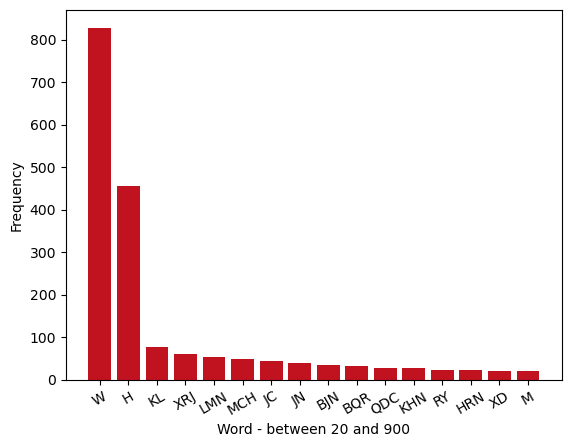

In [16]:
def carregar_ultima_coluna(arquivo):
    with open(arquivo, 'r') as f:
        linhas = f.readlines()
    
    ultima_coluna = [linha.split()[-1] for linha in linhas]  #Using the last column of each line
    return ultima_coluna

arquivo = '../new_data/comparison_negative_output_morph_phrase_SP_output_phrase_space_pdp_SP'
lower_limit = 20
higher_limit = 900

ultima_coluna = carregar_ultima_coluna(arquivo)

contagem = Counter(ultima_coluna)

contagem_filtrada = {chave: valor for chave, valor in contagem.items() if (valor > lower_limit and valor < higher_limit)}

chaves_ordenadas = sorted(contagem_filtrada, key=contagem_filtrada.get, reverse=True)
valores_ordenados = [contagem_filtrada[chave] for chave in chaves_ordenadas]

plt.bar(chaves_ordenadas, valores_ordenados, color='#c1121f')

plt.xlabel(f'Word - between {lower_limit} and {higher_limit}')
plt.ylabel('Frequency')
plt.xticks(rotation=30)

plt.show()

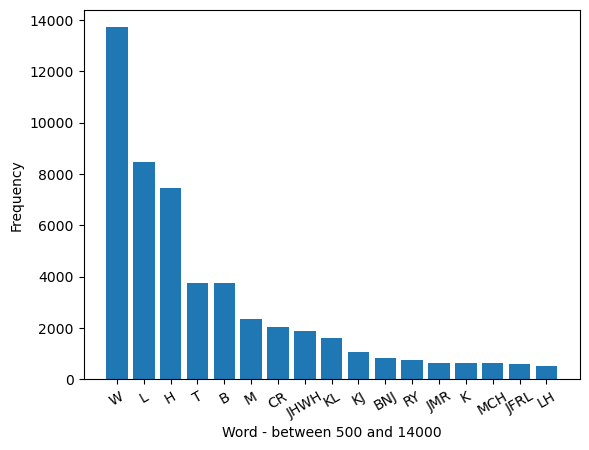

In [22]:
def carregar_ultima_coluna(arquivo):
    with open(arquivo, 'r') as f:
        linhas = f.readlines()
    
    ultima_coluna = [linha.split()[-1] for linha in linhas]  #Using the last column of each line
    return ultima_coluna

arquivo = '../new_data/comparison_positive_output_morph_phrase_SP_output_phrase_space_pdp_SP'
lower_limit = 500
higher_limit = 14000

ultima_coluna = carregar_ultima_coluna(arquivo)

contagem = Counter(ultima_coluna)

contagem_filtrada = {chave: valor for chave, valor in contagem.items() if (valor > lower_limit and valor < higher_limit)}

chaves_ordenadas = sorted(contagem_filtrada, key=contagem_filtrada.get, reverse=True)
valores_ordenados = [contagem_filtrada[chave] for chave in chaves_ordenadas]

plt.bar(chaves_ordenadas, valores_ordenados)

plt.xlabel(f'Word - between {lower_limit} and {higher_limit}')
plt.ylabel('Frequency')
plt.xticks(rotation=30)

plt.show()

## September 26, October 10 - analysis

In [4]:
# Load the SP data, and rename the node features class F,
# the locality class L and the text class T, 
# then they cannot be overwritten while loading the MT.
SP = use('DT-UCPH/sp', version='3.4.1')
Fsp, Lsp, Tsp = SP.api.F, SP.api.L, SP.api.T

# Do the same for the MT dataset.
MT = use('etcbc/bhsa', version='2021')
Fmt, Lmt, Tmt = MT.api.F, MT.api.L, MT.api.T

**Locating corpus resources ...**

Name,# of nodes,# slots / node,% coverage
book,5,79878.40,100
chapter,187,2135.79,100
verse,5841,68.38,100
word,114891,3.48,100
sign,399392,1.00,100


**Locating corpus resources ...**

Name,# of nodes,# slots / node,% coverage
book,39,10938.21,100
chapter,929,459.19,100
lex,9230,46.22,100
verse,23213,18.38,100
half_verse,45179,9.44,100
sentence,63717,6.70,100
sentence_atom,64514,6.61,100
clause,88131,4.84,100
clause_atom,90704,4.70,100
phrase,253203,1.68,100


In [6]:
import json

In [10]:
verse_texts = {}

PENTATEUCH = ['Genesis' , 'Exodus', 'Leviticus', 'Numbers', 'Deuteronomy']

outputfile = "../new_data/data_SP"
output = open(outputfile, "w")

data = '../data/mt_to_sp.json'

with open(data, 'r') as f:
    dictionary = json.load(f)

print('node', 'bo', 'ch', 've', 'SP', sep='\t', file=output)

for verse_node in Fsp.otype.s('verse'):
    bo, ch, ve = Tsp.sectionFromNode(verse_node)
    if bo in PENTATEUCH:
        word_nodes = Lsp.d(verse_node, 'word')
        for word_node in word_nodes:
            word_text_mt = Fsp.g_cons.v(word_node)
            print(word_node, bo, ch, ve, word_text_mt, sep='\t', file=output)

output.close()

In [11]:
verse_texts = {}

PENTATEUCH = ['Genesis' , 'Exodus', 'Leviticus', 'Numbers', 'Deuteronomy']

outputfile = "../new_data/data_MT"
output = open(outputfile, "w")

data = '../data/mt_to_sp.json'

with open(data, 'r') as f:
    dictionary = json.load(f)

print('node', 'bo', 'ch', 've', 'MT', sep='\t', file=output)

for verse_node in Fmt.otype.s('verse'):
    bo, ch, ve = Tmt.sectionFromNode(verse_node)
    if bo in PENTATEUCH:
        word_nodes = Lmt.d(verse_node, 'word')
        for word_node in word_nodes:
            word_text_mt = Fmt.g_cons.v(word_node)
            print(word_node, bo, ch, ve, word_text_mt, sep='\t', file=output)

output.close()

#### Issue with `g_cons` empty in the MT

In [98]:
results = SP.search("""
book book=Genesis
    chapter chapter=1
        verse verse=5
            word g_pfm* g_vbs* g_lex* g_vbe* g_nme* g_prs* g_uvf* trailer* sp* g_cons=L prediction*
""")
SP.show(results, end=1, multiFeatures=False, queryFeatures=True, condensed=True, withNodes=True)

  0.16s 2 results


In [97]:
results = MT.search("""
book book=Genesis
    chapter chapter=1
        verse verse=5
            word g_pfm* g_vbs* g_lex=- g_vbe* g_nme* g_prs* g_uvf* trailer* sp* g_cons*
""")
MT.show(results, end=1, multiFeatures=False, queryFeatures=True, condensed=True, withNodes=True)

  0.75s 2 results


#### Issue with compound `g_cons` in the MT

In [15]:
results = SP.search("""
book book=Genesis
    chapter chapter=4
        verse verse=22
            word g_pfm* g_vbs* g_lex* g_vbe* g_nme* g_prs* g_uvf* trailer* sp* g_cons=TWBL_QJN prediction*
""")
SP.show(results, end=1, multiFeatures=False, queryFeatures=True, condensed=True, withNodes=True)

  0.15s 2 results


In [18]:
results = MT.search("""
book book=Genesis
    chapter chapter=4
        verse verse=22
            word g_pfm* g_vbs* g_lex* g_vbe* g_nme* g_prs* g_uvf* trailer* sp* g_cons=TWBL_QJN
""")
MT.show(results, end=1, multiFeatures=False, queryFeatures=True, condensed=True, withNodes=True)

  0.42s 2 results


In [50]:
verse_texts = {}

PENTATEUCH = ['Genesis' , 'Exodus', 'Leviticus', 'Numbers', 'Deuteronomy']

data = '../data/mt_to_sp.json'

i=0

outputfile = "../new_data/data_MT_SP"
output = open(outputfile, "w")

with open(data, 'r') as f:
    dictionary = json.load(f)

print('MT_node', 'SP_node', 'bo', 'ch', 've', 'MT', 'SP', sep='\t', file=output)

for verse_node in Fmt.otype.s('verse'):
    bo, ch, ve = Tmt.sectionFromNode(verse_node)
    if bo in PENTATEUCH:
        word_nodes = Lmt.d(verse_node, 'word')
        for word_node in word_nodes:
            word_text_mt = Fmt.g_cons.v(word_node)
            if str(word_node) in dictionary:
                word_text_sp = Fsp.g_cons.v(dictionary[str(word_node)])
                print(word_node, dictionary[str(word_node)], bo, ch, ve, word_text_mt, word_text_sp, sep='\t', file=output)
            else:
                print(word_node, ' ', bo, ch, ve, word_text_mt, ' ', sep='\t', file=output)

output.close()

In [22]:
model1 = "../new_data/output_morph_phrase_SP"
model2 = "../new_data/output_phrase_space_pdp_SP"

name1 = os.path.basename(model1)
name2 = os.path.basename(model2)

outputfile = f"../new_data/comparison_{name1}_{name2}"
output = open(outputfile, "w")

print('num', 'bo', 'ch', 've', 'w+morph', 'result-w+morph', 'w+pdp', 'result-word+pdp', 'word_clean', sep='\t', file=output)

k = 0
l = 0
book_old = None
chap_old = None

morphsign = "~!>+~[]/<>"
pdpsign = "0123456789<>"

translation_table1 = str.maketrans('', '', morphsign)
translation_table2 = str.maketrans('', '', pdpsign)

def process_line(line, translation_table):
    words = line.strip().split()
    try:
        word = words[4].translate(translation_table)
        word_original = words[4]
        result = words[5]
        book = words[1]
        chapter = words[2]
        verse = words[3]
        return word, word_original, result, book, chapter, verse
    except IndexError:
        return None

with open(model1, 'r') as f:
    lines_model1 = f.readlines()

with open(model2, 'r') as f:
    lines_model2 = f.readlines()

n_lines1 = len(lines_model1)
n_lines2 = len(lines_model2)

if n_lines1 != n_lines2:
    for i in range(n_lines1):
        result1 = process_line(lines_model1[i], translation_table1)
        if not result1:
            continue
        
        word1, word_original1, result1_value, book1, chapter1, verse1 = result1
        
        for j in range(i, min(i + abs(n_lines1 - n_lines2), n_lines2)): 
            result2 = process_line(lines_model2[j], translation_table2)
            if not result2:
                continue
    
            word2, word_original2, result2_value, book2, chapter2, verse2 = result2
            
            if word1 == word2 and book1 == book2 and chapter1 == chapter2 and verse1 == verse2:
                if result1_value == result2_value:
                    k += 1
                else:
                    l += 1
                    print(l, book1, chapter1, verse1, word_original1, result1_value, word_original2, result2_value, word1, sep='\t', file=output)
                break
        
        if book1 != book_old:
            print(book1)
        book_old = book1
        
    if l == 0:
        print("\nNo word mismatch")
else:
    for i in range(n_lines1):
        result1 = process_line(lines_model1[i], translation_table1)
        word1, word_original1, result1_value, book1, chapter1, verse1 = result1

        result2 = process_line(lines_model2[i], translation_table2)
        word2, word_original2, result2_value, book2, chapter2, verse2 = result2

        if word1 == word2 and book1 == book2 and chapter1 == chapter2 and verse1 == verse2:
            if result1_value == result2_value:
                k += 1
                #print(i, book1, chapter1, verse1, word_original1, result1_value, word_original2, result2_value, word1)
                print(i, book1, chapter1, verse1, word_original1, result1_value, word_original2, result2_value, word1, sep='\t', file=output)
            else:
                l += 1
                print(i, book1, chapter1, verse1, word_original1, result1_value, word_original2, result2_value, word1, sep='\t', file=output)
                #print(i, book1, chapter1, verse1, word_original1, result1_value, word_original2, result2_value, word1)
        
        if book1 != book_old:
            print(book1)
        book_old = book1

output.close()

Genesis
Exodus
Leviticus
Numbers
Deuteronomy


In [22]:
model = "../new_data/comparison_output_morph_phrase_SP_output_phrase_space_pdp_SP"
data_MT = "../new_data/data_MT_SP"

name = os.path.basename(model)

outputfile = f"../new_data/{name}_t"
output = open(outputfile, "w")

print('num', 'bo', 'ch', 've', 'SPw+morph', 'SPresult-w+morph', 'SPw+pdp', 'SPresult-w+pdp', 'MT', sep='\t', file=output)

k = 0
l = 0
book_old = None
chap_old = None
j_old = None

morphsign = "~!>+~[]/<>"

translation_table = str.maketrans('', '', morphsign)

def process_model(line):
    words = line.strip().split()
    try:
        num = words[0]
        book = words[1]
        chapter = words[2]
        verse = words[3]
        SPwordmorph = words[4]
        SPwordmorphresult = words[5]
        SPwordpdp = words[6]
        SPwordpdpresult = words[7]
        word_original = words[8]
        return num, book, chapter, verse, SPwordmorph, SPwordmorphresult, SPwordpdp, SPwordpdpresult, word_original
    except IndexError:
        return None

def process_data(line, table):
    words = line.strip().split()
    try:
        book = words[2]
        chapter = words[3]
        verse = words[4]
        MTword = words[5]
        SPword_original = words[6].translate(table)
        return book, chapter, verse, MTword, SPword_original
    except IndexError:
        return None

with open(model, 'r') as f:
    lines_model = f.readlines()

with open(data_MT, 'r') as f:
    lines_data_MT = f.readlines()

n_lines1 = len(lines_model)
n_lines2 = len(lines_data_MT)

for i in range(n_lines1):
    result1 = process_model(lines_model[i])
    if not result1:
        continue
    
    num1, book1, chapter1, verse1, SPwordmorph1, SPwordmorphresult1, SPwordpdp1, SPwordpdpresult1, word_original1 = result1
    
    for j in range(i, min(i + abs(n_lines1 - n_lines2), n_lines2)): 
        result2 = process_data(lines_data_MT[j], translation_table)
        if not result2:
            continue

        book2, chapter2, verse2, MTword2, SPword_original2 = result2
        
        if word_original1 == SPword_original2 and book1 == book2 and chapter1 == chapter2 and verse1 == verse2:
            k += 1
            print(num1, book1, chapter1, verse1, SPwordmorph1, SPwordmorphresult1, SPwordpdp1, SPwordpdpresult1, MTword2, sep='\t', file=output)
        else:
            l += 1
            #print(num1, book1, chapter1, verse1, SPwordmorph1, SPwordmorphresult1, SPwordpdp1, SPwordpdpresult1, MTword2, sep='\t')
            print(num1, book1, chapter1, verse1, SPwordmorph1, SPwordmorphresult1, SPwordpdp1, SPwordpdpresult1, MTword2, sep='\t', file=output)   
        break
    
    if book1 != book_old:
        print(book1)
    book_old = book1
    
if l == 0:
    print("\nNo word mismatch")

output.close()

bo
Genesis
Exodus
Leviticus
Numbers
Deuteronomy


In [149]:
# Abrir os arquivos
with open('../new_data/comparison_output_morph_phrase_SP_output_phrase_space_pdp_SP', 'r', encoding='utf-8') as file1, \
     open('../new_data/data_MT_SP', 'r', encoding='utf-8') as file2, \
     open('../new_data/comparison_output_morph_phrase_SP_output_phrase_space_pdp_SP_MT', 'w', encoding='utf-8') as output_file:

    # Ler o conteúdo do arquivo 1 e arquivo 2
    arquivo1_linhas = file1.readlines()
    arquivo2_linhas = file2.readlines()
    
    # Escrever o cabeçalho no arquivo de saída (sem a coluna 'word_clean')
    header_colunas1 = arquivo1_linhas[0].strip().split('\t')
    header_sem_word_clean = header_colunas1[:8]  # Excluir 'word_clean'
    output_file.write('\t'.join(header_sem_word_clean) + '\tMT\n')  # Adicionar 'MT' no cabeçalho
    
    # Criar um dicionário para armazenar os dados do arquivo 2 com a SP modificada
    arquivo2_data = {}
    for linha2 in arquivo2_linhas[1:]:  # Ignorar o cabeçalho
        colunas2 = linha2.strip().split('\t')
        
        # Preencher valores vazios caso a linha tenha menos colunas que o esperado
        while len(colunas2) < 7:
            colunas2.append('')  # Adicionar string vazia para as colunas faltantes

        bo2, ch2, ve2, sp2, mt2 = colunas2[2], colunas2[3], colunas2[4], colunas2[6], colunas2[5]
        sp_modified = sp2.replace('<', '').replace('>', '')  # Remover os símbolos < e >
        
        # Usar (bo, ch, ve, SP modificada) como chave e MT como valor
        arquivo2_data[(bo2, ch2, ve2, sp_modified)] = mt2

    # Processar as linhas do arquivo 1
    for linha1 in arquivo1_linhas[1:]:  # Ignorar o cabeçalho
        colunas1 = linha1.strip().split('\t')
        bo1, ch1, ve1, word_clean1 = colunas1[1], colunas1[2], colunas1[3], colunas1[8]
        
        # Montar a chave para procurar no dicionário
        key = (bo1, ch1, ve1, word_clean1)
        
        # Obter o valor correspondente da coluna MT ou vazio se não houver correspondência
        mt_value = arquivo2_data.get(key, '')
        
        # Escrever a linha no arquivo de saída sem a coluna 'word_clean'
        linha_sem_word_clean = colunas1[:8]  # Excluir a coluna 'word_clean'
        output_file.write('\t'.join(linha_sem_word_clean) + '\t' + mt_value + '\n')

#### October 14 experiment

In [155]:
with open('../data/output_phrase_space_MT2', 'r') as f1:
    lines = f1.readlines()

with open('../new_data/output_morph_phrase_MT_word', 'w') as f2:
    f2.write('bo\tch\tve\tresult-MT\tMT\n')
    for line in lines:
        # Dividir a linha em partes: Livro, Capítulo, Versículo e Sequência de caracteres
        parts = line.strip().split()
        book, chapter, verse = parts[0], parts[1], parts[2]
        sequence = parts[3:]

        for word in sequence:
            if '$' in word:
                result = 'Y'
            else:
                result = 'X'
            word_updated = word.replace('$', '')
            if book in ['Genesis', 'Exodus', 'Leviticus', 'Numbers', 'Deuteronomy']:
                f2.write(f'{book}\t{chapter}\t{verse}\t{result}\t{word_updated}\n')

In [173]:
with open('../new_data/comparison_output_morph_phrase_SP_output_phrase_space_pdp_SP_MT', 'r', encoding='utf-8') as file1, \
     open('../new_data/output_morph_phrase_MT_word', 'r', encoding='utf-8') as file3, \
     open('../new_data/comparison_output_morph_phrase_SP_output_phrase_space_pdp_SP_MT_word', 'w', encoding='utf-8') as output_file:

    # Ler o conteúdo do arquivo 1 modificado e arquivo 3
    arquivo1_linhas = file1.readlines()
    arquivo3_linhas = file3.readlines()
    
    # Escrever o cabeçalho no arquivo de saída (adicionando a coluna result-MT)
    header_colunas1 = arquivo1_linhas[0].strip().split('\t')
    output_file.write('\t'.join(header_colunas1) + '\tresult-MT\n')  # Adicionar 'result-MT' no cabeçalho
    
    # Criar um dicionário para armazenar os dados do arquivo 3 com base em MT
    arquivo3_data = {}
    for linha3 in arquivo3_linhas[1:]:  # Ignorar o cabeçalho
        colunas3 = linha3.strip().split('\t')
        
        # Verificar se a linha tem o número esperado de colunas (mínimo 5)
        if len(colunas3) >= 5:
            bo3, ch3, ve3, result_mt3, word_clean3 = colunas3[0], colunas3[1], colunas3[2], colunas3[3], colunas3[4]
            # Usar (bo, ch, ve, word_clean) como chave e result-MT como valor
            arquivo3_data[(bo3, ch3, ve3, word_clean3)] = result_mt3

    # Processar as linhas do arquivo 1 modificado
    for linha1 in arquivo1_linhas[1:]:  # Ignorar o cabeçalho
        colunas1 = linha1.strip().split('\t')
        
        while len(colunas1) < 9:
            colunas1.append(' ') 
        
        bo1, ch1, ve1, word_clean1 = colunas1[1], colunas1[2], colunas1[3], colunas1[8]  # 'MT' está na posição 8 agora
        
        # Montar a chave para procurar no dicionário
        key = (bo1, ch1, ve1, word_clean1)

        # Verificar se a chave existe no arquivo 3
        if key in arquivo3_data:
            result_mt_value = arquivo3_data[key]
        else:
            result_mt_value = ''  # Se não houver correspondência, manter vazio
        
        # Debug: imprimir a chave e o valor correspondente para verificar correspondências
        #print(f"Chave: {key}, result-MT: {result_mt_value}")

        # Escrever a linha no arquivo de saída com a nova coluna result-MT
        output_file.write('\t'.join(colunas1) + '\t' + result_mt_value + '\n')

output_file.close()

## October 17 experiment - creating a new dataset

In [100]:
SP = use('DT-UCPH/sp:clone', checkout='clone', version='3.4.1', hoist=globals())

**Locating corpus resources ...**

   |     9.45s T oslots               from ~/github/DT-UCPH/sp/tf/3.4.1
There was a fatal error! The message is:
: tuple index out of range


   |      |     0.09s C __levels__           from otype, oslots, otext
There were problems with loading data.
The TF API has not been loaded!
The app "DT-UCPH/sp" will not work!


In [64]:
results = SP.search("""
word
""")

outputfile = f"../new_data/node_words_SP"
output = open(outputfile, "w")

for i in range(0,len(results)):
    print(results[i][0], F.g_cons.v(results[i][0]), file=output, sep='\t')

  0.16s 114891 results


Words are defined by the node 405426 to 520316

In [76]:
i=0

morphsign = "~!>+~[]/<>"

translation_table = str.maketrans('', '', morphsign)

with open('../new_data/node_words_SP', 'r', encoding='utf-8') as f1, \
     open('../new_data/output_morph_phrase_SP', 'r', encoding='utf-8') as f2, \
     open('../new_data/phrase', 'w', encoding='utf-8') as output_file:

    lines1 = f1.readlines()
    lines2 = f2.readlines()

    key1 = {}
    for l1 in lines1:
        coluna1 = l1.strip().split('\t')
        wclean1 = coluna1[1].translate(translation_table)
        key1[(wclean1)] = coluna1[0]
         
    for l2 in lines2:
        coluna2 = l2.strip().split('\t')
        wclean2 = coluna2[2].translate(translation_table)
        result_model = coluna2[3]

        if i<3:
            print(wclean2)
        i=i+1

        if wclean2 in key1:
            print(key1[wclean2])

#{'B': '405426'}
#{'B': '405426', 'RCJT': '405427'}
#{'B': '405426', 'RCJT': '405427', 'BR': '405428'}

B
520283
RCJT
519953
BR
518111
519638
520254
520308
520030
520303
520254
520308
520284
520303
520308
520284
515998
405441
520303
405443
520303
504182
520313
520109
519845
520303
520235
519638
405452
520313
520109
520308
519921
520303
520135
519638
520009
516053
520303
520009
516053
520303
519952
519638
520254
520308
516053
520237
517883
520303
461381
519638
519828
520308
516053
520303
519828
520308
504182
520303
518293
519638
520313
516053
520223
520303
520313
504182
518865
516838
520303
520009
519156
520303
520009
519013
520223
519231
520303
520135
519638
520009
405801
520283
519606
520308
519921
520303
520009
405513
519828
519921
520313
519921
520303
516429
519638
520254
520308
405801
520303
461381
519828
520308
519921
520310
520118
520042
520313
405801
520303
519828
520308
519921
520310
520118
520313
520313
405801
520303
520009
516750
520303
518293
519638
520313
405801
520030
520303
520009
519156
520303
520009
519013
520223
511725
520303
520135
519638
405563
520308
519921
520118
520

In [10]:
# Leitura do arquivo 1 e arquivo 2
with open('../new_data/output_morph_phrase_SP', 'r') as f1, open('../new_data/node_words_SP', 'r') as f2:
    linhas_arquivo1 = [linha.strip().split('\t') for linha in f1.readlines()]
    linhas_arquivo2 = [linha.strip().split('\t') for linha in f2.readlines()]

# Dicionário para correspondência entre a coluna 5 do arquivo 1 e a coluna 2 do arquivo 2
dict_arq2 = {}
for coluna1, coluna2 in linhas_arquivo2:
    if coluna2 not in dict_arq2:
        dict_arq2[coluna2] = []
    dict_arq2[coluna2].append(coluna1)

# Variáveis para armazenar o intervalo e o resultado final
grupo_corrente = []
resultado = []

# Percorrer arquivo 1 e verificar correspondência com arquivo 2
for linha1 in linhas_arquivo1:
    col5_arq1 = linha1[2].replace("/", "")  # Remove barras para facilitar a correspondência
    ultima_col_arq1 = linha1[3]

    if col5_arq1 in dict_arq2 and dict_arq2[col5_arq1]:
        # Pegar o próximo valor correspondente da lista no dicionário
        id_arq2 = dict_arq2[col5_arq1].pop(0)
        grupo_corrente.append(id_arq2)

        if ultima_col_arq1 == 'Y':  # Se encontrar um 'Y', armazenar o grupo
            if len(grupo_corrente) > 1:
                # Adiciona o intervalo ao invés de uma lista
                resultado.append(f"{grupo_corrente[0]}-{grupo_corrente[-1]}")
            else:
                # Adiciona valor único
                resultado.append(grupo_corrente[0])
            grupo_corrente = []  # Reiniciar o grupo para o próximo bloco

# Salvar resultado no arquivo3.txt
caminho_arquivo3 = '../new_data/phrase'
with open(caminho_arquivo3, 'w') as f3:
    for linha in resultado:
        f3.write(linha + '\n')

In [15]:
results = SP.search("""
word
""")
SP.show(results, end=1, multiFeatures=False, queryFeatures=True, condensed=True, withNodes=True)

  0.16s 114891 results


In [5]:
results = BHS.search("""
word
""")
BHS.show(results, end=1, multiFeatures=False, queryFeatures=True, condensed=True, withNodes=True)

  0.64s 426590 results
